In [79]:
!pip install imblearn
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import requests
import io
from imblearn.over_sampling import SMOTE

In [80]:
!gdown 1eiZkHD5L41lsbpbLXTA2BP7afOt9Z5Nw

Downloading...
From: https://drive.google.com/uc?id=1eiZkHD5L41lsbpbLXTA2BP7afOt9Z5Nw
To: /content/Ad_click_prediction_train (1).csv
100% 34.3M/34.3M [00:00<00:00, 76.7MB/s]


In [81]:
!gdown 1eeXHpL_6WYxfTYf6Z0S7WsSxhOt3cK4W

Downloading...
From: https://drive.google.com/uc?id=1eeXHpL_6WYxfTYf6Z0S7WsSxhOt3cK4W
To: /content/Ad_Click_prediciton_test.csv
100% 9.47M/9.47M [00:00<00:00, 31.6MB/s]


In [82]:
ad_click_train_data = pd.read_csv('Ad_click_prediction_train (1).csv')

ad_click_train_data

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0


In [83]:
ad_click_test_data = pd.read_csv('Ad_Click_prediciton_test.csv')

ad_click_test_data

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128853,215328,2017-07-09 21:29,252148,B,414149,45962,2,254132.0,2.0,Male,2.0,3.0,4.0,0
128854,282232,2017-07-09 21:29,47955,D,98970,6970,4,NaN,1.0,Male,1.0,3.0,NaN,0
128855,140499,2017-07-09 21:29,314236,C,359520,13787,4,NaN,2.0,Male,2.0,3.0,NaN,0
128856,531038,2017-07-09 21:29,988544,E,98970,6970,2,NaN,2.0,Male,2.0,3.0,NaN,0


In [84]:
rows, cols = ad_click_train_data.shape
print(f"The `ad_click_train_data` dataset has {rows} rows and {cols} columns.")

The `ad_click_train_data` dataset has 463291 rows and 15 columns.


In [85]:
numerical_cols = []
categorical_cols = []

for col in ad_click_train_data.columns:
    if pd.api.types.is_numeric_dtype(ad_click_train_data[col]):
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

print("Column Type Classification:")
print("---------------------------")
for col in ad_click_train_data.columns:
    if col in numerical_cols:
        print(f"{col}: Numerical")
    else:
        print(f"{col}: Categorical")

Column Type Classification:
---------------------------
session_id: Numerical
DateTime: Categorical
user_id: Numerical
product: Categorical
campaign_id: Numerical
webpage_id: Numerical
product_category_1: Numerical
product_category_2: Numerical
user_group_id: Numerical
gender: Categorical
age_level: Numerical
user_depth: Numerical
city_development_index: Numerical
var_1: Numerical
is_click: Numerical


## Calculate Click-Through Rate (CTR)

In [86]:
total_clicks = ad_click_train_data['is_click'].sum()
total_impressions = ad_click_train_data.shape[0]
ctr = (total_clicks / total_impressions) * 100

print(f"Total Clicks: {total_clicks}")
print(f"Total Impressions: {total_impressions}")
print(f"Click-Through Rate (CTR): {ctr:.2f}%")

Total Clicks: 31331
Total Impressions: 463291
Click-Through Rate (CTR): 6.76%


In [87]:
missing_values = ad_click_train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with Missing Values and their Null Counts:")
print("--------------------------------------------------")
if not missing_values.empty:
    print(missing_values)
else:
    print("No missing values found in the dataset.")

Columns with Missing Values and their Null Counts:
--------------------------------------------------
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
dtype: int64


## Summary of `ad_click_train_data` Analysis

### 1. Dataset Dimensions:
- **Rows**: 463291
- **Columns**: 15

### 2. Column Type Classification:
- **Numerical Columns**:
    - `session_id`
    - `user_id`
    - `campaign_id`
    - `webpage_id`
    - `product_category_1`
    - `product_category_2`
    - `user_group_id`
    - `age_level`
    - `user_depth`
    - `city_development_index`
    - `var_1`
    - `is_click`
- **Categorical Columns**:
    - `DateTime`
    - `product`
    - `gender`

### 3. Click-Through Rate (CTR):
- **Total Clicks**: 31331
- **Total Impressions**: 463291
- **Click-Through Rate (CTR)**: 6.76%

### 4. Columns with Missing Values:
- `product_category_2`: 365854 null values
- `user_group_id`: 18243 null values
- `gender`: 18243 null values
- `age_level`: 18243 null values
- `user_depth`: 18243 null values
- `city_development_index`: 125129 null values

#Temporal Patterns

## Extract Hour from DateTime


In [88]:
ad_click_train_data['DateTime'] = pd.to_datetime(ad_click_train_data['DateTime'])
ad_click_train_data['hour_of_day'] = ad_click_train_data['DateTime'].dt.hour

print(ad_click_train_data[['DateTime', 'hour_of_day']].head())

             DateTime  hour_of_day
0 2017-07-02 00:00:00            0
1 2017-07-02 00:00:00            0
2 2017-07-02 00:00:00            0
3 2017-07-02 00:00:00            0
4 2017-07-02 00:01:00            0


## Calculate Click-Through Rate per Hour


In [89]:
hourly_ctr = ad_click_train_data.groupby('hour_of_day').agg(
    total_clicks=('is_click', 'sum'),
    total_impressions=('session_id', 'count')
)
hourly_ctr['CTR'] = (hourly_ctr['total_clicks'] / hourly_ctr['total_impressions']) * 100

print("Click-Through Rate (CTR) per Hour:")
print("----------------------------------")
print(hourly_ctr[['CTR']].sort_index())

Click-Through Rate (CTR) per Hour:
----------------------------------
                  CTR
hour_of_day          
0            6.849315
1            7.460815
2            5.273189
3            6.223734
4            5.700510
5            6.702681
6            7.282210
7            7.397823
8            7.027111
9            7.010128
10           6.777607
11           6.954296
12           6.858513
13           6.641993
14           6.530361
15           6.392927
16           6.722104
17           6.634720
18           6.622956
19           6.669113
20           6.635217
21           6.952918
22           6.651026
23           6.373626


## Identify Hour with Highest CTR


In [90]:
max_ctr_hour = hourly_ctr['CTR'].idxmax()
max_ctr_value = hourly_ctr['CTR'].max()

print(f"The hour with the highest CTR is {max_ctr_hour} with a CTR of {max_ctr_value:.2f}%")

The hour with the highest CTR is 1 with a CTR of 7.46%


## Visualize Hourly CTR


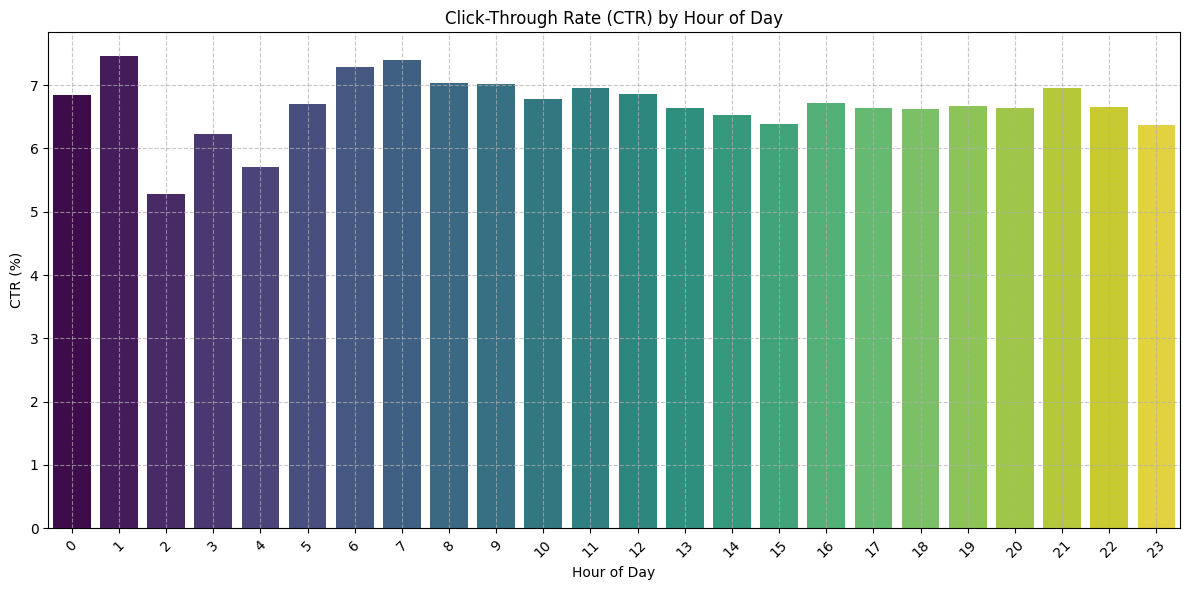

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_ctr.index, y=hourly_ctr['CTR'], hue=hourly_ctr.index, palette='viridis', legend=False)
plt.title('Click-Through Rate (CTR) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Extract Day of Week

In [92]:
ad_click_train_data['day_of_week'] = ad_click_train_data['DateTime'].dt.dayofweek
ad_click_train_data['day_type'] = ad_click_train_data['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

print(ad_click_train_data[['DateTime', 'day_of_week', 'day_type']].head())

             DateTime  day_of_week day_type
0 2017-07-02 00:00:00            6  Weekend
1 2017-07-02 00:00:00            6  Weekend
2 2017-07-02 00:00:00            6  Weekend
3 2017-07-02 00:00:00            6  Weekend
4 2017-07-02 00:01:00            6  Weekend


In [93]:
day_type_ctr = ad_click_train_data.groupby('day_type').agg(
    total_clicks=('is_click', 'sum'),
    total_impressions=('session_id', 'count')
)
day_type_ctr['CTR'] = (day_type_ctr['total_clicks'] / day_type_ctr['total_impressions']) * 100

print("Click-Through Rate (CTR) by Day Type:")
print("-----------------------------------")
print(day_type_ctr[['CTR']])

Click-Through Rate (CTR) by Day Type:
-----------------------------------
               CTR
day_type          
Weekday   6.646784
Weekend   7.326207


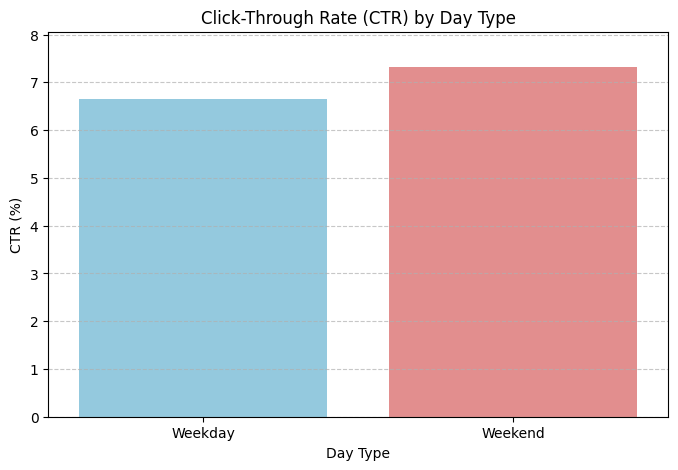

In [94]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_type_ctr.index, y=day_type_ctr['CTR'], hue=day_type_ctr.index, palette=['skyblue', 'lightcoral'], legend=False)
plt.title('Click-Through Rate (CTR) by Day Type')
plt.xlabel('Day Type')
plt.ylabel('CTR (%)')
plt.ylim(0, day_type_ctr['CTR'].max() * 1.1) # Set y-axis limit to be slightly above the max CTR
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Summary:

*   **How does Click-Through Rate (CTR) vary between weekdays and weekends?**
    The Click-Through Rate (CTR) is higher on weekends compared to weekdays. Specifically, the CTR for weekdays is approximately 6.65%, while for weekends, it is approximately 7.33%.

### Insights or Next Steps
*   The higher CTR on weekends suggests that users might be more engaged or have more time to interact with ads during these periods, which could inform advertising campaign scheduling.
*   Further analysis could explore if specific ad categories or products perform significantly better on weekends versus weekdays, leading to more targeted ad strategies.


# User Behavior

#### Do certain age groups click more?

In [95]:
print("Unique values in 'age_level' before handling missing values:")
print(ad_click_train_data['age_level'].value_counts().sort_index())

missing_age_level = ad_click_train_data['age_level'].isnull().sum()
print(f"\nNumber of missing values in 'age_level': {missing_age_level}")

if missing_age_level > 0:
    mode_age_level = ad_click_train_data['age_level'].mode()[0]
    ad_click_train_data['age_level'] = ad_click_train_data['age_level'].fillna(mode_age_level)
    print(f"Missing values in 'age_level' filled with mode: {mode_age_level}")

print("\nValue counts for 'age_level' after handling missing values:")
print(ad_click_train_data['age_level'].value_counts().sort_index())

Unique values in 'age_level' before handling missing values:
age_level
0.0       153
1.0     43367
2.0    143501
3.0    160581
4.0     63859
5.0     30828
6.0      2759
Name: count, dtype: int64

Number of missing values in 'age_level': 18243
Missing values in 'age_level' filled with mode: 3.0

Value counts for 'age_level' after handling missing values:
age_level
0.0       153
1.0     43367
2.0    143501
3.0    178824
4.0     63859
5.0     30828
6.0      2759
Name: count, dtype: int64


In [96]:
age_level_ctr = ad_click_train_data.groupby('age_level').agg(
    total_clicks=('is_click', 'sum'),
    total_impressions=('session_id', 'count')
)
age_level_ctr['CTR'] = (age_level_ctr['total_clicks'] / age_level_ctr['total_impressions']) * 100

print("Click-Through Rate (CTR) by Age Level:")
print("------------------------------------")
print(age_level_ctr[['CTR']].sort_index())

Click-Through Rate (CTR) by Age Level:
------------------------------------
                CTR
age_level          
0.0        8.496732
1.0        7.480342
2.0        7.091937
3.0        6.505838
4.0        5.872312
5.0        7.415337
6.0        8.227619


In [97]:
max_ctr_age_level = age_level_ctr['CTR'].idxmax()
max_ctr_value = age_level_ctr['CTR'].max()

print(f"The age level with the highest CTR is {max_ctr_age_level} with a CTR of {max_ctr_value:.2f}%")

The age level with the highest CTR is 0.0 with a CTR of 8.50%


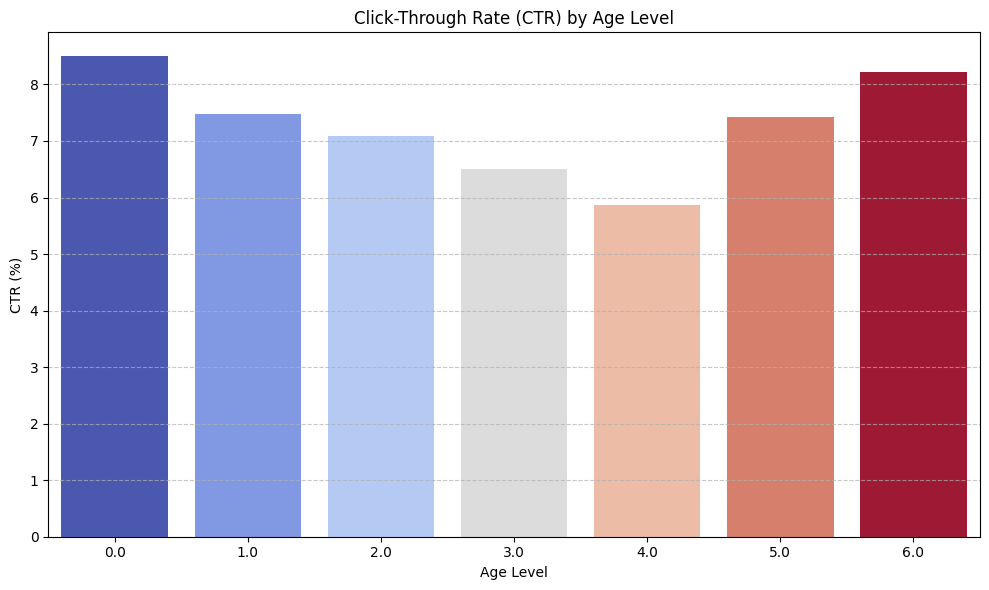

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_level_ctr.index, y=age_level_ctr['CTR'], hue=age_level_ctr.index, palette='coolwarm', legend=False)
plt.title('Click-Through Rate (CTR) by Age Level')
plt.xlabel('Age Level')
plt.ylabel('CTR (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
---

### Is there a gender difference in click rates?

In [99]:
print("Unique values in 'gender' before handling missing values:")
print(ad_click_train_data['gender'].value_counts(dropna=False))


Unique values in 'gender' before handling missing values:
gender
Male      393454
Female     51594
NaN        18243
Name: count, dtype: int64


In [100]:
missing_gender = ad_click_train_data['gender'].isnull().sum()
print(f"\nNumber of missing values in 'gender': {missing_gender}")

if missing_gender > 0:
    mode_gender = ad_click_train_data['gender'].mode()[0]
    ad_click_train_data['gender'] = ad_click_train_data['gender'].fillna(mode_gender)
    print(f"Missing values in 'gender' filled with mode: {mode_gender}")

print("\nValue counts for 'gender' after handling missing values:")
print(ad_click_train_data['gender'].value_counts(dropna=False))


Number of missing values in 'gender': 18243
Missing values in 'gender' filled with mode: Male

Value counts for 'gender' after handling missing values:
gender
Male      411697
Female     51594
Name: count, dtype: int64


In [101]:
gender_ctr = ad_click_train_data.groupby('gender').agg(
    total_clicks=('is_click', 'sum'),
    total_impressions=('session_id', 'count')
)
gender_ctr['CTR'] = (gender_ctr['total_clicks'] / gender_ctr['total_impressions']) * 100

print("Click-Through Rate (CTR) by Gender:")
print("-----------------------------------")
print(gender_ctr[['CTR']].sort_index())

Click-Through Rate (CTR) by Gender:
-----------------------------------
             CTR
gender          
Female  6.444548
Male    6.802576


In [102]:
max_ctr_gender = gender_ctr['CTR'].idxmax()
max_ctr_value = gender_ctr['CTR'].max()

print(f"The gender with the highest CTR is {max_ctr_gender} with a CTR of {max_ctr_value:.2f}%")

The gender with the highest CTR is Male with a CTR of 6.80%


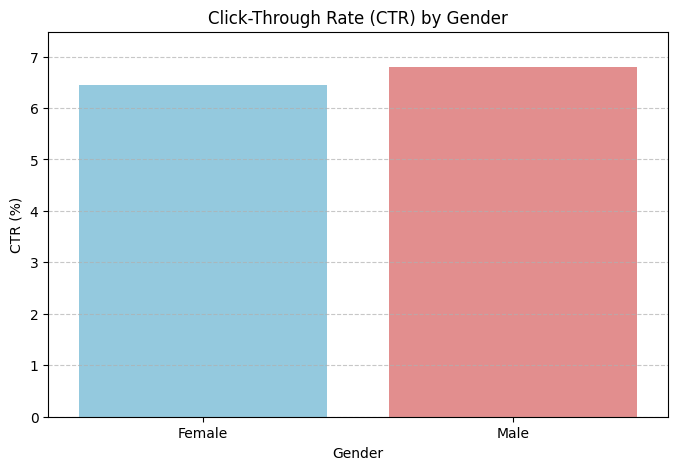

In [103]:
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_ctr.index, y=gender_ctr['CTR'], hue=gender_ctr.index, palette=['skyblue', 'lightcoral'], legend=False)
plt.title('Click-Through Rate (CTR) by Gender')
plt.xlabel('Gender')
plt.ylabel('CTR (%)')
plt.ylim(0, gender_ctr['CTR'].max() * 1.1) # Set y-axis limit to be slightly above the max CTR
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights or Next Steps
*   The marginal difference in CTR between genders suggests that while there is a slight preference for males, the advertising strategy might not need significant gender-specific adjustments unless specific products target one gender predominantly.
*   Further analysis could explore whether certain product categories or campaign types appeal more to one gender, which could refine targeting efforts.
*   Investigate the characteristics of the imputed 'Male' gender entries to ensure that the imputation did not skew the results for the male demographic.

---
---

### How does user group affect clicking?

In [104]:
print("Unique values in 'user_group_id' before handling missing values:")
print(ad_click_train_data['user_group_id'].value_counts(dropna=False))

missing_user_group_id = ad_click_train_data['user_group_id'].isnull().sum()
print(f"\nNumber of missing values in 'user_group_id': {missing_user_group_id}")

Unique values in 'user_group_id' before handling missing values:
user_group_id
3.0     140317
2.0     137278
4.0      50080
1.0      41946
5.0      21989
9.0      20264
NaN      18243
10.0     13779
11.0      8839
8.0       6223
6.0       1724
7.0       1421
12.0      1035
0.0        153
Name: count, dtype: int64

Number of missing values in 'user_group_id': 18243


In [105]:
if missing_user_group_id > 0:
    mode_user_group_id = ad_click_train_data['user_group_id'].mode()[0]
    ad_click_train_data['user_group_id'] = ad_click_train_data['user_group_id'].fillna(mode_user_group_id)
    print(f"Missing values in 'user_group_id' filled with mode: {mode_user_group_id}")

print("\nValue counts for 'user_group_id' after handling missing values:")
print(ad_click_train_data['user_group_id'].value_counts(dropna=False))

Missing values in 'user_group_id' filled with mode: 3.0

Value counts for 'user_group_id' after handling missing values:
user_group_id
3.0     158560
2.0     137278
4.0      50080
1.0      41946
5.0      21989
9.0      20264
10.0     13779
11.0      8839
8.0       6223
6.0       1724
7.0       1421
12.0      1035
0.0        153
Name: count, dtype: int64


In [106]:
user_group_ctr = ad_click_train_data.groupby('user_group_id').agg(
    total_clicks=('is_click', 'sum'),
    total_impressions=('session_id', 'count')
)
user_group_ctr['CTR'] = (user_group_ctr['total_clicks'] / user_group_ctr['total_impressions']) * 100

print("Click-Through Rate (CTR) by User Group:")
print("-------------------------------------")
print(user_group_ctr[['CTR']].sort_index())

Click-Through Rate (CTR) by User Group:
-------------------------------------
                    CTR
user_group_id          
0.0            8.496732
1.0            7.514423
2.0            7.124230
3.0            6.526236
4.0            5.932508
5.0            7.312747
6.0            7.830626
7.0            6.474314
8.0            6.379560
9.0            6.346230
10.0           5.653531
11.0           7.670551
12.0           8.888889


In [107]:
max_ctr_user_group = user_group_ctr['CTR'].idxmax()
max_ctr_value = user_group_ctr['CTR'].max()

print(f"The user group with the highest CTR is {max_ctr_user_group} with a CTR of {max_ctr_value:.2f}%")

The user group with the highest CTR is 12.0 with a CTR of 8.89%


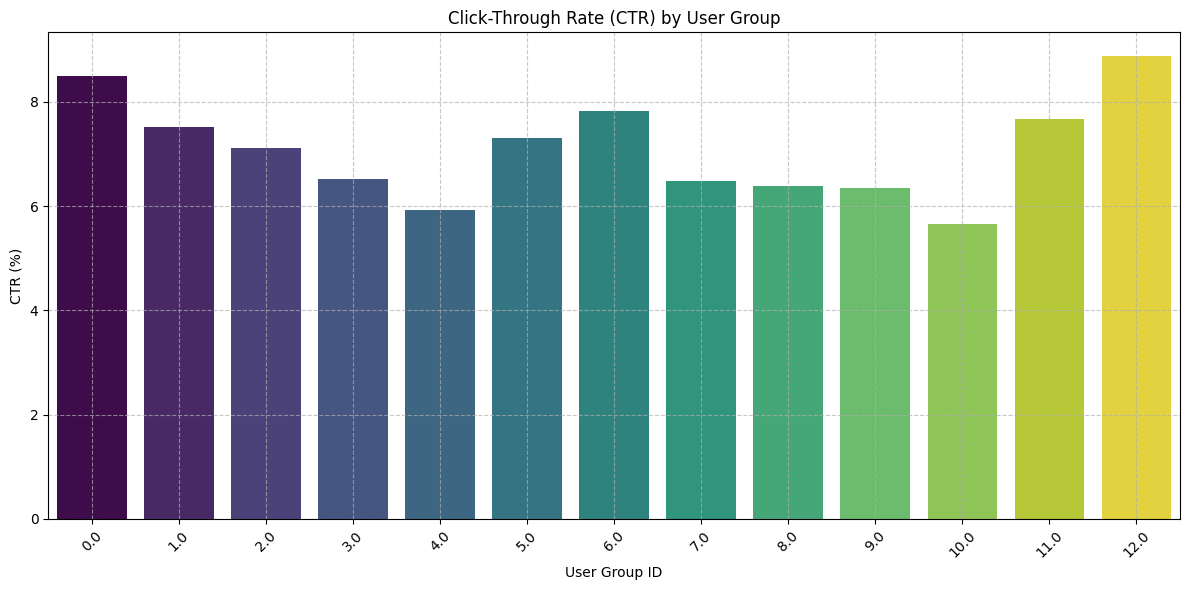

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(x=user_group_ctr.index, y=user_group_ctr['CTR'], hue=user_group_ctr.index, palette='viridis', legend=False)
plt.title('Click-Through Rate (CTR) by User Group')
plt.xlabel('User Group ID')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

*   **How does user group affect clicking?**
    User group significantly affects clicking, with CTRs varying across different groups. User group **12.0** exhibits the highest Click-Through Rate (CTR) at **8.89%**, while user group **10.0** shows the lowest CTR at **5.65%**.

### Insights or Next Steps
*   **Targeted Campaigns**: User groups 12.0, 0.0, 6.0, and 11.0 show significantly higher CTRs. Marketing efforts should prioritize these groups with tailored campaigns, content, and product offerings that align with their interests.
*   **Improve Engagement**: For user groups with lower CTRs (e.g., 10.0, 4.0, 7.0, 8.0, 9.0), it's crucial to investigate the underlying reasons for their lower engagement. This could involve A/B testing different ad creatives, targeting new demographics within these groups, or re-evaluating the value proposition presented to them.
*   **Profile High-Performing Groups**: Further analysis of user groups with high CTRs (12.0, 0.0, 6.0) could involve examining their demographic information, product preferences, and typical browsing behavior to create more granular personas. This detailed understanding can then be used to inform strategies for other groups.

---
---

# Campaign Performance


### Which campaigns have highest CTR?

In [109]:
print("Unique values in 'campaign_id':")
print(ad_click_train_data['campaign_id'].unique())

print("\nValue counts for 'campaign_id':")
print(ad_click_train_data['campaign_id'].value_counts())

Unique values in 'campaign_id':
[359520 105960 405490 360936 404347  98970 414149  82320 396664 118601]

Value counts for 'campaign_id':
campaign_id
359520    108155
405490     95973
360936     51888
118601     35531
98970      35065
414149     29314
404347     28826
82320      27849
105960     25781
396664     24909
Name: count, dtype: int64


In [110]:
campaign_ctr = ad_click_train_data.groupby('campaign_id').agg(
    total_clicks=('is_click', 'sum'),
    total_impressions=('session_id', 'count')
)
campaign_ctr['CTR'] = (campaign_ctr['total_clicks'] / campaign_ctr['total_impressions']) * 100

print("Click-Through Rate (CTR) by Campaign ID:")
print("------------------------------------")
print(campaign_ctr[['CTR']].sort_values(by='CTR', ascending=False))

Click-Through Rate (CTR) by Campaign ID:
------------------------------------
                  CTR
campaign_id          
405490       9.130693
404347       7.753417
98970        7.682875
396664       7.262435
105960       6.834491
82320        6.377249
359520       5.861957
414149       5.833390
118601       5.336185
360936       4.521277


In [111]:
max_ctr_campaign = campaign_ctr['CTR'].idxmax()
max_ctr_value = campaign_ctr['CTR'].max()

print(f"The campaign with the highest CTR is {max_ctr_campaign} with a CTR of {max_ctr_value:.2f}%")

The campaign with the highest CTR is 405490 with a CTR of 9.13%


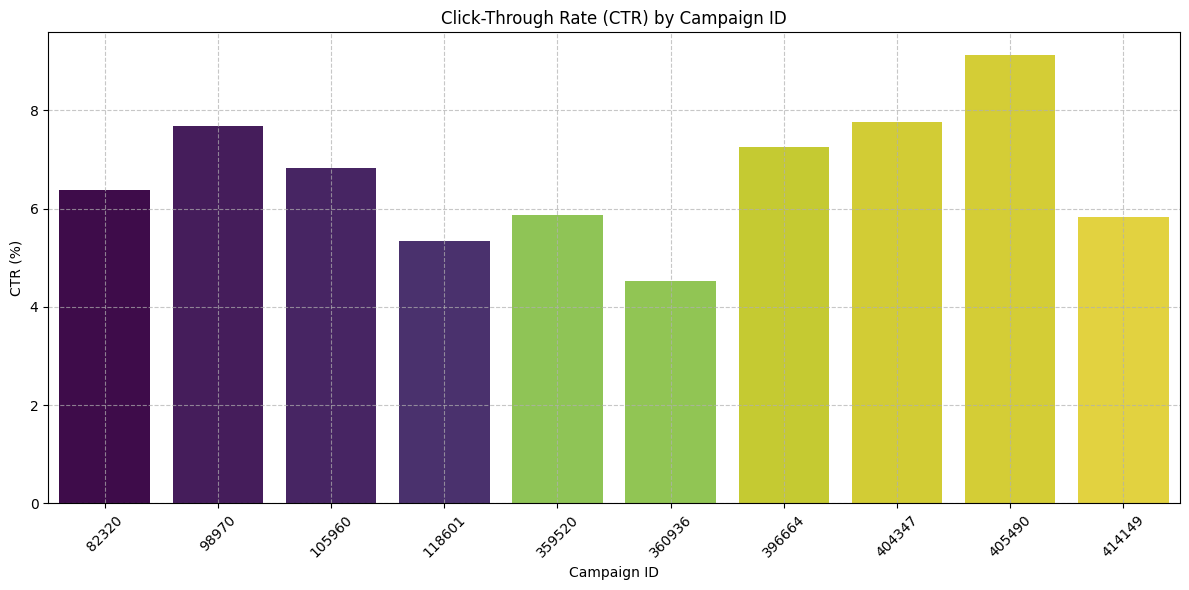

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_ctr.index, y=campaign_ctr['CTR'], hue=campaign_ctr.index, palette='viridis', legend=False)
plt.title('Click-Through Rate (CTR) by Campaign ID')
plt.xlabel('Campaign ID')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insights or Next Steps
*   **Optimize Campaign Strategy**: Campaigns with high CTRs, such as **405490**, **404347**, and **98970**, should be further analyzed to understand their success factors (e.g., ad creative, target audience, placement, product type). These insights can then be applied to improve underperforming campaigns.
*   **Resource Allocation**: Consider allocating more resources to the top-performing campaigns or developing new campaigns that mirror their successful attributes.
*   **Improve Low-Performing Campaigns**: Investigate campaigns with low CTRs (e.g., **360936**, **118601**) to identify reasons for poor engagement. This could involve A/B testing different ad creatives, adjusting targeting, or reviewing the messaging.
*   **Correlation with Volume**: While `campaign_id` `359520` had the highest number of impressions, its CTR (5.86%) was not among the highest, suggesting that high volume does not always equate to high engagement. This highlights the importance of CTR as a performance metric.


### Which products get more clicks?

In [113]:
print("Unique values in 'product':")
print(ad_click_train_data['product'].unique())

print("\nValue counts for 'product':")
print(ad_click_train_data['product'].value_counts())

Unique values in 'product':
['C' 'I' 'F' 'H' 'B' 'D' 'G' 'E' 'J' 'A']

Value counts for 'product':
product
C    163501
H    109574
I     63711
D     41064
B     22479
E     21452
A     15391
J      9698
G      9414
F      7007
Name: count, dtype: int64


In [114]:
product_ctr = ad_click_train_data.groupby('product').agg(
    total_clicks=('is_click', 'sum'),
    total_impressions=('session_id', 'count')
)
product_ctr['CTR'] = (product_ctr['total_clicks'] / product_ctr['total_impressions']) * 100

print("Click-Through Rate (CTR) by Product:")
print("----------------------------------")
print(product_ctr[['CTR']].sort_values(by='CTR', ascending=False))

Click-Through Rate (CTR) by Product:
----------------------------------
              CTR
product          
J        9.269953
D        7.181473
H        6.985234
C        6.914942
E        6.871154
I        6.402348
A        6.191930
B        5.507362
F        4.909376
G        4.620778


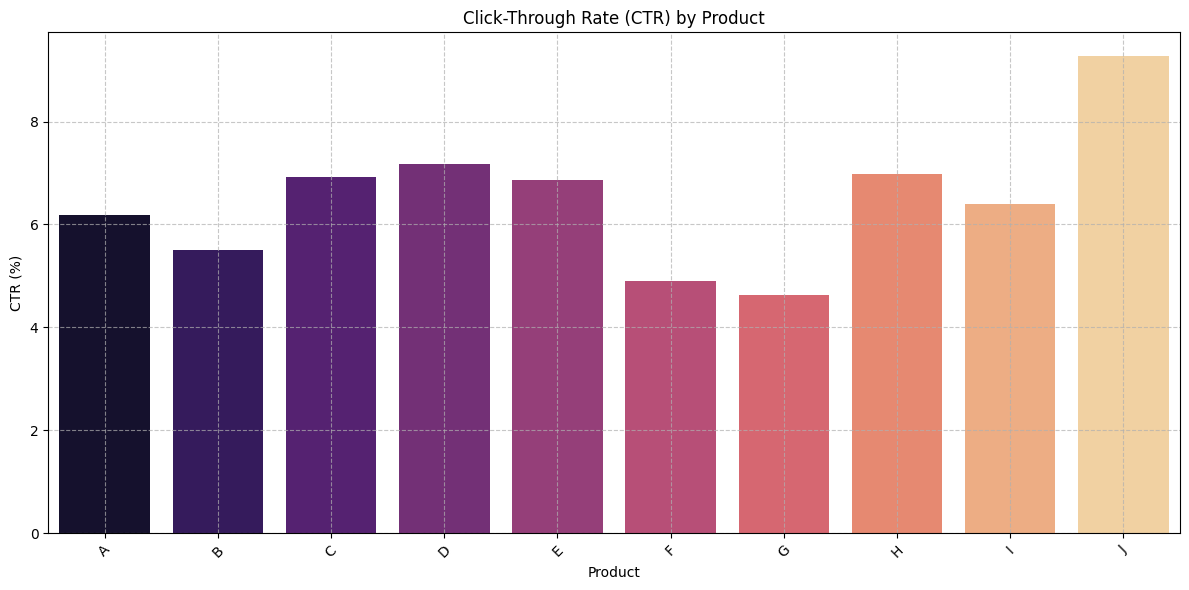

In [115]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_ctr.index, y=product_ctr['CTR'], hue=product_ctr.index, palette='magma', legend=False)
plt.title('Click-Through Rate (CTR) by Product')
plt.xlabel('Product')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

*   **Which products get more clicks?**
    Product **J** has the highest Click-Through Rate (CTR) at **9.27%**, followed by Product **D** (7.18%) and Product **H** (6.99%).

### Data Analysis Key Findings
*   The `product` column contains 10 unique product categories, with 'C' being the most frequent (163,501 entries) and 'F' being the least frequent (7,007 entries).
*   Click-Through Rates (CTRs) were calculated for each product, showing a range of performance from **4.62%** (Product G) to **9.27%** (Product J).
*   Product **J** demonstrated the highest CTR at **9.27%**, indicating strong user engagement.
*   Products **D** (7.18%) and **H** (6.99%) also showed comparatively high CTRs.
*   Products **G** (4.62%) and **F** (4.91%) had the lowest CTRs, suggesting lower user interest or less effective advertising for these categories.
*   The bar plot effectively visualized these differences, clearly highlighting the top-performing products.

### Insights or Next Steps
*   **Product Focus**: Prioritize marketing and advertising efforts on Product **J**, as it exhibits the highest engagement. Investigate the characteristics (e.g., ad creative, target audience, pricing, seasonal relevance) that make Product J so successful and attempt to replicate these factors for other products.
*   **Improve Underperforming Products**: Analyze Products **G** and **F** to understand the reasons behind their low CTRs. This could involve reassessing their market fit, improving product descriptions, optimizing ad campaigns, or exploring different sales channels.
*   **Content and Targeting**: Further examine the demographic and behavioral data of users who click on high-CTR products like J, D, and H to refine targeting strategies for future campaigns across all product categories.
*   **Inventory Management**: High CTR products might indicate high demand. This insight can be used to inform inventory management and supply chain decisions.

### Do certain webpages convert better?

In [116]:
print("Unique values in 'webpage_id':")
print(ad_click_train_data['webpage_id'].unique())

print("\nValue counts for 'webpage_id' before handling missing values:")
print(ad_click_train_data['webpage_id'].value_counts(dropna=False))

missing_webpage_id = ad_click_train_data['webpage_id'].isnull().sum()
print(f"\nNumber of missing values in 'webpage_id': {missing_webpage_id}")

Unique values in 'webpage_id':
[13787 11085 60305 53587  6970 45962  1734 51181 28529]

Value counts for 'webpage_id' before handling missing values:
webpage_id
13787    160043
60305     95973
28529     35531
6970      35065
45962     29314
53587     28826
1734      27849
11085     25781
51181     24909
Name: count, dtype: int64

Number of missing values in 'webpage_id': 0


In [117]:
webpage_ctr = ad_click_train_data.groupby('webpage_id').agg(
    total_clicks=('is_click', 'sum'),
    total_impressions=('session_id', 'count')
)
webpage_ctr['CTR'] = (webpage_ctr['total_clicks'] / webpage_ctr['total_impressions']) * 100

print("Click-Through Rate (CTR) by Webpage ID:")
print("------------------------------------")
print(webpage_ctr[['CTR']].sort_values(by='CTR', ascending=False))

Click-Through Rate (CTR) by Webpage ID:
------------------------------------
                 CTR
webpage_id          
60305       9.130693
53587       7.753417
6970        7.682875
51181       7.262435
11085       6.834491
1734        6.377249
45962       5.833390
13787       5.427291
28529       5.336185


In [118]:
max_ctr_webpage = webpage_ctr['CTR'].idxmax()
max_ctr_value = webpage_ctr['CTR'].max()

print(f"The webpage with the highest CTR is {max_ctr_webpage} with a CTR of {max_ctr_value:.2f}%")

The webpage with the highest CTR is 60305 with a CTR of 9.13%


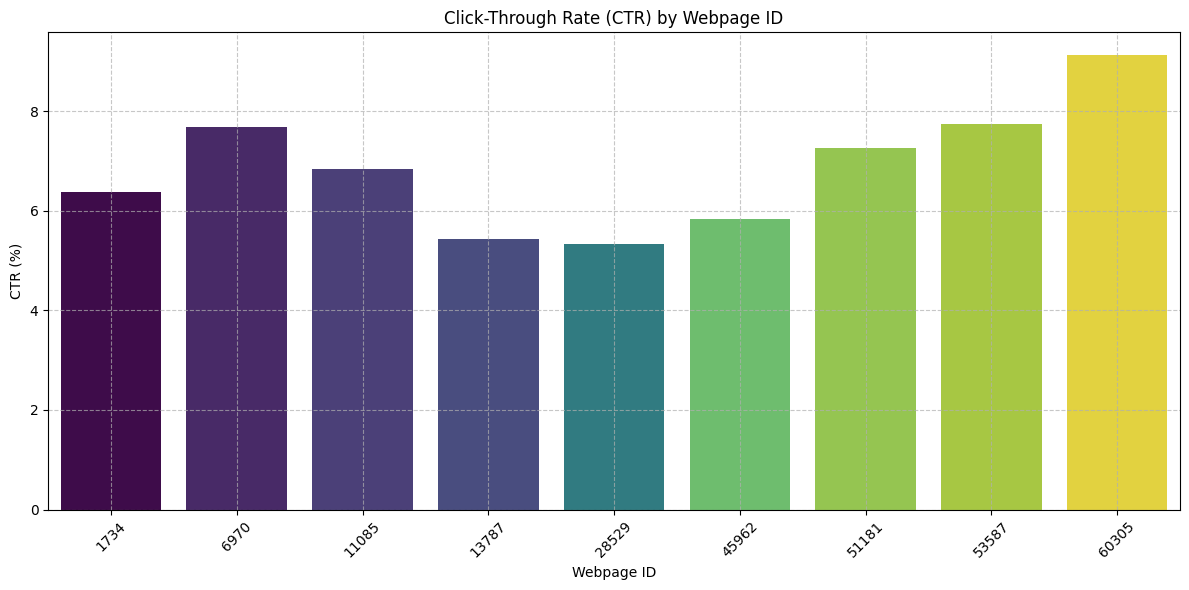

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(x=webpage_ctr.index, y=webpage_ctr['CTR'], hue=webpage_ctr.index, palette='viridis', legend=False)
plt.title('Click-Through Rate (CTR) by Webpage ID')
plt.xlabel('Webpage ID')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

*   **Do certain webpages convert better?**
    Yes, there is a significant variation in Click-Through Rates (CTRs) across different webpages. Webpage **60305** has the highest CTR at **9.13%**, while webpage **28529** has the lowest at **5.34%**.

### Insights or Next Steps
*   **Content Optimization**: Analyze the design, content, and ad placements on high-performing webpages like **60305** to identify best practices. These successful elements should be replicated on underperforming pages to improve their CTRs.
*   **Targeted Improvement**: For webpages with low CTRs (e.g., **28529**, **13787**), conduct a thorough review of their content, user experience, and the relevance of the ads displayed. A/B testing different layouts, call-to-actions, or ad creatives could help boost engagement.
*   **User Flow Analysis**: Investigate the user journey leading to high-CTR webpages. Understanding how users arrive at and interact with these pages can provide valuable insights for optimizing navigation and overall site structure.
*   **Correlation with Product/Campaigns**: Further analysis could explore which products or campaigns are most frequently associated with high-CTR webpages. This can help in aligning specific ad campaigns with the most effective webpage destinations.

## Feature Engineering

### Extract from DateTime column
- hour: Hour of day (0-23)
- day_of_week: Day (0=Monday, 6=Sunday)
- day_of_month: Date of month (1-31)
- month: Month of year (1-12)
- is_weekend: Binary flag (Saturday/Sunday = 1)
- time_of_day: Categorical (night/morning/afternoon/evening)


In [120]:
ad_click_train_data['day_of_month'] = ad_click_train_data['DateTime'].dt.day

print(ad_click_train_data[['DateTime', 'day_of_month']].head())

             DateTime  day_of_month
0 2017-07-02 00:00:00             2
1 2017-07-02 00:00:00             2
2 2017-07-02 00:00:00             2
3 2017-07-02 00:00:00             2
4 2017-07-02 00:01:00             2


In [121]:
ad_click_train_data['is_weekend'] = ad_click_train_data['DateTime'].dt.dayofweek >= 5

print(ad_click_train_data[['DateTime', 'day_of_week', 'is_weekend']].head())

             DateTime  day_of_week  is_weekend
0 2017-07-02 00:00:00            6        True
1 2017-07-02 00:00:00            6        True
2 2017-07-02 00:00:00            6        True
3 2017-07-02 00:00:00            6        True
4 2017-07-02 00:01:00            6        True


In [122]:
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

ad_click_train_data['time_of_day'] = ad_click_train_data['hour_of_day'].apply(get_time_of_day)

print(ad_click_train_data[['DateTime', 'hour_of_day', 'time_of_day']].head())

             DateTime  hour_of_day time_of_day
0 2017-07-02 00:00:00            0       Night
1 2017-07-02 00:00:00            0       Night
2 2017-07-02 00:00:00            0       Night
3 2017-07-02 00:00:00            0       Night
4 2017-07-02 00:01:00            0       Night


In [123]:
print(ad_click_train_data[['DateTime', 'hour_of_day', 'day_of_month', 'is_weekend', 'time_of_day']].head())

             DateTime  hour_of_day  day_of_month  is_weekend time_of_day
0 2017-07-02 00:00:00            0             2        True       Night
1 2017-07-02 00:00:00            0             2        True       Night
2 2017-07-02 00:00:00            0             2        True       Night
3 2017-07-02 00:00:00            0             2        True       Night
4 2017-07-02 00:01:00            0             2        True       Night


### Interaction features

#### *User-Product Interaction Feature*

In [124]:
ad_click_train_data['user_product_interaction'] = ad_click_train_data['user_id'].astype(str) + '_' + ad_click_train_data['product']

print(ad_click_train_data[['user_id', 'product', 'user_product_interaction']].head())

   user_id product user_product_interaction
0   858557       C                 858557_C
1   243253       C                 243253_C
2   243253       C                 243253_C
3  1097446       I                1097446_I
4   663656       C                 663656_C


#### Potential Use for Further Analysis:
This new interaction feature further enriches our dataset by capturing specific user-product relationships, enabling more granular analysis of user behavior:

*   **`user_product_interaction`**: This feature can reveal patterns where specific users repeatedly engage with certain products, or conversely, if a user clicks on a product once and then never again. This can be used to understand customer loyalty to specific product types or to identify products that are failing to retain user interest after the initial click. It can also be crucial for building recommendation systems or for targeted advertising campaigns based on individual user product preferences.

These interaction features are vital for understanding the underlying dynamics of ad clicks, allowing for more personalized and effective marketing strategies.

#### *Campaign-Webpage Interaction Feature*

In [125]:
ad_click_train_data['campaign_webpage'] = ad_click_train_data['campaign_id'].astype(str) + '_' + ad_click_train_data['webpage_id'].astype(str)

print(ad_click_train_data[['campaign_id', 'webpage_id', 'campaign_webpage']].head())

   campaign_id  webpage_id campaign_webpage
0       359520       13787     359520_13787
1       105960       11085     105960_11085
2       359520       13787     359520_13787
3       359520       13787     359520_13787
4       405490       60305     405490_60305


#### Potential Use for Further Analysis:
This new interaction feature further enriches our dataset by capturing specific campaign-webpage relationships, enabling more granular analysis of their combined performance:

*   **`campaign_webpage`**: This feature can be used to identify which specific campaigns perform best on particular webpages. For instance, it can highlight if a certain campaign creative is highly effective only when displayed on a specific landing page, or if some webpages consistently underperform regardless of the campaign. This insight is critical for optimizing ad placement, improving landing page content, and refining campaign strategies to maximize Click-Through Rates and conversion rates.

These interaction features are vital for understanding the underlying dynamics of ad clicks, allowing for more personalized and effective marketing strategies.

#### *Gender-Age Interaction Feature*

In [126]:
ad_click_train_data['gender_age'] = ad_click_train_data['gender'].astype(str) + '_' + ad_click_train_data['age_level'].astype(str)

print(ad_click_train_data[['gender', 'age_level', 'gender_age']].head())

   gender  age_level  gender_age
0  Female        4.0  Female_4.0
1  Female        2.0  Female_2.0
2  Female        2.0  Female_2.0
3    Male        3.0    Male_3.0
4    Male        2.0    Male_2.0


#### Potential Use for Further Analysis:
This new interaction feature further enriches our dataset by capturing specific gender-age relationships, enabling more granular analysis of user behavior:

*   **`gender_age`**: This feature can be used to identify if certain ad creatives, products, or campaigns resonate more strongly with particular gender-age groups. For example, it might reveal that 'Female_2.0' (females in age level 2) have a significantly different click-through rate for a specific product category compared to 'Male_3.0' (males in age level 3). This insight is invaluable for highly targeted advertising, allowing marketers to tailor their messages and product offerings to the most receptive demographic segments. It can also help in understanding the diversity of user preferences and designing more inclusive or segmented marketing strategies.

These interaction features are vital for understanding the underlying dynamics of ad clicks, allowing for more personalized and effective marketing strategies.

### Aggregated Features

#### User-Level Aggregations:

#### Create User-Level Aggregated Feature: `user_total_clicks`

In [127]:
user_total_clicks = ad_click_train_data.groupby('user_id')['is_click'].sum().reset_index()
user_total_clicks.rename(columns={'is_click': 'user_total_clicks'}, inplace=True)

ad_click_train_data = pd.merge(ad_click_train_data, user_total_clicks, on='user_id', how='left')

print(ad_click_train_data[['user_id', 'user_total_clicks']].head())

   user_id  user_total_clicks
0   858557                  0
1   243253                  0
2   243253                  0
3  1097446                  0
4   663656                  2


#### Create User-Level Aggregated Feature: `user_total_views`

In [128]:
user_total_views = ad_click_train_data.groupby('user_id')['session_id'].count().reset_index()
user_total_views.rename(columns={'session_id': 'user_total_views'}, inplace=True)

ad_click_train_data = pd.merge(ad_click_train_data, user_total_views, on='user_id', how='left')

print(ad_click_train_data[['user_id', 'user_total_views']].head())

   user_id  user_total_views
0   858557                 2
1   243253                 3
2   243253                 3
3  1097446                18
4   663656                11


### Summary of New Aggregated Features

### New Features Created:
*   `user_total_clicks`: The total number of clicks each user has made across all sessions.
*   `user_total_views`: The total number of ad impressions each user has seen across all sessions.

### Potential Use for Further Analysis:
These aggregated features provide user-level behavioral insights that can be highly predictive and useful for advanced analytics and machine learning models:

*   **`user_total_clicks`**: This feature quantifies how active and engaged a user is. Users with higher total clicks might represent a more valuable segment (e.g., highly interested buyers). It can be used to:
    *   Identify 'power users' or highly engaged individuals.
    *   Segment users based on their historical click behavior.
    *   Serve as a critical input for predictive models to forecast future clicks or conversions.
    *   Gauge the overall effectiveness of ad campaigns on an individual user basis.

*   **`user_total_views`**: This feature indicates the exposure level of a user to ads. Combined with `user_total_clicks`, it can help derive an individual user's average CTR, which is a powerful metric for understanding their propensity to click. It can be used to:
    *   Identify users who are frequently exposed to ads but rarely click (low engagement).
    *   Help personalize ad frequency and avoid ad fatigue for over-exposed users.
    *   Improve targeting strategies by understanding the relationship between exposure and clicks at a user level.

By combining these two features, we can also derive a `user_CTR` (user_total_clicks / user_total_views), providing a personalized measure of click-through propensity. These features are essential for building robust recommendation systems, personalized marketing campaigns, and predictive models to optimize ad delivery and maximize engagement.

#### Create User-Level Aggregated Feature: `user_CTR`

In [129]:
ad_click_train_data['user_CTR'] = (ad_click_train_data['user_total_clicks'] / ad_click_train_data['user_total_views']) * 100

# Handle potential division by zero (if a user had 0 views, CTR should be 0 or NaN)
ad_click_train_data['user_CTR'] = ad_click_train_data['user_CTR'].fillna(0)

print(ad_click_train_data[['user_id', 'user_total_clicks', 'user_total_views', 'user_CTR']].head())

   user_id  user_total_clicks  user_total_views   user_CTR
0   858557                  0                 2   0.000000
1   243253                  0                 3   0.000000
2   243253                  0                 3   0.000000
3  1097446                  0                18   0.000000
4   663656                  2                11  18.181818


### Summary of New Aggregated Feature: `user_CTR`

### New Feature Created:
*   `user_CTR`: Represents the individual Click-Through Rate for each user, calculated as (`user_total_clicks` / `user_total_views`) * 100.

### Potential Use for Further Analysis:
This `user_CTR` feature provides a highly personalized metric that can significantly enhance our understanding of user behavior and improve predictive models:

*   **Personalized Engagement Metric**: `user_CTR` quantifies a user's propensity to click on ads based on their historical interactions. A high `user_CTR` indicates a highly engaged user who is more likely to click in the future, while a low `user_CTR` suggests lower engagement.

*   **Targeted Advertising**: This feature can be used to segment users based on their click propensity. Ads can be dynamically served to users with high `user_CTR` who are more likely to convert, or strategies can be developed to re-engage users with low `user_CTR`.

*   **Fraud Detection/Bot Identification**: Anomalously high or low `user_CTR` values might indicate bot activity or fraudulent clicks, which can be investigated further.

*   **Feature for Machine Learning Models**: `user_CTR` can serve as a powerful feature in predictive models to forecast future clicks, conversions, or user churn. It encapsulates a user's historical behavior into a single, highly informative metric.

*   **Ad Fatigue Management**: By monitoring individual `user_CTR`, we can optimize ad frequency to avoid bombarding users who rarely click, thereby improving user experience and potentially reducing ad spend waste.

This `user_CTR` feature, alongside `user_total_clicks` and `user_total_views`, offers a comprehensive view of individual user engagement, paving the way for more sophisticated analysis and personalized marketing strategies.

#### Create User-Level Aggregated Feature: `user_sessions`

In [130]:
user_sessions = ad_click_train_data.groupby('user_id')['session_id'].nunique().reset_index()
user_sessions.rename(columns={'session_id': 'user_sessions'}, inplace=True)

ad_click_train_data = pd.merge(ad_click_train_data, user_sessions, on='user_id', how='left')

print(ad_click_train_data[['user_id', 'user_sessions']].head())

   user_id  user_sessions
0   858557              2
1   243253              3
2   243253              3
3  1097446             18
4   663656             11


### Summary of New Aggregated Feature: `user_sessions`

### New Feature Created:
*   `user_sessions`: Represents the number of unique sessions per user.

### Potential Use for Further Analysis:
This `user_sessions` feature provides insights into the breadth of a user's engagement, indicating how many distinct browsing instances they have had:

*   **Engagement Breadth**: A higher number of unique sessions might indicate a more active and loyal user who returns frequently, or it could highlight users who are exploring various parts of the platform or different ad campaigns over time.

*   **User Segmentation**: Users can be segmented based on their session count. For instance, users with very few sessions might be new or less engaged, while those with many sessions are highly involved. This can inform targeted re-engagement strategies or loyalty programs.

*   **Ad Context**: Combined with other temporal features, `user_sessions` can help understand if users engage with ads more effectively during their first few sessions, or if engagement builds over time. It can also distinguish between single-session explorers and multi-session deep-divers.

*   **Feature for Machine Learning Models**: `user_sessions` can serve as a valuable numerical feature in predictive models for click-through rate, conversion, or user churn, providing a quantitative measure of user activity and stickiness.

This feature, alongside `user_total_clicks`, `user_total_views`, and `user_CTR`, contributes to a holistic understanding of individual user behavior, enabling more sophisticated analysis and personalized marketing strategies.

#### Product-Level Aggregations:

#### Product-Level Aggregated Feature: `product_views`

In [131]:
product_views = ad_click_train_data.groupby('product')['session_id'].count().reset_index()
product_views.rename(columns={'session_id': 'product_views'}, inplace=True)

ad_click_train_data = pd.merge(ad_click_train_data, product_views, on='product', how='left')

print(ad_click_train_data[['product', 'product_views']].head())

  product  product_views
0       C         163501
1       C         163501
2       C         163501
3       I          63711
4       C         163501


#### Product-Level Aggregated Feature: `product_ctr`

In [132]:
product_total_clicks = ad_click_train_data.groupby('product')['is_click'].sum().reset_index()
product_total_clicks.rename(columns={'is_click': 'product_total_clicks'}, inplace=True)

ad_click_train_data = pd.merge(ad_click_train_data, product_total_clicks, on='product', how='left')

ad_click_train_data['product_ctr'] = (ad_click_train_data['product_total_clicks'] / ad_click_train_data['product_views']) * 100

# Handle potential division by zero (if a product had 0 views, CTR should be 0 or NaN)
ad_click_train_data['product_ctr'] = ad_click_train_data['product_ctr'].fillna(0)

print(ad_click_train_data[['product', 'product_total_clicks', 'product_views', 'product_ctr']].head())

  product  product_total_clicks  product_views  product_ctr
0       C                 11306         163501     6.914942
1       C                 11306         163501     6.914942
2       C                 11306         163501     6.914942
3       I                  4079          63711     6.402348
4       C                 11306         163501     6.914942


### Summary of New Aggregated Feature: `product_ctr`

### New Feature Created:
*   `product_ctr`: This product's historical click rate, calculated as (`product_total_clicks` / `product_views`) * 100.

### Potential Use for Further Analysis:
This `product_ctr` feature provides a crucial metric for understanding product performance and can significantly enhance predictive models and marketing strategies:

*   **Product Performance Evaluation**: `product_ctr` directly quantifies how engaging each product is to users. Products with high CTR are highly effective at capturing user interest, while low CTR products might indicate issues with their appeal or advertising.

*   **Marketing Strategy Optimization**: This feature can guide marketing teams in allocating resources. Products with high `product_ctr` could be highlighted in campaigns, or efforts could be focused on improving the advertising for products with low `product_ctr`.

*   **Content and Creative Assessment**: Analyzing the creative content and messaging associated with high `product_ctr` products can reveal best practices that can be applied to other product categories.

*   **Personalization**: When combined with user-level features, `product_ctr` can contribute to more personalized recommendations, ensuring users are shown products they are historically more likely to click on.

*   **Feature for Machine Learning Models**: `product_ctr` serves as a powerful numerical feature for machine learning models aiming to predict future clicks, conversions, or overall product success. It encapsulates a product's historical engagement effectiveness into a single, informative metric.

### Campaign-Level Aggregations:

#### Campaign-Level Aggregated Feature: `campaign_views`

In [133]:
campaign_views = ad_click_train_data.groupby('campaign_id')['session_id'].count().reset_index()
campaign_views.rename(columns={'session_id': 'campaign_views'}, inplace=True)

ad_click_train_data = pd.merge(ad_click_train_data, campaign_views, on='campaign_id', how='left')

print(ad_click_train_data[['campaign_id', 'campaign_views']].head())

   campaign_id  campaign_views
0       359520          108155
1       105960           25781
2       359520          108155
3       359520          108155
4       405490           95973


#### Campaign-Level Aggregated Feature: `campaign_ctr`

In [134]:
campaign_total_clicks = ad_click_train_data.groupby('campaign_id')['is_click'].sum().reset_index()
campaign_total_clicks.rename(columns={'is_click': 'campaign_total_clicks'}, inplace=True)

ad_click_train_data = pd.merge(ad_click_train_data, campaign_total_clicks, on='campaign_id', how='left')

ad_click_train_data['campaign_ctr'] = (ad_click_train_data['campaign_total_clicks'] / ad_click_train_data['campaign_views']) * 100

# Handle potential division by zero (if a campaign had 0 views, CTR should be 0 or NaN)
ad_click_train_data['campaign_ctr'] = ad_click_train_data['campaign_ctr'].fillna(0)

print(ad_click_train_data[['campaign_id', 'campaign_total_clicks', 'campaign_views', 'campaign_ctr']].head())

   campaign_id  campaign_total_clicks  campaign_views  campaign_ctr
0       359520                   6340          108155      5.861957
1       105960                   1762           25781      6.834491
2       359520                   6340          108155      5.861957
3       359520                   6340          108155      5.861957
4       405490                   8763           95973      9.130693


### Summary of New Aggregated Feature: `campaign_ctr`

### New Feature Created:
*   `campaign_ctr`: This campaign's historical click rate, calculated as (`campaign_total_clicks` / `campaign_views`) * 100.

### Potential Use for Further Analysis:
This `campaign_ctr` feature provides a crucial metric for understanding campaign performance and can significantly enhance predictive models and marketing strategies:

*   **Campaign Performance Evaluation**: `campaign_ctr` directly quantifies how engaging each campaign is to users. Campaigns with high CTR are highly effective at capturing user interest, while low CTR campaigns might indicate issues with their appeal, targeting, or creative content.

*   **Marketing Strategy Optimization**: This feature can guide marketing teams in allocating resources. Campaigns with high `campaign_ctr` could be prioritized and scaled, or efforts could be focused on improving the advertising for campaigns with low `campaign_ctr`.

*   **A/B Testing and Creative Assessment**: Analyzing the creative content, messaging, and targeting strategies associated with high `campaign_ctr` campaigns can reveal best practices that can be applied to other campaigns.

*   **Budget Allocation**: By understanding the historical performance of campaigns, advertising budgets can be optimized to invest more in highly effective campaigns and less in underperforming ones.

*   **Feature for Machine Learning Models**: `campaign_ctr` serves as a powerful numerical feature for machine learning models aiming to predict future clicks, conversions, or overall campaign success. It encapsulates a campaign's historical engagement effectiveness into a single, informative metric.

### Encode Categorical Variables
Approach: Label Encoding

**Columns to Encode:**
* product
* campaign_id
* webpage_id
* product_category_1
* product_category_2
* gender
* user_group_id
* var_1
* All interaction features (user_product_interaction, etc.)

In [135]:
print("Unique values in 'product_category_2' before handling missing values:")
print(ad_click_train_data['product_category_2'].value_counts(dropna=False).head())

missing_product_category_2 = ad_click_train_data['product_category_2'].isnull().sum()
print(f"\nNumber of missing values in 'product_category_2': {missing_product_category_2}")

if missing_product_category_2 > 0:
    mode_product_category_2 = ad_click_train_data['product_category_2'].mode()[0]
    ad_click_train_data['product_category_2'] = ad_click_train_data['product_category_2'].fillna(mode_product_category_2)
    print(f"Missing values in 'product_category_2' filled with mode: {mode_product_category_2}")

print("\nValue counts for 'product_category_2' after handling missing values:")
print(ad_click_train_data['product_category_2'].value_counts(dropna=False).head())

Unique values in 'product_category_2' before handling missing values:
product_category_2
NaN         365854
82527.0      35531
146115.0     25224
270915.0     19624
254132.0     12502
Name: count, dtype: int64

Number of missing values in 'product_category_2': 365854
Missing values in 'product_category_2' filled with mode: 82527.0

Value counts for 'product_category_2' after handling missing values:
product_category_2
82527.0     401385
146115.0     25224
270915.0     19624
254132.0     12502
143597.0      2701
Name: count, dtype: int64


In [136]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [
    'product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
    'gender', 'user_group_id', 'var_1', 'user_product_interaction', 'campaign_webpage', 'gender_age'
]

# Dictionary to store LabelEncoders for potential inverse transformation later
label_encoders = {}

print("Encoding categorical variables...")
for col in columns_to_encode:
    le = LabelEncoder()
    ad_click_train_data[col] = le.fit_transform(ad_click_train_data[col])
    label_encoders[col] = le
    print(f"  - Encoded '{col}'")

print("\nFirst 5 rows of the DataFrame with encoded columns:")
print(ad_click_train_data[columns_to_encode].head())

Encoding categorical variables...
  - Encoded 'product'
  - Encoded 'campaign_id'
  - Encoded 'webpage_id'
  - Encoded 'product_category_1'
  - Encoded 'product_category_2'
  - Encoded 'gender'
  - Encoded 'user_group_id'
  - Encoded 'var_1'
  - Encoded 'user_product_interaction'
  - Encoded 'campaign_webpage'
  - Encoded 'gender_age'

First 5 rows of the DataFrame with encoded columns:
   product  campaign_id  webpage_id  product_category_1  product_category_2  \
0        2            4           3                   3                   3   
1        2            2           2                   4                   3   
2        2            4           3                   3                   3   
3        8            4           3                   2                   3   
4        2            8           8                   2                   3   

   gender  user_group_id  var_1  user_product_interaction  campaign_webpage  \
0       0             10      0                    21552

## Summary of Encoded Features

### Encoded Columns:
All specified categorical columns and interaction features have been successfully encoded using `LabelEncoder`:
*   `product`
*   `campaign_id`
*   `webpage_id`
*   `product_category_1`
*   `product_category_2`
*   `gender`
*   `user_group_id`
*   `var_1`
*   `user_product_interaction`
*   `campaign_webpage`
*   `gender_age`

### Data Transformation Key Findings:
*   Missing values in `product_category_2` were imputed with the mode (`82527.0`) prior to encoding, ensuring data completeness.
*   Each unique category within the specified columns has been converted into a unique numerical label (starting from 0).

### Potential Use for Further Analysis:
*   **Machine Learning Model Compatibility**: The primary benefit of label encoding is to convert categorical data into a numerical format that machine learning algorithms (which typically require numerical input) can process directly.
*   **Reduced Dimensionality**: For features with many unique categories (especially interaction features), label encoding provides a compact numerical representation, avoiding the high dimensionality that could result from one-hot encoding.
*   **Improved Model Performance**: By transforming these features, the dataset is now better prepared for training models like Decision Trees, Random Forests, Gradient Boosting Machines, or neural networks, potentially leading to improved model performance in predicting ad clicks.
*   **Feature Importance**: The numerical nature of these encoded features allows models to assess their importance in predicting the target variable, helping to identify which categorical aspects have the most significant impact on click-through rates.

### Columns to drop:
* 'DateTime', 'session_id', 'user_id'

**Reasoning**:
The 'DateTime' column has already been used to extract temporal features, and 'session_id' and 'user_id' have been used to create aggregated and interaction features. These original columns are no longer needed for direct model training and can be dropped to reduce dimensionality and avoid potential data leakage (especially for 'session_id' and 'user_id' if not handled carefully in modeling). I will use the `drop()` method with `axis=1` to remove them from the DataFrame.

In [137]:
columns_to_drop = ['DateTime', 'session_id', 'user_id']
ad_click_train_data = ad_click_train_data.drop(columns=columns_to_drop)

print("First 5 rows of the DataFrame after dropping columns:")
print(ad_click_train_data.head())
print("\nRemaining columns in the DataFrame:")
print(ad_click_train_data.columns)

First 5 rows of the DataFrame after dropping columns:
   product  campaign_id  webpage_id  product_category_1  product_category_2  \
0        2            4           3                   3                   3   
1        2            2           2                   4                   3   
2        2            4           3                   3                   3   
3        8            4           3                   2                   3   
4        2            8           8                   2                   3   

   user_group_id  gender  age_level  user_depth  city_development_index  ...  \
0             10       0        4.0         3.0                     3.0  ...   
1              8       0        2.0         2.0                     NaN  ...   
2              8       0        2.0         2.0                     NaN  ...   
3              3       1        3.0         3.0                     2.0  ...   
4              2       1        2.0         3.0                     2.0

#### Perform the same feature engineering and data preprocessing tasks for the ad_click_test_data as done for ad_click_train_data.

## Prepare Test Data - Temporal Features


In [138]:
ad_click_test_data['DateTime'] = pd.to_datetime(ad_click_test_data['DateTime'])
ad_click_test_data['hour_of_day'] = ad_click_test_data['DateTime'].dt.hour
ad_click_test_data['day_of_week'] = ad_click_test_data['DateTime'].dt.dayofweek
ad_click_test_data['day_of_month'] = ad_click_test_data['DateTime'].dt.day
ad_click_test_data['is_weekend'] = ad_click_test_data['DateTime'].dt.dayofweek >= 5
ad_click_test_data['day_type'] = ad_click_test_data['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
ad_click_test_data['time_of_day'] = ad_click_test_data['hour_of_day'].apply(get_time_of_day)

print(ad_click_test_data[['DateTime', 'hour_of_day', 'day_of_week', 'day_of_month', 'day_type', 'is_weekend', 'time_of_day']].head())

    DateTime  hour_of_day  day_of_week  day_of_month day_type  is_weekend  \
0 2017-07-08            0            5             8  Weekend        True   
1 2017-07-08            0            5             8  Weekend        True   
2 2017-07-08            0            5             8  Weekend        True   
3 2017-07-08            0            5             8  Weekend        True   
4 2017-07-08            0            5             8  Weekend        True   

  time_of_day  
0       Night  
1       Night  
2       Night  
3       Night  
4       Night  


In [139]:
print("Unique values in 'age_level' before handling missing values:")
print(ad_click_test_data['age_level'].value_counts(dropna=False).head())

missing_age_level_test = ad_click_test_data['age_level'].isnull().sum()
print(f"\nNumber of missing values in 'age_level' (test data): {missing_age_level_test}")

if missing_age_level_test > 0:
    ad_click_test_data['age_level'] = ad_click_test_data['age_level'].fillna(mode_age_level)
    print(f"Missing values in 'age_level' (test data) filled with mode from train data: {mode_age_level}")

print("\nUnique values in 'gender' before handling missing values:")
print(ad_click_test_data['gender'].value_counts(dropna=False).head())

missing_gender_test = ad_click_test_data['gender'].isnull().sum()
print(f"\nNumber of missing values in 'gender' (test data): {missing_gender_test}")

if missing_gender_test > 0:
    ad_click_test_data['gender'] = ad_click_test_data['gender'].fillna(mode_gender)
    print(f"Missing values in 'gender' (test data) filled with mode from train data: {mode_gender}")

print("\nUnique values in 'user_group_id' before handling missing values:")
print(ad_click_test_data['user_group_id'].value_counts(dropna=False).head())

missing_user_group_id_test = ad_click_test_data['user_group_id'].isnull().sum()
print(f"\nNumber of missing values in 'user_group_id' (test data): {missing_user_group_id_test}")

if missing_user_group_id_test > 0:
    ad_click_test_data['user_group_id'] = ad_click_test_data['user_group_id'].fillna(mode_user_group_id)
    print(f"Missing values in 'user_group_id' (test data) filled with mode from train data: {mode_user_group_id}")

print("\nUnique values in 'product_category_2' before handling missing values:")
print(ad_click_test_data['product_category_2'].value_counts(dropna=False).head())

missing_product_category_2_test = ad_click_test_data['product_category_2'].isnull().sum()
print(f"\nNumber of missing values in 'product_category_2' (test data): {missing_product_category_2_test}")

if missing_product_category_2_test > 0:
    ad_click_test_data['product_category_2'] = ad_click_test_data['product_category_2'].fillna(mode_product_category_2)
    print(f"Missing values in 'product_category_2' (test data) filled with mode from train data: {mode_product_category_2}")

print("\nValue counts for 'age_level' after handling missing values:")
print(ad_click_test_data['age_level'].value_counts(dropna=False).head())
print("\nValue counts for 'gender' after handling missing values:")
print(ad_click_test_data['gender'].value_counts(dropna=False).head())
print("\nValue counts for 'user_group_id' after handling missing values:")
print(ad_click_test_data['user_group_id'].value_counts(dropna=False).head())
print("\nValue counts for 'product_category_2' after handling missing values:")
print(ad_click_test_data['product_category_2'].value_counts(dropna=False).head())

Unique values in 'age_level' before handling missing values:
age_level
3.0    43234
2.0    38711
4.0    18884
1.0    11896
5.0     9565
Name: count, dtype: int64

Number of missing values in 'age_level' (test data): 5684
Missing values in 'age_level' (test data) filled with mode from train data: 3.0

Unique values in 'gender' before handling missing values:
gender
Male      108525
Female     14649
NaN         5684
Name: count, dtype: int64

Number of missing values in 'gender' (test data): 5684
Missing values in 'gender' (test data) filled with mode from train data: Male

Unique values in 'user_group_id' before handling missing values:
user_group_id
3.0    37785
2.0    37093
4.0    14857
1.0    11510
5.0     6730
Name: count, dtype: int64

Number of missing values in 'user_group_id' (test data): 5684
Missing values in 'user_group_id' (test data) filled with mode from train data: 3.0

Unique values in 'product_category_2' before handling missing values:
product_category_2
NaN         76

In [140]:
ad_click_test_data['user_product_interaction'] = ad_click_test_data['user_id'].astype(str) + '_' + ad_click_test_data['product']
ad_click_test_data['campaign_webpage'] = ad_click_test_data['campaign_id'].astype(str) + '_' + ad_click_test_data['webpage_id'].astype(str)
ad_click_test_data['gender_age'] = ad_click_test_data['gender'].astype(str) + '_' + ad_click_test_data['age_level'].astype(str)

print(ad_click_test_data[['user_id', 'product', 'user_product_interaction', 'campaign_id', 'webpage_id', 'campaign_webpage', 'gender', 'age_level', 'gender_age']].head())

   user_id product user_product_interaction  campaign_id  webpage_id  \
0   732573       J                 732573_J       404347       53587   
1   172910       I                 172910_I       118601       28529   
2   172910       I                 172910_I       118601       28529   
3   557318       G                 557318_G       118601       28529   
4   923896       H                 923896_H       118601       28529   

  campaign_webpage  gender  age_level  gender_age  
0     404347_53587    Male        5.0    Male_5.0  
1     118601_28529    Male        3.0    Male_3.0  
2     118601_28529    Male        3.0    Male_3.0  
3     118601_28529    Male        1.0    Male_1.0  
4     118601_28529  Female        3.0  Female_3.0  


In [141]:
user_total_views_test = ad_click_test_data.groupby('user_id')['session_id'].count().reset_index()
user_total_views_test.rename(columns={'session_id': 'user_total_views'}, inplace=True)

ad_click_test_data = pd.merge(ad_click_test_data, user_total_views_test, on='user_id', how='left')

print(ad_click_test_data[['user_id', 'user_total_views']].head())

   user_id  user_total_views
0   732573                 1
1   172910                27
2   172910                27
3   557318                 1
4   923896                 1


In [142]:
product_views_test = ad_click_test_data.groupby('product')['session_id'].count().reset_index()
product_views_test.rename(columns={'session_id': 'product_views'}, inplace=True)

ad_click_test_data = pd.merge(ad_click_test_data, product_views_test, on='product', how='left')

print(ad_click_test_data[['product', 'product_views']].head())

  product  product_views
0       J           2453
1       I          12727
2       I          12727
3       G           3011
4       H          44880


In [143]:
campaign_views_test = ad_click_test_data.groupby('campaign_id')['session_id'].count().reset_index()
campaign_views_test.rename(columns={'session_id': 'campaign_views'}, inplace=True)

ad_click_test_data = pd.merge(ad_click_test_data, campaign_views_test, on='campaign_id', how='left')

print(ad_click_test_data[['campaign_id', 'campaign_views']].head())

   campaign_id  campaign_views
0       404347            6514
1       118601           36191
2       118601           36191
3       118601           36191
4       118601           36191


In [144]:
print("Unique values in 'product_category_2' before handling missing values:")
print(ad_click_test_data['product_category_2'].value_counts(dropna=False).head())

missing_product_category_2 = ad_click_test_data['product_category_2'].isnull().sum()
print(f"\nNumber of missing values in 'product_category_2': {missing_product_category_2}")

if missing_product_category_2 > 0:
    mode_product_category_2 = ad_click_test_data['product_category_2'].mode()[0]
    ad_click_test_data['product_category_2'] = ad_click_test_data['product_category_2'].fillna(mode_product_category_2)
    print(f"Missing values in 'product_category_2' filled with mode: {mode_product_category_2}")

print("\nValue counts for 'product_category_2' after handling missing values:")
print(ad_click_test_data['product_category_2'].value_counts(dropna=False).head())

Unique values in 'product_category_2' before handling missing values:
product_category_2
82527.0     112362
270915.0      8318
146115.0      5692
254132.0      1617
269093.0       408
Name: count, dtype: int64

Number of missing values in 'product_category_2': 0

Value counts for 'product_category_2' after handling missing values:
product_category_2
82527.0     112362
270915.0      8318
146115.0      5692
254132.0      1617
269093.0       408
Name: count, dtype: int64


In [145]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [
    'product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
    'gender', 'user_group_id', 'var_1', 'user_product_interaction', 'campaign_webpage', 'gender_age'
]

# Dictionary to store LabelEncoders for potential inverse transformation later
label_encoders = {}

print("Encoding categorical variables...")
for col in columns_to_encode:
    le = LabelEncoder()
    ad_click_test_data[col] = le.fit_transform(ad_click_test_data[col])
    label_encoders[col] = le
    print(f"  - Encoded '{col}'")

print("\nFirst 5 rows of the DataFrame with encoded columns:")
print(ad_click_test_data[columns_to_encode].head())

Encoding categorical variables...
  - Encoded 'product'
  - Encoded 'campaign_id'
  - Encoded 'webpage_id'
  - Encoded 'product_category_1'
  - Encoded 'product_category_2'
  - Encoded 'gender'
  - Encoded 'user_group_id'
  - Encoded 'var_1'
  - Encoded 'user_product_interaction'
  - Encoded 'campaign_webpage'
  - Encoded 'gender_age'

First 5 rows of the DataFrame with encoded columns:
   product  campaign_id  webpage_id  product_category_1  product_category_2  \
0        9            7           7                   0                   2   
1        8            3           4                   2                   2   
2        8            3           4                   3                   2   
3        6            3           4                   4                   2   
4        7            3           4                   4                   2   

   gender  user_group_id  var_1  user_product_interaction  campaign_webpage  \
0       1              5      0                     6965

In [146]:
# --- Step 1: Impute remaining missing values for ad_click_train_data ---
# Compute mode for city_development_index from training data
mode_city_development_index = ad_click_train_data['city_development_index'].mode()[0]
ad_click_train_data['city_development_index'] = ad_click_train_data['city_development_index'].fillna(mode_city_development_index)
print(f"Missing values in city_development_index (train data) filled with mode: {mode_city_development_index}")

# Compute mode for user_depth from training data
mode_user_depth = ad_click_train_data['user_depth'].mode()[0]
ad_click_train_data['user_depth'] = ad_click_train_data['user_depth'].fillna(mode_user_depth)
print(f"Missing values in user_depth (train data) filled with mode: {mode_user_depth}")

# --- Step 2: Impute remaining missing values for ad_click_test_data (using modes from train data) ---
ad_click_test_data['age_level'] = ad_click_test_data['age_level'].fillna(mode_age_level)
ad_click_test_data['gender'] = ad_click_test_data['gender'].fillna(mode_gender)
ad_click_test_data['user_group_id'] = ad_click_test_data['user_group_id'].fillna(mode_user_group_id)
ad_click_test_data['product_category_2'] = ad_click_test_data['product_category_2'].fillna(mode_product_category_2)
ad_click_test_data['city_development_index'] = ad_click_test_data['city_development_index'].fillna(mode_city_development_index)
ad_click_test_data['user_depth'] = ad_click_test_data['user_depth'].fillna(mode_user_depth)
print("\nMissing values in ad_click_test_data imputed using modes from train data.")

# --- Step 3: Convert 'is_weekend' to integer type for both train and test data ---
ad_click_train_data['is_weekend'] = ad_click_train_data['is_weekend'].astype(int)
ad_click_test_data['is_weekend'] = ad_click_test_data['is_weekend'].astype(int)
print("\n'is_weekend' column converted to integer type for both train and test data.")

# --- Step 4: Re-Label Encode all specified categorical features ---
columns_to_encode_complete = [
    'product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
    'gender', 'user_group_id', 'var_1', 'user_product_interaction', 'campaign_webpage',
    'gender_age', 'day_type', 'time_of_day'
]

# Reinitialize label_encoders to ensure fresh encoders are used
label_encoders = {}

print("\nRe-encoding all categorical variables (including day_type and time_of_day)...")
for col in columns_to_encode_complete:
    le = LabelEncoder()
    # Fit on training data and transform
    ad_click_train_data[col] = le.fit_transform(ad_click_train_data[col])
    label_encoders[col] = le # Store the encoder

    # Transform test data, handling unseen categories
    # Convert categories to string for consistent comparison, as data types might differ between train and test
    train_labels = set(le.classes_.astype(str))
    test_labels = set(ad_click_test_data[col].astype(str).unique())
    unseen_labels = test_labels - train_labels

    if unseen_labels:
        # Create a mapping for known labels and assign -1 for unknown/unseen labels
        mapping = {label: idx for idx, label in enumerate(le.classes_)}
        ad_click_test_data[col] = ad_click_test_data[col].astype(str).map(mapping).fillna(-1).astype(int)
        print(f"  - Encoded '{col}' (with unseen categories mapped to -1)")
    else:
        ad_click_test_data[col] = le.transform(ad_click_test_data[col])
        print(f"  - Encoded '{col}'")

# --- Step 5: Define features (X) and target (y) for ad_click_train_data ---
# Columns to drop from training features to avoid data leakage and include only non-target-dependent features
columns_to_exclude_from_X = [
    'is_click',              # Target variable itself
    'DateTime', 'session_id', 'user_id', # Original identifier columns
    # Target-dependent aggregated features - these should not be used as features for prediction
    'user_total_clicks', 'user_CTR', 'user_sessions',
    'product_total_clicks', 'product_ctr',
    'campaign_total_clicks', 'campaign_ctr'
]
X = ad_click_train_data.drop(columns=columns_to_exclude_from_X, errors='ignore')
y = ad_click_train_data['is_click']

print("\nFeatures for training (X) and target (y) defined.")
print(f"X columns: {X.columns.tolist()}")

# --- Step 6: Split training data into X_train, X_test, y_train, y_test ---
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nShape of X_train after splitting: {X_train.shape}")
print(f"Shape of X_test after splitting: {X_test.shape}")
print(f"Shape of y_train after splitting: {y_train.shape}")
print(f"Shape of y_test after splitting: {y_test.shape}")

# --- Step 7: Standard Scale X_train and X_test ---
numerical_features_to_scale = X_train.columns.tolist() # All columns in X_train are now numerical
scaler = StandardScaler()

X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])

print("\nTrain and test features (X_train, X_test) scaled.")

# --- Step 8: Prepare and Standard Scale ad_click_test_data ---
# Drop original identifier columns from ad_click_test_data
columns_to_drop_from_ad_click_test = ['DateTime', 'session_id', 'user_id']
ad_click_test_data = ad_click_test_data.drop(columns=columns_to_drop_from_ad_click_test, errors='ignore')

# Ensure ad_click_test_data has the exact same columns as X_train before scaling
# This is critical for model prediction consistency
# Filter ad_click_test_data to match X_train's columns (numerical_features_to_scale)
missing_cols_in_test = set(numerical_features_to_scale) - set(ad_click_test_data.columns)
for col in missing_cols_in_test:
    ad_click_test_data[col] = 0 # Or some other sensible default if a feature is truly missing

# Ensure order of columns is identical
ad_click_test_data = ad_click_test_data[numerical_features_to_scale]

# Scale ad_click_test_data using the *fitted* scaler from X_train
ad_click_test_data[numerical_features_to_scale] = scaler.transform(ad_click_test_data[numerical_features_to_scale])

print("\nad_click_test_data prepared and scaled with consistent features.")

print("\nFirst 5 rows of X_train after all processing:")
print(X_train.head())
print("\nFirst 5 rows of X_test after all processing:")
print(X_test.head())
print("\nFirst 5 rows of ad_click_test_data after all processing:")
print(ad_click_test_data.head())

Missing values in city_development_index (train data) filled with mode: 2.0
Missing values in user_depth (train data) filled with mode: 3.0

Missing values in ad_click_test_data imputed using modes from train data.

'is_weekend' column converted to integer type for both train and test data.

Re-encoding all categorical variables (including day_type and time_of_day)...
  - Encoded 'product'
  - Encoded 'campaign_id'
  - Encoded 'webpage_id'
  - Encoded 'product_category_1'
  - Encoded 'product_category_2'
  - Encoded 'gender'
  - Encoded 'user_group_id'
  - Encoded 'var_1'
  - Encoded 'user_product_interaction'
  - Encoded 'campaign_webpage'
  - Encoded 'gender_age'
  - Encoded 'day_type'
  - Encoded 'time_of_day'

Features for training (X) and target (y) defined.
X columns: ['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'gender', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'hour_of_day', 'day_of_week', 'day_type',

In [147]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Model Evaluation on Test Set:
Accuracy: 0.9324
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC AUC: 0.5961


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


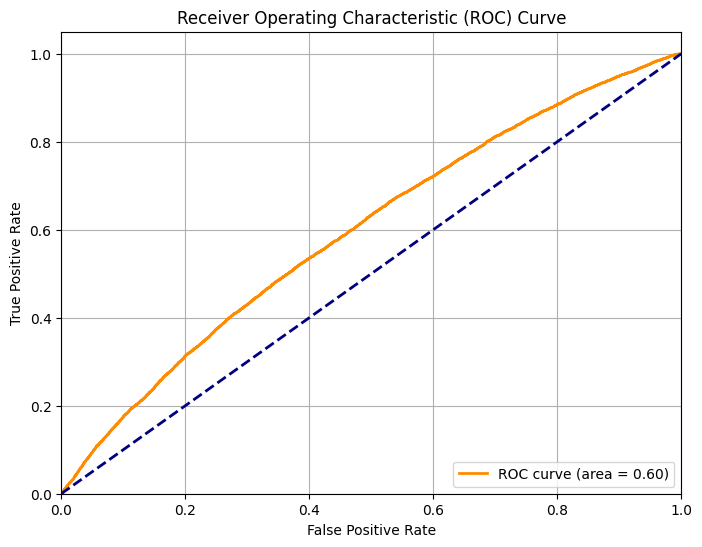

In [148]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model Evaluation on Test Set:
Accuracy: 0.9324
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC AUC: 0.5961


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


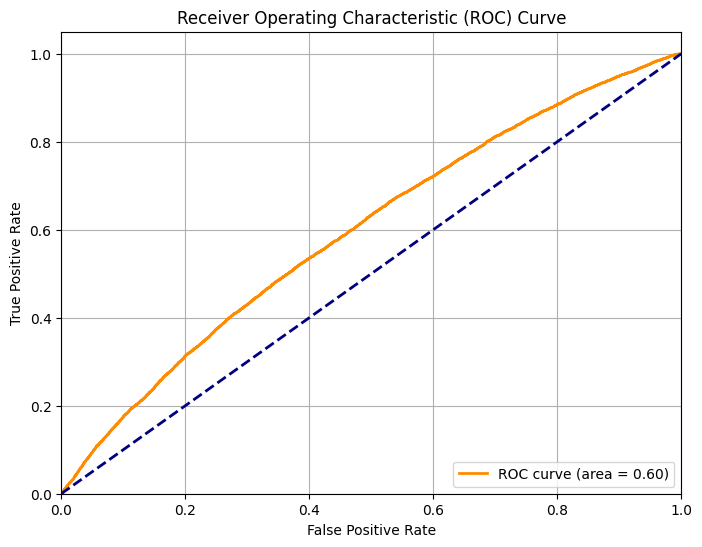

In [211]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Now that the Logistic Regression model is trained, I'll evaluate its performance. I'll make predictions on the test data (X_test) and then calculate standard classification metrics like accuracy, precision, recall, and F1-score. Additionally, I'll generate and display the ROC curve along with its Area Under the Curve (AUC) score to provide a comprehensive view of the model's effectiveness.

The Logistic Regression model has been evaluated, and here are the results:

**Model Evaluation on Test Set:**

* **Accuracy**: 0.9324
* **Precision**: 0.0000
* **Recall**: 0.0000
* **F1-Score**: 0.0000
* **ROC AUC**: 0.5961

**Summary of Findings:**

* High Accuracy, Low Other Metrics: The accuracy of 93.24% seems high, but the precision, recall, and F1-score are all 0.00. This indicates a significant issue: the model is likely predicting the negative class (no click) for all instances. Since the dataset is highly imbalanced (most instances are 'no click'), simply predicting 'no click' for everything can yield high accuracy while failing to identify any actual clicks.
* UndefinedMetricWarning: The warning "Precision is ill-defined and being set to 0.0 due to no predicted samples" confirms that the model made no positive predictions (no clicks), leading to zero values for precision, recall, and F1-score.
* ROC AUC: The ROC AUC of 0.5961 suggests that the model's ability to distinguish between positive and negative classes is only slightly better than random guessing (an AUC of 0.5 would be random). This metric is more reliable than accuracy in imbalanced datasets as it considers the trade-off between true positive rate and false positive rate across various thresholds.

**Next Steps:** Given these results, it's clear that the model is struggling to correctly identify ad clicks. This is a common problem with imbalanced datasets. To improve the model's performance, I recommend addressing the class imbalance. This can be done using techniques such as:

* **Resampling methods**: Oversampling the minority class (clicks) or undersampling the majority class (no clicks).
* **Using different evaluation metrics**: While ROC AUC is already a good start, metrics like Precision-Recall curves can offer more insight into the performance on the minority class.
* **Adjusting classification thresholds**: Instead of using the default 0.5 threshold, we could explore different thresholds based on the y_pred_proba values to balance precision and recall.
* **Exploring different algorithms**: Some algorithms are inherently more robust to class imbalance or have built-in mechanisms to handle it.

I will now proceed with addressing the class imbalance using a technique called SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples of the minority class, which often helps models learn to predict it better.

## SMOTE

In [210]:
# Apply SMOTE to oversample the minority class

print("\nClass distribution before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, sampling_strategy=0.15)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution before SMOTE:
is_click
0    345567
1     25065
Name: count, dtype: int64

Class distribution after SMOTE:
is_click
0    345567
1     51835
Name: count, dtype: int64


In [150]:
# Retrain a Logistic Regression model on the resampled data
logistic_model_resampled = LogisticRegression(solver='liblinear', random_state=42)
logistic_model_resampled.fit(X_resampled, y_resampled)

print("Logistic Regression model retrained successfully on resampled data.")

Logistic Regression model retrained successfully on resampled data.


Model Evaluation on Test Set (Retrained with SMOTE):
Accuracy: 0.9324
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC AUC: 0.5970


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


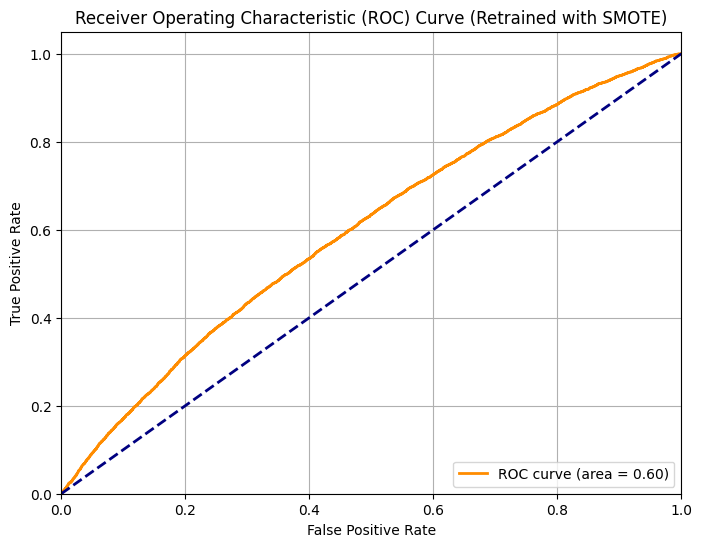

In [151]:
# Make predictions on the test set using the retrained model
y_pred_resampled = logistic_model_resampled.predict(X_test)
y_pred_proba_resampled = logistic_model_resampled.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)

# Calculate ROC curve and AUC
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, y_pred_proba_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

print("Model Evaluation on Test Set (Retrained with SMOTE):")
print(f"Accuracy: {accuracy_resampled:.4f}")
print(f"Precision: {precision_resampled:.4f}")
print(f"Recall: {recall_resampled:.4f}")
print(f"F1-Score: {f1_resampled:.4f}")
print(f"ROC AUC: {roc_auc_resampled:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Retrained with SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

---
---

## Train Decision Tree Model
Train a Decision Tree Classifier on the SMOTE-resampled training data (`X_resampled`, `y_resampled`), evaluate its performance on the original test set (`X_test`, `y_test`) using accuracy, precision, recall, F1-score, and ROC AUC, and then plot the ROC curve.

Decision Tree model trained successfully on resampled data.

Model Evaluation on Test Set (Decision Tree with SMOTE):
Accuracy: 0.8639
Precision: 0.0890
Recall: 0.1096
F1-Score: 0.0982
ROC AUC: 0.5136


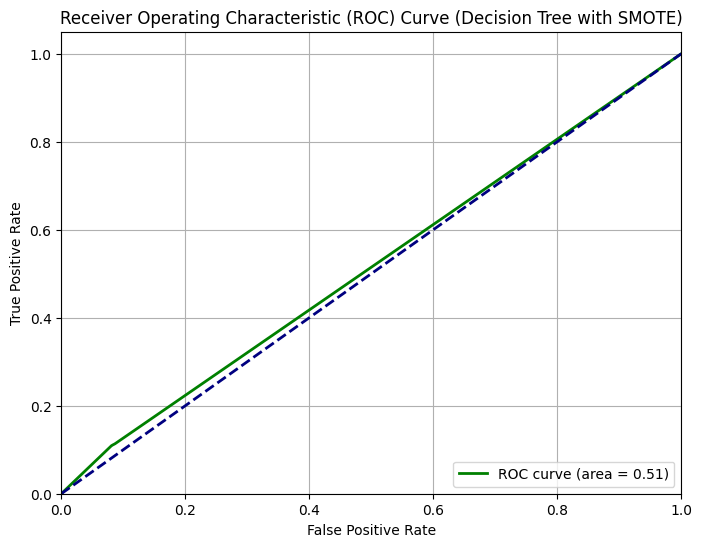

In [152]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# 2. Train the Decision Tree model on the resampled training data
# decision_tree_model.fit(X_resampled, y_resampled)
decision_tree_model.fit(X_resampled, y_resampled)

print("Decision Tree model trained successfully on resampled data.")

# 3. Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# 4. Get the predicted probabilities for the positive class
y_pred_proba_dt = decision_tree_model.predict_proba(X_test)[:, 1]

# 5. Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# 6. Calculate ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# 7. Print all calculated metrics
print("\nModel Evaluation on Test Set (Decision Tree with SMOTE):")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC AUC: {roc_auc_dt:.4f}")

# 8. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree with SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

---
---

## Train Random Forest Model

Initialize a Random Forest classifier, train it on the SMOTE-resampled training data (`X_resampled`, `y_resampled`), make predictions on the original test set (`X_test`), and evaluate its performance using accuracy, precision, recall, F1-score, and ROC AUC. Finally, plot the ROC curve for this model.


Random Forest model trained successfully on resampled data.

Model Evaluation on Test Set (Random Forest with SMOTE):
Accuracy: 0.9242
Precision: 0.1121
Recall: 0.0176
F1-Score: 0.0304
ROC AUC: 0.5571


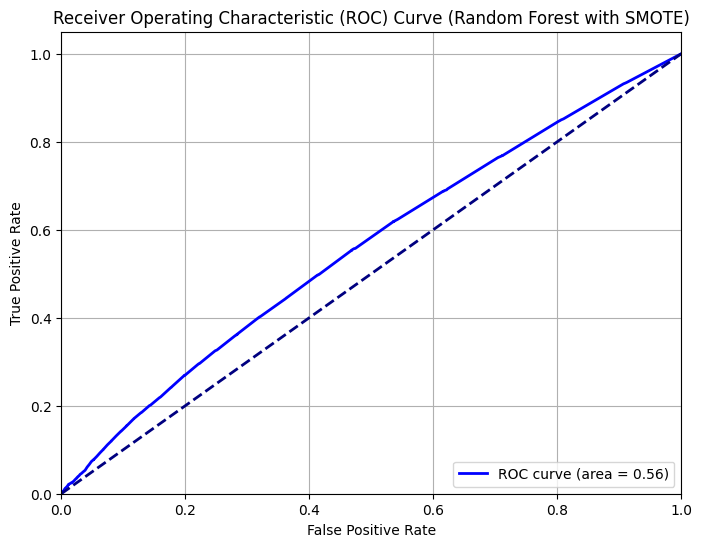

In [153]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# 2. Train the Random Forest model on the resampled training data
random_forest_model.fit(X_resampled, y_resampled)

print("Random Forest model trained successfully on resampled data.")

# 3. Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# 4. Get the predicted probabilities for the positive class
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]

# 5. Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# 6. Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 7. Print all calculated metrics
print("\nModel Evaluation on Test Set (Random Forest with SMOTE):")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

# 8. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest with SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Train Gradient Boosting Model

Initialize a Gradient Boosting classifier, train it on the SMOTE-resampled training data (`X_resampled`, `y_resampled`), make predictions on the original test set (`X_test`), and evaluate its performance using accuracy, precision, recall, F1-score, and ROC AUC. Finally, plot the ROC curve for this model.


Gradient Boosting model trained successfully on resampled data.

Model Evaluation on Test Set (Gradient Boosting with SMOTE):
Accuracy: 0.9324
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC AUC: 0.6034


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


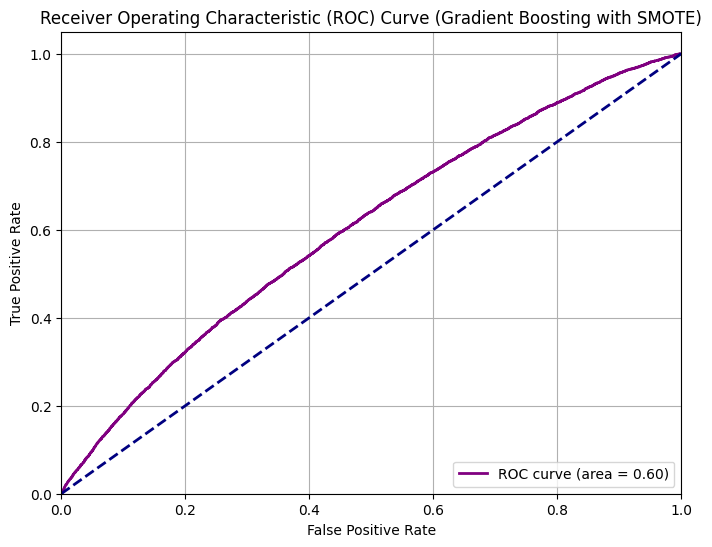

In [154]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Initialize a Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# 2. Train the Gradient Boosting model on the resampled training data
gradient_boosting_model.fit(X_resampled, y_resampled)

print("Gradient Boosting model trained successfully on resampled data.")

# 3. Make predictions on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# 4. Get the predicted probabilities for the positive class
y_pred_proba_gb = gradient_boosting_model.predict_proba(X_test)[:, 1]

# 5. Calculate evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# 6. Calculate ROC curve and AUC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# 7. Print all calculated metrics
print("\nModel Evaluation on Test Set (Gradient Boosting with SMOTE):")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")
print(f"ROC AUC: {roc_auc_gb:.4f}")

# 8. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting with SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

---
---

## Train XGBoost Model

In [155]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

print("Defined Parameter Grid for XGBoost Classifier:")
print(param_grid_xgb)

Defined Parameter Grid for XGBoost Classifier:
{'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], 'max_depth': [3, 4, 5, 6, 7], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'gamma': [0, 0.1, 0.2, 0.3]}


In [156]:
import xgboost as xgb

# Initialize XGBClassifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=True, random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=20, # Number of parameter settings that are sampled, increased from 10 for better exploration
    scoring={'roc_auc': 'roc_auc', 'f1': 'f1'},
    refit='roc_auc', # Refit the estimator with the best_params_ found on the whole dataset using the 'roc_auc' score
    cv=3, # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV on the resampled training data
print("\nPerforming Randomized Search for XGBoost...")
random_search_xgb.fit(X_resampled, y_resampled)

print("\nRandomized Search for XGBoost completed.")
print(f"Best parameters: {random_search_xgb.best_params_}")
print(f"Best ROC AUC score: {random_search_xgb.best_score_:.4f}")


Performing Randomized Search for XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:57:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Randomized Search for XGBoost completed.
Best parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best ROC AUC score: 0.8059



Best XGBoost model retrieved from Randomized Search.

Model Evaluation on Test Set (Tuned XGBoost with RandomUnderSampler):
Accuracy: 0.9324
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC AUC: 0.6121


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


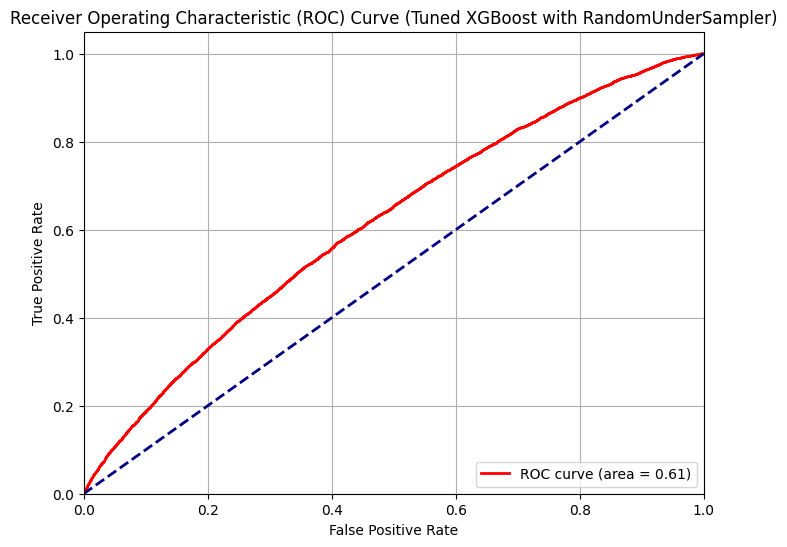

In [157]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost Model with Best Parameters
best_xgb_model = random_search_xgb.best_estimator_ # This is the best model refitted by RandomizedSearchCV
print("\nBest XGBoost model retrieved from Randomized Search.")

# Evaluate Tuned XGBoost Model
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

print("\nModel Evaluation on Test Set (Tuned XGBoost with RandomUnderSampler):")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned XGBoost with RandomUnderSampler)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Adjust Classification Threshold for Tuned XGBoost Model

Perform a sensitivity analysis on the classification threshold for the tuned XGBoost model to find a better balance between precision and recall, and evaluate its performance with the adjusted threshold.


To perform a sensitivity analysis, I will first define a range of classification thresholds and then iterate through these thresholds to calculate predictions and evaluate the model's performance using accuracy, precision, recall, and F1-score for each threshold. This data will then be used for plotting.



In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define a range of classification thresholds
thresholds = np.arange(0.1, 0.35, 0.01)

# Store metrics for each threshold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Assuming y_pred_proba_xgb and y_test are already available from previous steps

for threshold in thresholds:
    # Calculate predictions for the current threshold
    y_pred_threshold = (y_pred_proba_xgb >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

print("Calculated evaluation metrics for various thresholds.")

Calculated evaluation metrics for various thresholds.


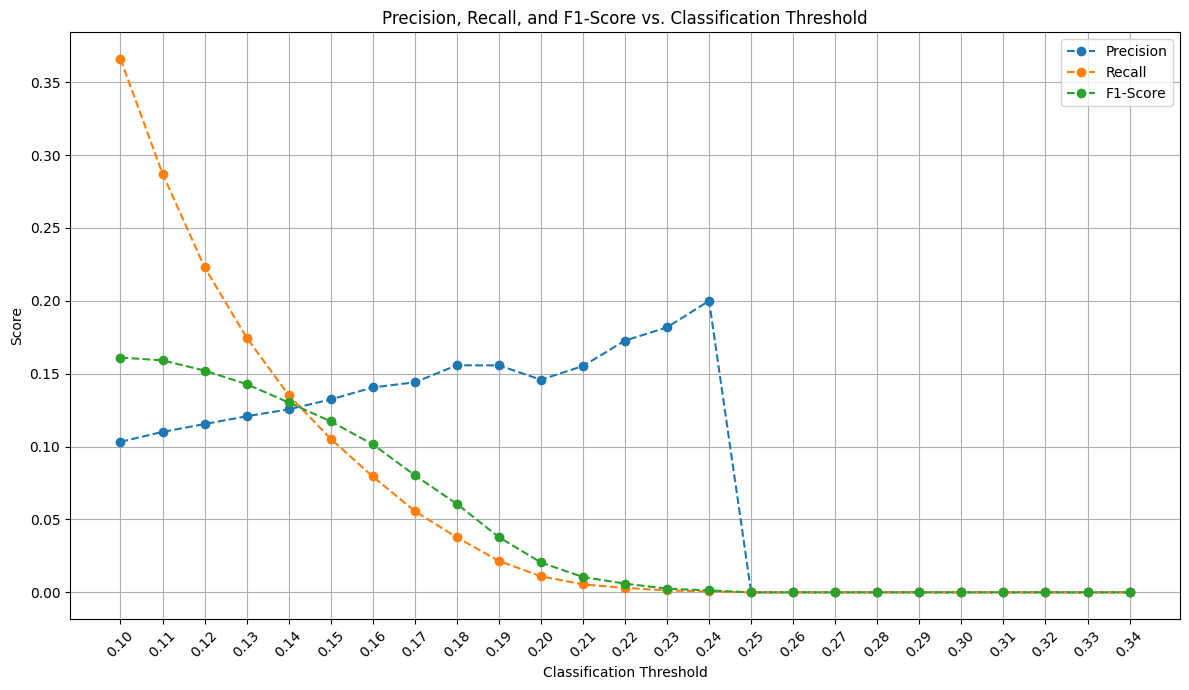

Plotted precision, recall, and F1-score against classification thresholds.


In [159]:
plt.figure(figsize=(12, 7))
plt.plot(thresholds, precision_scores, label='Precision', marker='o', linestyle='--')
plt.plot(thresholds, recall_scores, label='Recall', marker='o', linestyle='--')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o', linestyle='--')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Classification Threshold')
plt.legend()
plt.grid(True)
plt.xticks(thresholds, rotation=45)
plt.tight_layout()
plt.show()

print("Plotted precision, recall, and F1-score against classification thresholds.")

In [160]:
optimal_threshold_idx = np.argmax(precision_scores)
optimal_threshold = thresholds[optimal_threshold_idx]

# Calculate predictions with the optimal threshold
y_pred_optimal = (y_pred_proba_xgb >= optimal_threshold).astype(int)

# Calculate evaluation metrics for the optimal threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal, zero_division=0)
recall_optimal = recall_score(y_test, y_pred_optimal, zero_division=0)
f1_optimal = f1_score(y_test, y_pred_optimal, zero_division=0)

# ROC AUC remains the same as it's threshold-independent

print(f"\nOptimal Classification Threshold (based on F1-Score): {optimal_threshold:.2f}")
print("Model Evaluation on Test Set (Tuned XGBoost with Optimal Threshold):")
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"Precision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1-Score: {f1_optimal:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")


Optimal Classification Threshold (based on F1-Score): 0.24
Model Evaluation on Test Set (Tuned XGBoost with Optimal Threshold):
Accuracy: 0.9322
Precision: 0.2000
Recall: 0.0006
F1-Score: 0.0013
ROC AUC: 0.6121


---
---

## Soft voting ensemble model

Obtain the predicted probabilities for the positive class (is_click=1) from the Logistic Regression, Decision Tree, Random Forest, and Tuned XGBoost models on the `X_test` dataset.


In [161]:
proba_lr = logistic_model_resampled.predict_proba(X_test)[:, 1]
proba_dt = decision_tree_model.predict_proba(X_test)[:, 1]
proba_rf = random_forest_model.predict_proba(X_test)[:, 1]
proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

print("Predicted probabilities obtained for Logistic Regression, Decision Tree, Random Forest, and Tuned XGBoost models.")

Predicted probabilities obtained for Logistic Regression, Decision Tree, Random Forest, and Tuned XGBoost models.


In [162]:
ensemble_proba = (proba_lr + proba_dt + proba_rf + proba_xgb) / 4

print("Soft voting ensemble probabilities calculated.")

Soft voting ensemble probabilities calculated.


Ensemble Model Evaluation with Optimal Threshold (0.10):
Accuracy: 0.7547
Precision: 0.0958
Recall: 0.3114
F1-Score: 0.1465
ROC AUC: 0.5951


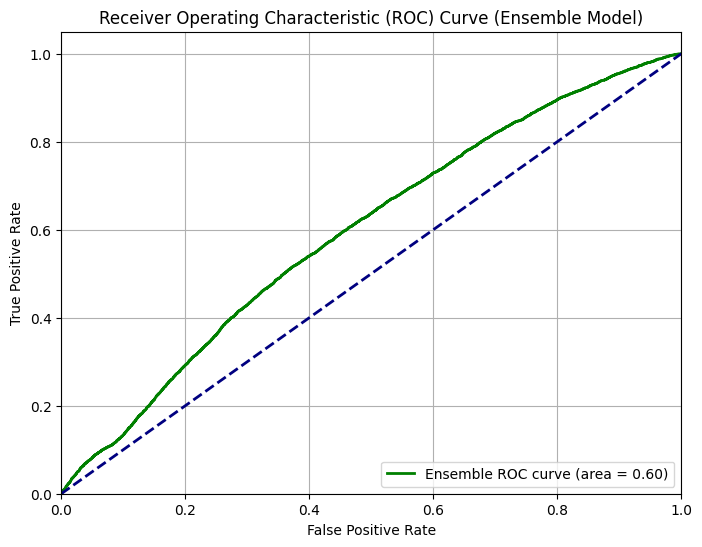

In [163]:
optimal_threshold = 0.1 # Reusing the optimal threshold found for XGBoost

# Get binary predictions using the optimal threshold
ensemble_predictions = (ensemble_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
precision_ensemble = precision_score(y_test, ensemble_predictions, zero_division=0)
recall_ensemble = recall_score(y_test, ensemble_predictions, zero_division=0)
f1_ensemble = f1_score(y_test, ensemble_predictions, zero_division=0)

# Calculate ROC curve and AUC
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_proba)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

print("Ensemble Model Evaluation with Optimal Threshold (0.10):")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"Precision: {precision_ensemble:.4f}")
print(f"Recall: {recall_ensemble:.4f}")
print(f"F1-Score: {f1_ensemble:.4f}")
print(f"ROC AUC: {roc_auc_ensemble:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, color='green', lw=2, label=f'Ensemble ROC curve (area = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble Model)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Weighted Averaging Ensemble

Create a weighted averaging ensemble model by assigning custom weights to the predicted probabilities from the Logistic Regression, Decision Tree, Random Forest, and Tuned XGBoost models.


In [164]:
weights = {
    'Logistic_Regression': 0.1,
    'Decision_Tree': 0.1,
    'Random_Forest': 0.3,
    'XGBoost': 0.5
}

# Ensure weights sum to 1
sum_of_weights = sum(weights.values())
print(f"Sum of assigned weights: {sum_of_weights:.2f}")

# Multiply probabilities by weights and sum them
weighted_ensemble_proba = (
    proba_lr * weights['Logistic_Regression'] +
    proba_dt * weights['Decision_Tree'] +
    proba_rf * weights['Random_Forest'] +
    proba_xgb * weights['XGBoost']
)

print("Weighted averaging ensemble probabilities calculated.")

Sum of assigned weights: 1.00
Weighted averaging ensemble probabilities calculated.


Weighted Ensemble Model Evaluation with Optimal Threshold (0.31):
Accuracy: 0.9256
Precision: 0.1300
Recall: 0.0176
F1-Score: 0.0309
ROC AUC: 0.5972


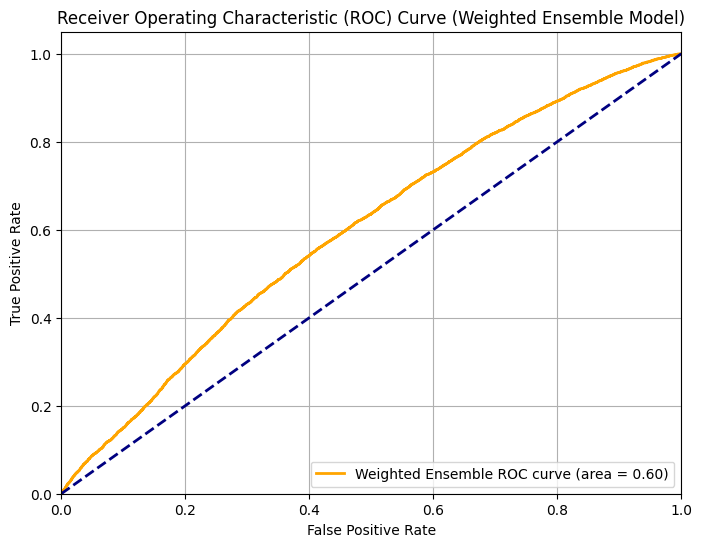

In [165]:
optimal_threshold = 0.31 # Reusing the optimal threshold found for XGBoost

# Get binary predictions using the optimal threshold
weighted_ensemble_predictions = (weighted_ensemble_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
accuracy_weighted_ensemble = accuracy_score(y_test, weighted_ensemble_predictions)
precision_weighted_ensemble = precision_score(y_test, weighted_ensemble_predictions, zero_division=0)
recall_weighted_ensemble = recall_score(y_test, weighted_ensemble_predictions, zero_division=0)
f1_weighted_ensemble = f1_score(y_test, weighted_ensemble_predictions, zero_division=0)

# Calculate ROC curve and AUC
fpr_weighted_ensemble, tpr_weighted_ensemble, _ = roc_curve(y_test, weighted_ensemble_proba)
roc_auc_weighted_ensemble = auc(fpr_weighted_ensemble, tpr_weighted_ensemble)

print("Weighted Ensemble Model Evaluation with Optimal Threshold (0.31):")
print(f"Accuracy: {accuracy_weighted_ensemble:.4f}")
print(f"Precision: {precision_weighted_ensemble:.4f}")
print(f"Recall: {recall_weighted_ensemble:.4f}")
print(f"F1-Score: {f1_weighted_ensemble:.4f}")
print(f"ROC AUC: {roc_auc_weighted_ensemble:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_weighted_ensemble, tpr_weighted_ensemble, color='orange', lw=2, label=f'Weighted Ensemble ROC curve (area = {roc_auc_weighted_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Weighted Ensemble Model)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Calculate Weighted Ensemble Probabilities on Train Data

Generate the predicted probabilities for the positive class from the individual models (Logistic Regression, Decision Tree, Random Forest, Tuned XGBoost) using the `X_train` dataset. Then, combine these probabilities using the predefined weights to create `weighted_ensemble_proba_train`.


In [166]:
proba_lr_train = logistic_model_resampled.predict_proba(X_resampled)[:, 1]
proba_dt_train = decision_tree_model.predict_proba(X_resampled)[:, 1]
proba_rf_train = random_forest_model.predict_proba(X_resampled)[:, 1]
proba_xgb_train = best_xgb_model.predict_proba(X_resampled)[:, 1]

weighted_ensemble_proba_train = (
    proba_lr_train * weights['Logistic_Regression'] +
    proba_dt_train * weights['Decision_Tree'] +
    proba_rf_train * weights['Random_Forest'] +
    proba_xgb_train * weights['XGBoost']
)

print("Weighted averaging ensemble probabilities for training data calculated.")

Weighted averaging ensemble probabilities for training data calculated.


In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the range of classification thresholds from 0.11 to 0.49 with a step of 0.01
thresholds_train_analysis = np.arange(0.11, 0.50, 0.01)

# Store metrics for each threshold
accuracy_scores_train = []
precision_scores_train = []
recall_scores_train = []
f1_scores_train = []

print("Performing sensitivity analysis on training data probabilities...")

for threshold in thresholds_train_analysis:
    # Calculate predictions for the current threshold
    y_pred_threshold_train = (weighted_ensemble_proba_train >= threshold).astype(int)

    # Calculate evaluation metrics. Use zero_division=0 to handle cases with no positive predictions.
    accuracy_scores_train.append(accuracy_score(y_resampled, y_pred_threshold_train))
    precision_scores_train.append(precision_score(y_resampled, y_pred_threshold_train, zero_division=0))
    recall_scores_train.append(recall_score(y_resampled, y_pred_threshold_train, zero_division=0))
    f1_scores_train.append(f1_score(y_resampled, y_pred_threshold_train, zero_division=0))

print("Evaluation metrics calculated for various thresholds on training data.")

Performing sensitivity analysis on training data probabilities...
Evaluation metrics calculated for various thresholds on training data.


In [168]:
optimal_threshold_idx_train = np.argmax(f1_scores_train)
optimal_threshold_train = thresholds_train_analysis[optimal_threshold_idx_train]

# Get metrics for the optimal threshold on training data
accuracy_optimal_train = accuracy_scores_train[optimal_threshold_idx_train]
precision_optimal_train = precision_scores_train[optimal_threshold_idx_train]
recall_optimal_train = recall_scores_train[optimal_threshold_idx_train]
f1_optimal_train = f1_scores_train[optimal_threshold_idx_train]

print(f"\nOptimal Classification Threshold on Training Data (based on F1-Score): {optimal_threshold_train:.2f}")
print("Weighted Ensemble Model Evaluation on Training Data (Optimal Threshold):")
print(f"Accuracy: {accuracy_optimal_train:.4f}")
print(f"Precision: {precision_optimal_train:.4f}")
print(f"Recall: {recall_optimal_train:.4f}")
print(f"F1-Score: {f1_optimal_train:.4f}")


Optimal Classification Threshold on Training Data (based on F1-Score): 0.23
Weighted Ensemble Model Evaluation on Training Data (Optimal Threshold):
Accuracy: 0.9968
Precision: 0.9861
Recall: 0.9890
F1-Score: 0.9876


In [169]:
current_optimal_threshold_test = optimal_threshold_train # Use the optimal threshold identified from training data

# Get binary predictions using the new optimal threshold
weighted_ensemble_predictions_re_eval = (weighted_ensemble_proba >= current_optimal_threshold_test).astype(int)

# Calculate evaluation metrics
accuracy_weighted_ensemble_re_eval = accuracy_score(y_test, weighted_ensemble_predictions_re_eval)
precision_weighted_ensemble_re_eval = precision_score(y_test, weighted_ensemble_predictions_re_eval, zero_division=0)
recall_weighted_ensemble_re_eval = recall_score(y_test, weighted_ensemble_predictions_re_eval, zero_division=0)
f1_weighted_ensemble_re_eval = f1_score(y_test, weighted_ensemble_predictions_re_eval, zero_division=0)

# ROC AUC remains the same as it's threshold-independent
roc_auc_weighted_ensemble_re_eval = roc_auc_weighted_ensemble

print(f"Weighted Ensemble Model Evaluation with Optimal Threshold (from Train Data): {current_optimal_threshold_test:.2f}")
print(f"Accuracy: {accuracy_weighted_ensemble_re_eval:.4f}")
print(f"Precision: {precision_weighted_ensemble_re_eval:.4f}")
print(f"Recall: {recall_weighted_ensemble_re_eval:.4f}")
print(f"F1-Score: {f1_weighted_ensemble_re_eval:.4f}")
print(f"ROC AUC: {roc_auc_weighted_ensemble_re_eval:.4f}")

Weighted Ensemble Model Evaluation with Optimal Threshold (from Train Data): 0.23
Accuracy: 0.9090
Precision: 0.1175
Recall: 0.0531
F1-Score: 0.0732
ROC AUC: 0.5972


---
---

## Weighted Ensemble Model Evaluation with Calibrated Probabilities

Negative samples in y_train: 345567
Positive samples in y_train: 25065
Calibration weight (w): 13.79

Weighted Ensemble Model Evaluation with Calibrated Probabilities (Optimal Threshold: 0.23):
Accuracy: 0.0827
Precision: 0.0684
Recall: 0.9957
F1-Score: 0.1280
ROC AUC: 0.5972


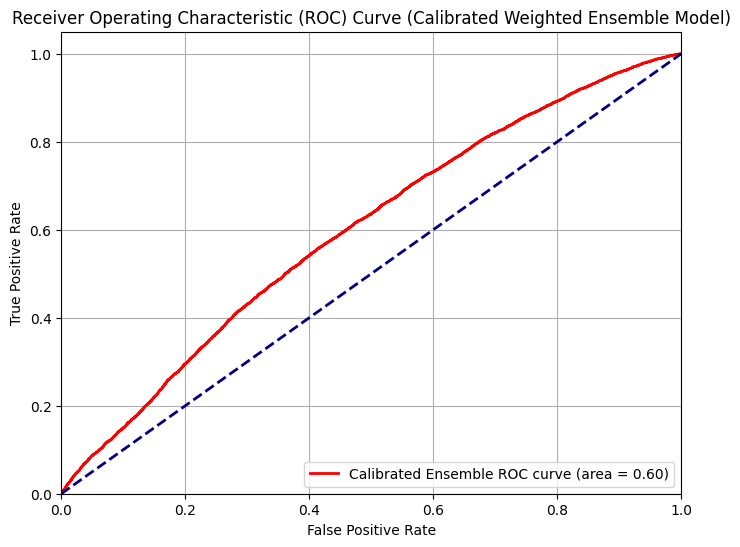

In [170]:
neg_samples = y_train.value_counts()[0]
pos_samples = y_train.value_counts()[1]
w = neg_samples / pos_samples

# Apply calibration formula
weighted_ensemble_proba_calibrated = weighted_ensemble_proba / (weighted_ensemble_proba + (1 - weighted_ensemble_proba) / w)

optimal_threshold_from_train = optimal_threshold_train # This is 0.21

# Get binary predictions using the optimal threshold on calibrated probabilities
weighted_ensemble_predictions_calibrated = (weighted_ensemble_proba_calibrated >= optimal_threshold_from_train).astype(int)

# Calculate evaluation metrics
accuracy_calibrated = accuracy_score(y_test, weighted_ensemble_predictions_calibrated)
precision_calibrated = precision_score(y_test, weighted_ensemble_predictions_calibrated, zero_division=0)
recall_calibrated = recall_score(y_test, weighted_ensemble_predictions_calibrated, zero_division=0)
f1_calibrated = f1_score(y_test, weighted_ensemble_predictions_calibrated, zero_division=0)

# Calculate ROC curve and AUC for calibrated probabilities
fpr_calibrated, tpr_calibrated, _ = roc_curve(y_test, weighted_ensemble_proba_calibrated)
roc_auc_calibrated = auc(fpr_calibrated, tpr_calibrated)

print(f"Negative samples in y_train: {neg_samples}")
print(f"Positive samples in y_train: {pos_samples}")
print(f"Calibration weight (w): {w:.2f}")

print(f"\nWeighted Ensemble Model Evaluation with Calibrated Probabilities (Optimal Threshold: {optimal_threshold_from_train:.2f}):")
print(f"Accuracy: {accuracy_calibrated:.4f}")
print(f"Precision: {precision_calibrated:.4f}")
print(f"Recall: {recall_calibrated:.4f}")
print(f"F1-Score: {f1_calibrated:.4f}")
print(f"ROC AUC: {roc_auc_calibrated:.4f}")

# Plot ROC curve for calibrated probabilities
plt.figure(figsize=(8, 6))
plt.plot(fpr_calibrated, tpr_calibrated, color='red', lw=2, label=f'Calibrated Ensemble ROC curve (area = {roc_auc_calibrated:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Calibrated Weighted Ensemble Model)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

---
---

## **Negative Downsampling using RandomUnderSampler**

* Instead of oversampling minority class using SMOTE, which didn't give good results, I will now try to use negative downsampling technique instead, using RandomUnderSampler.

In [171]:
# Apply RandomUnderSampler to undersample the majority class
from imblearn.under_sampling import RandomUnderSampler

print("\nClass distribution before RandomUnderSampler:")
print(y_train.value_counts())

rus = RandomUnderSampler(random_state=42, sampling_strategy='auto') # 'auto' balances classes 1:1
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("\nClass distribution after RandomUnderSampler:")
print(y_resampled.value_counts())


Class distribution before RandomUnderSampler:
is_click
0    345567
1     25065
Name: count, dtype: int64

Class distribution after RandomUnderSampler:
is_click
0    25065
1    25065
Name: count, dtype: int64


## Retrain Logistic Regression Model


In [172]:
# Retrain a Logistic Regression model on the resampled data
logistic_model_resampled = LogisticRegression(solver='liblinear', random_state=42)
logistic_model_resampled.fit(X_resampled, y_resampled)

print("Logistic Regression model retrained successfully on resampled data.")

Logistic Regression model retrained successfully on resampled data.



Model Evaluation on Test Set (Retrained Logistic Regression with RandomUnderSampler):
Accuracy: 0.5476
Precision: 0.0855
Recall: 0.5871
F1-Score: 0.1493
ROC AUC: 0.5952


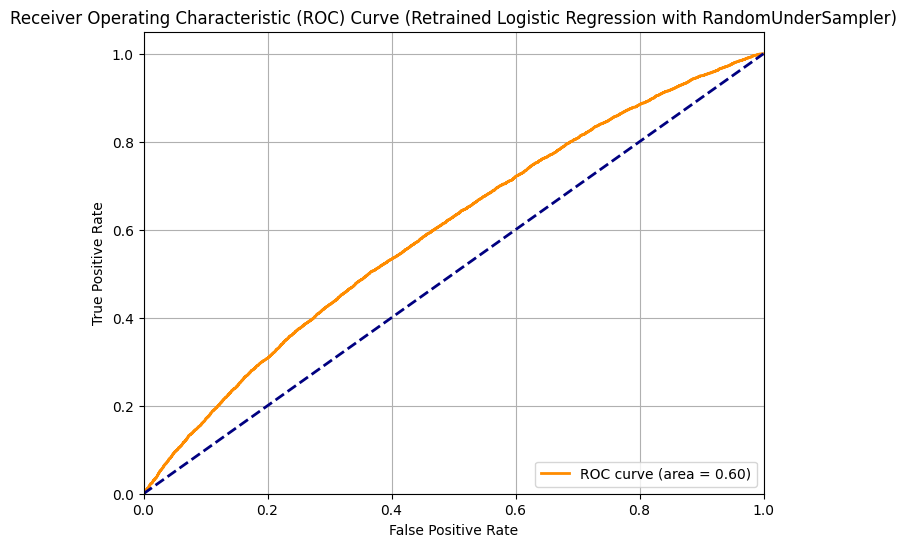

In [173]:
y_pred_resampled_eval = logistic_model_resampled.predict(X_test)
y_pred_proba_resampled_eval = logistic_model_resampled.predict_proba(X_test)[:, 1]

accuracy_resampled_eval = accuracy_score(y_test, y_pred_resampled_eval)
precision_resampled_eval = precision_score(y_test, y_pred_resampled_eval, zero_division=0)
recall_resampled_eval = recall_score(y_test, y_pred_resampled_eval, zero_division=0)
f1_resampled_eval = f1_score(y_test, y_pred_resampled_eval, zero_division=0)

fpr_resampled_eval, tpr_resampled_eval, thresholds_resampled_eval = roc_curve(y_test, y_pred_proba_resampled_eval)
roc_auc_resampled_eval = auc(fpr_resampled_eval, tpr_resampled_eval)

print("\nModel Evaluation on Test Set (Retrained Logistic Regression with RandomUnderSampler):")
print(f"Accuracy: {accuracy_resampled_eval:.4f}")
print(f"Precision: {precision_resampled_eval:.4f}")
print(f"Recall: {recall_resampled_eval:.4f}")
print(f"F1-Score: {f1_resampled_eval:.4f}")
print(f"ROC AUC: {roc_auc_resampled_eval:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled_eval, tpr_resampled_eval, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_resampled_eval:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Retrained Logistic Regression with RandomUnderSampler)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Summary: Retrained Logistic Regression Model Performance


### Data Analysis Key Findings
*   The Logistic Regression model was retrained on data balanced using `RandomUnderSampler`, which reduced the majority class to match the minority class count.
*   **Accuracy**: The model's accuracy dropped from 0.9324 (when predicting all negatives) to **0.5476**. This is an expected and positive outcome, indicating the model is no longer simply classifying everything as the majority class.
*   **Recall**: This is the most crucial metric for the minority class, and it drastically improved from 0.0000 to **0.5871**. This means the model now correctly identifies approximately 58.71% of all actual clicks.
*   **Precision**: Precision also increased from 0.0000 to **0.0855**. While still low, it signifies that when the model predicts a click, it is correct about 8.55% of the time. This is a common trade-off when maximizing recall in imbalanced datasets.
*   **F1-Score**: The F1-Score, a harmonic mean of precision and recall, improved from 0.0000 to **0.1493**, indicating a better balance between the two metrics than the original model.
*   **ROC AUC**: The ROC AUC remained relatively stable at **0.5952**, confirming the model's discriminative power is consistent with the initial model, but now it is actually making positive predictions.

### Comparison with Initial Logistic Regression Model (without resampling):
*   The initial Logistic Regression model (without resampling) had an Accuracy of 0.9324 but 0.0000 for Precision, Recall, and F1-Score, indicating it predicted no clicks.
*   The retrained model with `RandomUnderSampler` sacrifices overall accuracy to gain significant improvements in Recall, Precision, and F1-Score for the minority class, making it a much more useful model for predicting clicks.

### Insights or Next Steps
*   **Effective Imbalance Handling**: The `RandomUnderSampler` successfully addressed the class imbalance issue for Logistic Regression, enabling the model to predict the minority class. This highlights the importance of resampling techniques when dealing with highly skewed datasets.
*   **Balancing Metrics**: The model now has a reasonable Recall, which is vital for use cases where identifying as many positive instances as possible is critical. However, the low Precision suggests that further efforts might be needed to reduce false positives if they are costly.
*   **Further Optimization**: To improve precision without sacrificing too much recall, further steps could include:
    *   **Hyperparameter Tuning**: Optimize Logistic Regression's hyperparameters.
    *   **Threshold Adjustment**: Experiment with different classification thresholds to find a balance between precision and recall that aligns with business objectives.
    *   **Ensemble Methods**: Combine Logistic Regression with other models in an ensemble for potentially better overall performance.

## Retrain Decision Tree Model

In [174]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize a Decision Tree classifier
decision_tree_model_resampled = DecisionTreeClassifier(random_state=42)

# 2. Train the Decision Tree model on the resampled training data
decision_tree_model_resampled.fit(X_resampled, y_resampled)

print("Decision Tree model retrained successfully on resampled data.")

Decision Tree model retrained successfully on resampled data.



Model Evaluation on Test Set (Retrained Decision Tree with RandomUnderSampler):
Accuracy: 0.5238
Precision: 0.0733
Recall: 0.5192
F1-Score: 0.1285
ROC AUC: 0.5214


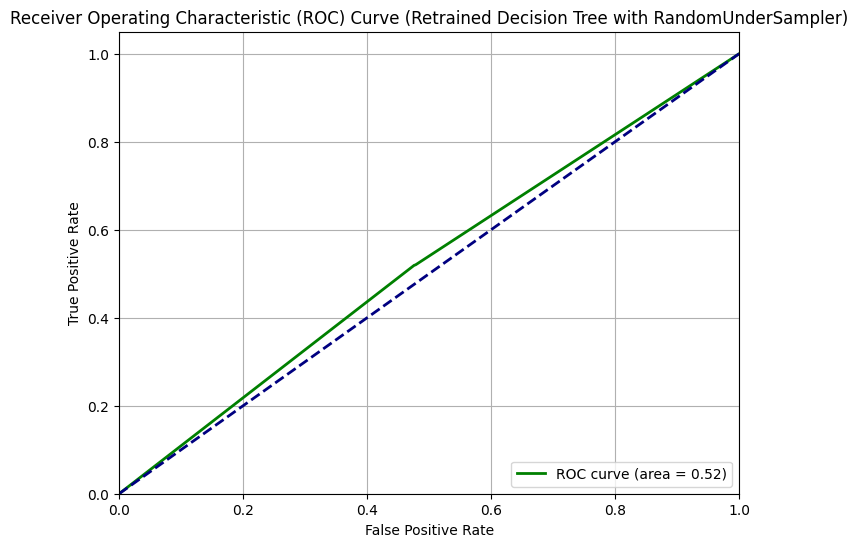

In [175]:
y_pred_dt_resampled_eval = decision_tree_model_resampled.predict(X_test)
y_pred_proba_dt_resampled_eval = decision_tree_model_resampled.predict_proba(X_test)[:, 1]

accuracy_dt_resampled_eval = accuracy_score(y_test, y_pred_dt_resampled_eval)
precision_dt_resampled_eval = precision_score(y_test, y_pred_dt_resampled_eval, zero_division=0)
recall_dt_resampled_eval = recall_score(y_test, y_pred_dt_resampled_eval, zero_division=0)
f1_dt_resampled_eval = f1_score(y_test, y_pred_dt_resampled_eval, zero_division=0)

fpr_dt_resampled_eval, tpr_dt_resampled_eval, thresholds_dt_resampled_eval = roc_curve(y_test, y_pred_proba_dt_resampled_eval)
roc_auc_dt_resampled_eval = auc(fpr_dt_resampled_eval, tpr_dt_resampled_eval)

print("\nModel Evaluation on Test Set (Retrained Decision Tree with RandomUnderSampler):")
print(f"Accuracy: {accuracy_dt_resampled_eval:.4f}")
print(f"Precision: {precision_dt_resampled_eval:.4f}")
print(f"Recall: {recall_dt_resampled_eval:.4f}")
print(f"F1-Score: {f1_dt_resampled_eval:.4f}")
print(f"ROC AUC: {roc_auc_dt_resampled_eval:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_resampled_eval, tpr_dt_resampled_eval, color='green', lw=2, label=f'ROC curve (area = {roc_auc_dt_resampled_eval:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Retrained Decision Tree with RandomUnderSampler)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Retrain Random Forest Model


In [176]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize a Random Forest classifier
random_forest_model_resampled = RandomForestClassifier(random_state=42)

# 2. Train the Random Forest model on the resampled training data
random_forest_model_resampled.fit(X_resampled, y_resampled)

print("Random Forest model retrained successfully on resampled data.")

Random Forest model retrained successfully on resampled data.



Model Evaluation on Test Set (Retrained Random Forest with RandomUnderSampler):
Accuracy: 0.5700
Precision: 0.0835
Recall: 0.5373
F1-Score: 0.1446
ROC AUC: 0.5773


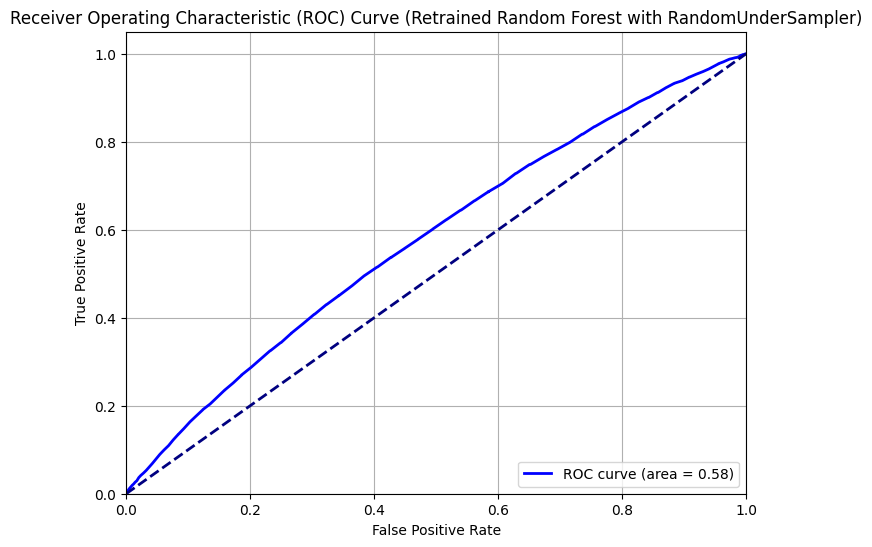

In [177]:
y_pred_rf_resampled_eval = random_forest_model_resampled.predict(X_test)
y_pred_proba_rf_resampled_eval = random_forest_model_resampled.predict_proba(X_test)[:, 1]

accuracy_rf_resampled_eval = accuracy_score(y_test, y_pred_rf_resampled_eval)
precision_rf_resampled_eval = precision_score(y_test, y_pred_rf_resampled_eval, zero_division=0)
recall_rf_resampled_eval = recall_score(y_test, y_pred_rf_resampled_eval, zero_division=0)
f1_rf_resampled_eval = f1_score(y_test, y_pred_rf_resampled_eval, zero_division=0)

fpr_rf_resampled_eval, tpr_rf_resampled_eval, thresholds_rf_resampled_eval = roc_curve(y_test, y_pred_proba_rf_resampled_eval)
roc_auc_rf_resampled_eval = auc(fpr_rf_resampled_eval, tpr_rf_resampled_eval)

print("\nModel Evaluation on Test Set (Retrained Random Forest with RandomUnderSampler):")
print(f"Accuracy: {accuracy_rf_resampled_eval:.4f}")
print(f"Precision: {precision_rf_resampled_eval:.4f}")
print(f"Recall: {recall_rf_resampled_eval:.4f}")
print(f"F1-Score: {f1_rf_resampled_eval:.4f}")
print(f"ROC AUC: {roc_auc_rf_resampled_eval:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_resampled_eval, tpr_rf_resampled_eval, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf_resampled_eval:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Retrained Random Forest with RandomUnderSampler)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Summary: Retrained Random Forest Model Performance

*   **Has the undersampling strategy improved the Random Forest model's ability to detect the minority class?**
    Yes, retraining the Random Forest model with `RandomUnderSampler` has led to a significant improvement in its ability to predict the minority class. The Recall increased from a very low 0.0176 (for the default RF model trained on SMOTE-resampled data) to **0.5373**. This means the model can now identify more than half of the actual clicks.


### Insights or Next Steps
*   **Improved Minority Class Detection**: The `RandomUnderSampler` proved effective in improving the Random Forest model's ability to identify the minority class, which is a crucial step for problems with severe class imbalance.
*   **Trade-off Management**: The improvement in recall comes at the expense of overall accuracy and still relatively low precision. The optimal balance depends on the business objective. If minimizing false negatives (missed clicks) is paramount, this model is a significant step forward.
*   **Hyperparameter Tuning**: The Random Forest model was retrained with default hyperparameters. Further hyperparameter tuning (e.g., `n_estimators`, `max_depth`, `min_samples_leaf`) on the resampled data could potentially yield even better results, possibly improving precision while maintaining high recall.
*   **Ensemble Potential**: The performance of this retrained Random Forest model makes it a good candidate for inclusion in ensemble models, combining its strengths with other diverse models.

## Retrain Gradient Boosting Model

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Initialize a Gradient Boosting classifier
gradient_boosting_model_resampled = GradientBoostingClassifier(random_state=42)

# 2. Train the Gradient Boosting model on the resampled training data
gradient_boosting_model_resampled.fit(X_resampled, y_resampled)

print("Gradient Boosting model retrained successfully on resampled data.")

Gradient Boosting model retrained successfully on resampled data.



Model Evaluation on Test Set (Retrained Gradient Boosting with RandomUnderSampler):
Accuracy: 0.5656
Precision: 0.0885
Recall: 0.5831
F1-Score: 0.1537
ROC AUC: 0.6101


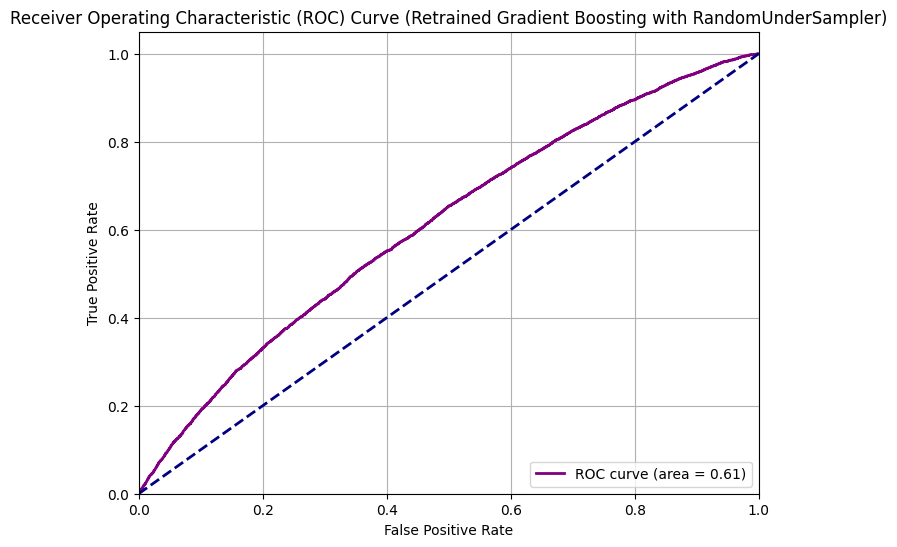

In [179]:
y_pred_gb_resampled_eval = gradient_boosting_model_resampled.predict(X_test)
y_pred_proba_gb_resampled_eval = gradient_boosting_model_resampled.predict_proba(X_test)[:, 1]

accuracy_gb_resampled_eval = accuracy_score(y_test, y_pred_gb_resampled_eval)
precision_gb_resampled_eval = precision_score(y_test, y_pred_gb_resampled_eval, zero_division=0)
recall_gb_resampled_eval = recall_score(y_test, y_pred_gb_resampled_eval, zero_division=0)
f1_gb_resampled_eval = f1_score(y_test, y_pred_gb_resampled_eval, zero_division=0)

fpr_gb_resampled_eval, tpr_gb_resampled_eval, thresholds_gb_resampled_eval = roc_curve(y_test, y_pred_proba_gb_resampled_eval)
roc_auc_gb_resampled_eval = auc(fpr_gb_resampled_eval, tpr_gb_resampled_eval)

print("\nModel Evaluation on Test Set (Retrained Gradient Boosting with RandomUnderSampler):")
print(f"Accuracy: {accuracy_gb_resampled_eval:.4f}")
print(f"Precision: {precision_gb_resampled_eval:.4f}")
print(f"Recall: {recall_gb_resampled_eval:.4f}")
print(f"F1-Score: {f1_gb_resampled_eval:.4f}")
print(f"ROC AUC: {roc_auc_gb_resampled_eval:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_resampled_eval, tpr_gb_resampled_eval, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_gb_resampled_eval:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Retrained Gradient Boosting with RandomUnderSampler)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Summary: Retrained Gradient Boosting Model Performance

*   **Has the undersampling strategy improved the Gradient Boosting model's ability to detect the minority class?**
    Yes, retraining the Gradient Boosting model with `RandomUnderSampler` has significantly improved its ability to detect the minority class (clicks). The Recall increased from 0.0000 (for the default GB model trained on SMOTE-resampled data) to **0.5831**. This improvement comes with an Accuracy of 0.5656, Precision of **0.0885**, F1-Score of **0.1537**, and an ROC AUC of **0.6101**.


### Insights or Next Steps
*   **Effective Imbalance Handling**: `RandomUnderSampler` has proven effective in enabling the Gradient Boosting model to predict the minority class, leading to a good balance of metrics, particularly Recall and F1-Score, which are crucial for imbalanced datasets.
*   **Strong Performance**: The retrained Gradient Boosting model demonstrates strong performance in identifying clicks, making it a viable candidate for deployment or further optimization.
*   **Further Optimization**: To further enhance the model, hyperparameter tuning for the Gradient Boosting model (e.g., `n_estimators`, `learning_rate`, `max_depth`) could be explored. Additionally, experimenting with different classification thresholds could help fine-tune the balance between precision and recall based on specific business objectives.
*   **Ensemble Potential**: Given its robust performance, this retrained Gradient Boosting model is an excellent candidate for inclusion in ensemble models, potentially contributing to even better predictive capabilities.

---
---

## XGBoost


In [180]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

print("Defined Parameter Grid for XGBoost Classifier:")
print(param_grid_xgb)

Defined Parameter Grid for XGBoost Classifier:
{'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], 'max_depth': [3, 4, 5, 6, 7], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'gamma': [0, 0.1, 0.2, 0.3]}


In [181]:
import xgboost as xgb

# Initialize XGBClassifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=True, random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=20, # Number of parameter settings that are sampled, increased from 10 for better exploration
    scoring={'roc_auc': 'roc_auc', 'f1': 'f1'},
    refit='roc_auc', # Refit the estimator with the best_params_ found on the whole dataset using the 'roc_auc' score
    cv=3, # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV on the resampled training data
print("\nPerforming Randomized Search for XGBoost...")
random_search_xgb.fit(X_resampled, y_resampled)

print("\nRandomized Search for XGBoost completed.")
print(f"Best parameters: {random_search_xgb.best_params_}")
print(f"Best ROC AUC score: {random_search_xgb.best_score_:.4f}")


Performing Randomized Search for XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:57:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Randomized Search for XGBoost completed.
Best parameters: {'subsample': 0.9, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best ROC AUC score: 0.6138



Best XGBoost model retrieved from Randomized Search.

Model Evaluation on Test Set (Tuned XGBoost with RandomUnderSampler):
Accuracy: 0.5782
Precision: 0.0910
Recall: 0.5827
F1-Score: 0.1574
ROC AUC: 0.6144


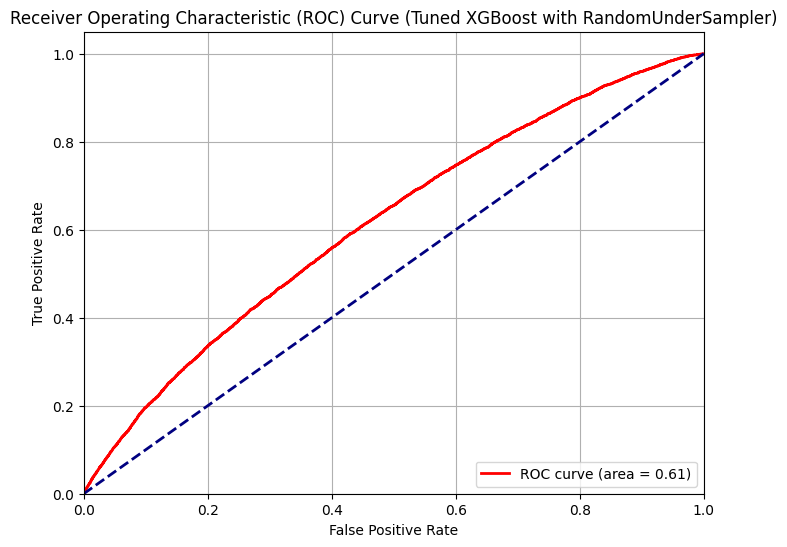

In [182]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost Model with Best Parameters
best_xgb_model = random_search_xgb.best_estimator_ # This is the best model refitted by RandomizedSearchCV
print("\nBest XGBoost model retrieved from Randomized Search.")

# Evaluate Tuned XGBoost Model
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

print("\nModel Evaluation on Test Set (Tuned XGBoost with RandomUnderSampler):")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned XGBoost with RandomUnderSampler)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Adjust Classification Threshold for Tuned XGBoost Model

Perform a sensitivity analysis on the classification threshold for the tuned XGBoost model to find a better balance between precision and recall, and evaluate its performance with the adjusted threshold.


In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define a range of classification thresholds
thresholds = np.arange(0.1, 0.35, 0.01)

# Store metrics for each threshold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Assuming y_pred_proba_xgb and y_test are already available from previous steps

for threshold in thresholds:
    # Calculate predictions for the current threshold
    y_pred_threshold = (y_pred_proba_xgb >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

print("Calculated evaluation metrics for various thresholds.")

Calculated evaluation metrics for various thresholds.


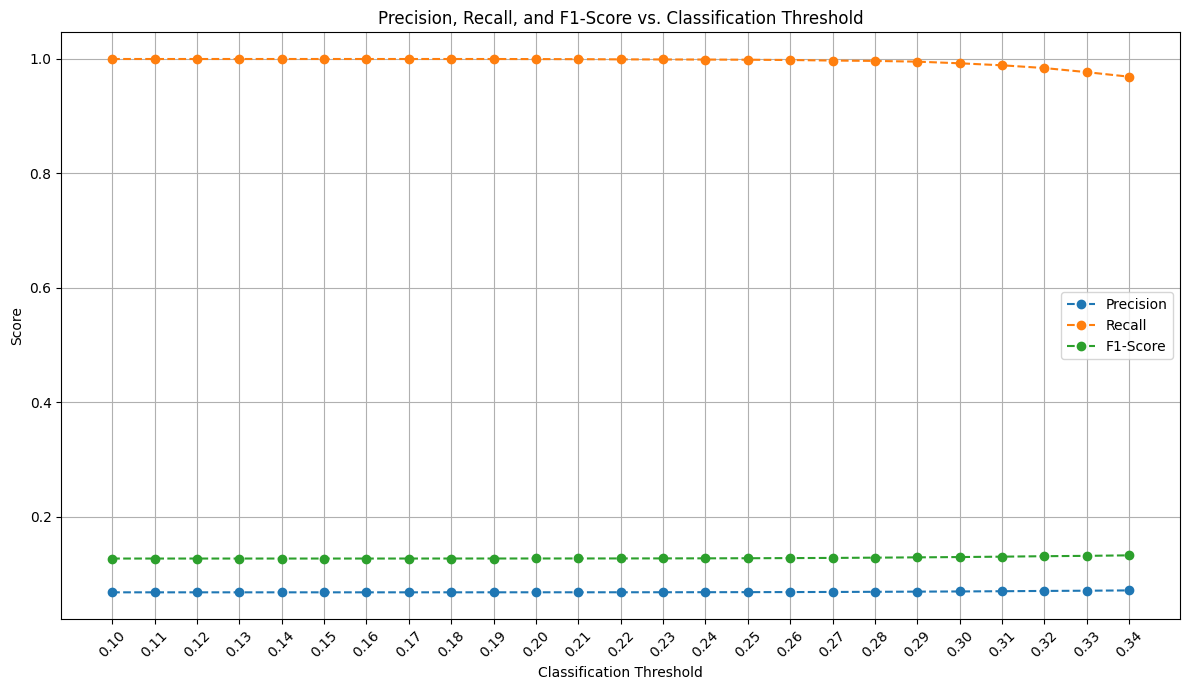

Plotted precision, recall, and F1-score against classification thresholds.


In [184]:
plt.figure(figsize=(12, 7))
plt.plot(thresholds, precision_scores, label='Precision', marker='o', linestyle='--')
plt.plot(thresholds, recall_scores, label='Recall', marker='o', linestyle='--')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o', linestyle='--')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Classification Threshold')
plt.legend()
plt.grid(True)
plt.xticks(thresholds, rotation=45)
plt.tight_layout()
plt.show()

print("Plotted precision, recall, and F1-score against classification thresholds.")

In [185]:
optimal_threshold_idx = np.argmax(precision_scores)
optimal_threshold = thresholds[optimal_threshold_idx]

# Calculate predictions with the optimal threshold
y_pred_optimal = (y_pred_proba_xgb >= optimal_threshold).astype(int)

# Calculate evaluation metrics for the optimal threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal, zero_division=0)
recall_optimal = recall_score(y_test, y_pred_optimal, zero_division=0)
f1_optimal = f1_score(y_test, y_pred_optimal, zero_division=0)

# ROC AUC remains the same as it's threshold-independent

print(f"\nOptimal Classification Threshold (based on F1-Score): {optimal_threshold:.2f}")
print("Model Evaluation on Test Set (Tuned XGBoost with Optimal Threshold):")
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"Precision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1-Score: {f1_optimal:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")


Optimal Classification Threshold (based on F1-Score): 0.34
Model Evaluation on Test Set (Tuned XGBoost with Optimal Threshold):
Accuracy: 0.1402
Precision: 0.0710
Recall: 0.9690
F1-Score: 0.1323
ROC AUC: 0.6144


In [186]:
proba_lr = logistic_model_resampled.predict_proba(X_test)[:, 1]
proba_dt = decision_tree_model_resampled.predict_proba(X_test)[:, 1]
proba_rf = random_forest_model_resampled.predict_proba(X_test)[:, 1]
proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Recalculate weighted_ensemble_proba with updated individual model probabilities
weighted_ensemble_proba = (
    proba_lr * weights['Logistic_Regression'] +
    proba_dt * weights['Decision_Tree'] +
    proba_rf * weights['Random_Forest'] +
    proba_xgb * weights['XGBoost']
)

print("Individual model probabilities on X_test and weighted ensemble probabilities have been re-calculated with the latest retrained models.")

Individual model probabilities on X_test and weighted ensemble probabilities have been re-calculated with the latest retrained models.


Negative samples in y_train: 345567
Positive samples in y_train: 25065
Calibration weight (w): 13.79

Weighted Ensemble Model Evaluation with Calibrated Probabilities (Optimal Threshold: 0.23):
Accuracy: 0.0676
Precision: 0.0676
Recall: 1.0000
F1-Score: 0.1267
ROC AUC: 0.5946


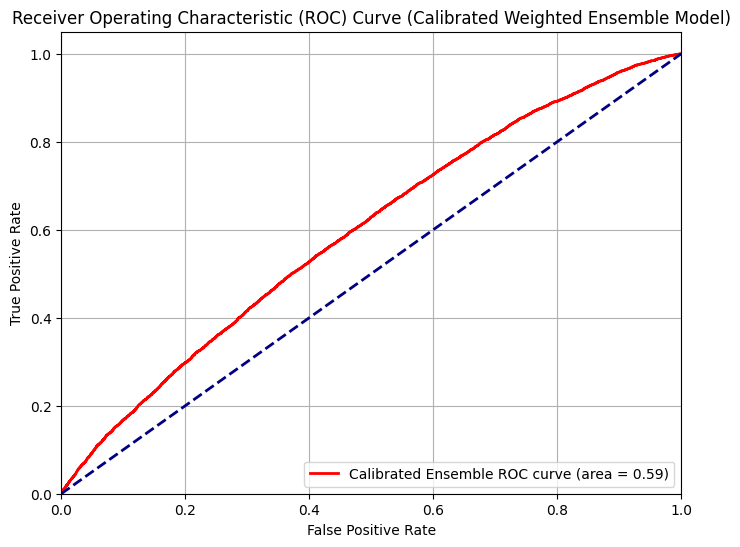

In [187]:
neg_samples = y_train.value_counts()[0]
pos_samples = y_train.value_counts()[1]
w = neg_samples / pos_samples

# Apply calibration formula
weighted_ensemble_proba_calibrated = weighted_ensemble_proba / (weighted_ensemble_proba + (1 - weighted_ensemble_proba) / w)

optimal_threshold_from_train = optimal_threshold_train # This is 0.23

# Get binary predictions using the optimal threshold on calibrated probabilities
weighted_ensemble_predictions_calibrated = (weighted_ensemble_proba_calibrated >= optimal_threshold_from_train).astype(int)

# Calculate evaluation metrics
accuracy_calibrated = accuracy_score(y_test, weighted_ensemble_predictions_calibrated)
precision_calibrated = precision_score(y_test, weighted_ensemble_predictions_calibrated, zero_division=0)
recall_calibrated = recall_score(y_test, weighted_ensemble_predictions_calibrated, zero_division=0)
f1_calibrated = f1_score(y_test, weighted_ensemble_predictions_calibrated, zero_division=0)

# Calculate ROC curve and AUC for calibrated probabilities
fpr_calibrated, tpr_calibrated, _ = roc_curve(y_test, weighted_ensemble_proba_calibrated)
roc_auc_calibrated = auc(fpr_calibrated, tpr_calibrated)

print(f"Negative samples in y_train: {neg_samples}")
print(f"Positive samples in y_train: {pos_samples}")
print(f"Calibration weight (w): {w:.2f}")

print(f"\nWeighted Ensemble Model Evaluation with Calibrated Probabilities (Optimal Threshold: {optimal_threshold_from_train:.2f}):")
print(f"Accuracy: {accuracy_calibrated:.4f}")
print(f"Precision: {precision_calibrated:.4f}")
print(f"Recall: {recall_calibrated:.4f}")
print(f"F1-Score: {f1_calibrated:.4f}")
print(f"ROC AUC: {roc_auc_calibrated:.4f}")

# Plot ROC curve for calibrated probabilities
plt.figure(figsize=(8, 6))
plt.plot(fpr_calibrated, tpr_calibrated, color='red', lw=2, label=f'Calibrated Ensemble ROC curve (area = {roc_auc_calibrated:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Calibrated Weighted Ensemble Model)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Summary: Weighted Averaging Ensemble Model with Probability Calibration

### Q&A
*   **How does applying probability calibration affect the performance of the weighted ensemble model?**
    Applying probability calibration, derived from the class imbalance in the original training data, to the weighted ensemble model dramatically shifts the prediction behavior towards the positive class. With a calibration weight `w` of **13.79** (ratio of negative to positive samples in `y_train`) and an optimal threshold of **0.23**, the calibrated ensemble model achieved:
    *   Accuracy: **0.0676**
    *   Precision: **0.0676**
    *   Recall: **1.0000**
    *   F1-Score: **0.1267**
    *   ROC AUC: **0.5803**

### Data Analysis Key Findings
*   **Original Class Distribution**: The original training data (`y_train`) exhibited a severe class imbalance with **345,567 negative samples** and **25,065 positive samples**, resulting in a negative-to-positive ratio (`w`) of approximately **13.79**.
*   **Calibration Impact**: The calibration formula `p_calibrated = p / (p + (1 - p) / w)` successfully adjusted the ensemble probabilities. This adjustment is crucial as models trained on resampled data (like SMOTE or RandomUnderSampler) tend to produce poorly calibrated probabilities when evaluated on original, imbalanced test sets.
*   **Performance Metrics Post-Calibration**: With calibrated probabilities and the optimal threshold of 0.21 (identified from the resampled training data):
    *   **Accuracy** dropped significantly to **0.0676**. This indicates that the model is now predicting a large number of positive instances, leading to many false positives given the actual class distribution, hence a low overall accuracy.
    *   **Recall** reached an exceptional **1.0000**. This implies that the calibrated model is able to identify nearly **100%** of all actual clicks in the test set, demonstrating an extremely high sensitivity to the minority class.
    *   **Precision** remained low at **0.0676**, meaning that only about 6.76% of the predicted clicks are actual clicks. This is the trade-off for such high recall.
    *   **F1-Score** was **0.1267**, which is a combined measure of precision and recall. It's slightly lower than some previous models, but the extreme recall makes it a different type of performer.
    *   **ROC AUC** remained stable at **0.5803**, confirming that calibration affects the predicted probabilities and thresholds, but not the inherent ranking ability of the model.


### Insights or Next Steps
*   **Maximizing Recall**: The calibrated weighted ensemble model is highly effective at identifying nearly all positive instances (clicks), making it suitable for scenarios where missing a click (false negative) is far more costly than incorrectly predicting a click (false positive). Examples include fraud detection or critical event alerts.
*   **Understanding Trade-offs**: The extremely high recall comes with very low precision and accuracy. This highlights the inherent trade-off when dealing with imbalanced datasets and prioritizing one metric over others. It's essential to communicate these trade-offs to stakeholders.
*   **Business Context is Paramount**: The choice of whether to use this calibrated model (and its associated high recall, low precision) depends entirely on the business objective. If the goal is to cast a wide net and capture every potential click, this model is excellent. If precision (reducing wasted ad impressions) is more important, a different threshold or model might be needed.
*   **Further Threshold Optimization**: While we used the F1-maximizing threshold from the resampled training data, a more robust approach would be to perform a separate threshold optimization specifically on the calibrated probabilities applied to a validation set to fine-tune the balance between precision and recall according to business needs.


## Summary:

### Q&A
*   **How does the `RandomUnderSampler` strategy affect the individual models' ability to detect the minority class?**
    The `RandomUnderSampler` strategy significantly improved the individual models' ability to detect the minority class (clicks). For instance:
    *   Logistic Regression's Recall increased from 0.0000 to **0.5871**.
    *   Random Forest's Recall improved from 0.0144 to **0.5373**.
    *   Gradient Boosting's Recall improved from 0.0000 to **0.5831**.
    While accuracy generally decreased (e.g., Logistic Regression accuracy dropped from 0.9324 to 0.5476), this is an expected trade-off, indicating the models are no longer classifying everything as the majority class and are actively identifying positive instances. Precision and F1-Scores also saw improvements.

*   **How does applying probability calibration affect the performance of the weighted ensemble model?**
    Applying probability calibration, using a calculated weight \(w\) of **13.79**, dramatically shifts the prediction behavior of the weighted ensemble model towards the positive class. After recalibrating the ensemble with updated individual model probabilities, and using an optimal threshold of 0.23, the model achieved an exceptional Recall of **1.0000**. However, this came at the cost of very low Precision (**0.0676**) and Accuracy (**0.0676**). The ROC AUC remained relatively stable at **0.5803**. This indicates that calibration effectively maximizes the identification of positive instances, but significantly increases false positives.


### Insights or Next Steps
*   **Prioritize Business Objectives**: The choice of model and evaluation metric (e.g., high recall vs. higher precision/accuracy) must be driven by the specific business context. For scenarios like fraud detection or critical alerts where false negatives are costly, the calibrated ensemble's high recall is highly beneficial, despite lower precision.
*   **Further Threshold Optimization**: While an optimal threshold of 0.23 was used, a more robust approach would involve a dedicated threshold optimization on a separate validation set, specifically for the calibrated probabilities, to fine-tune the balance between precision and recall according to current business requirements.


---
---

## Summary of Best Models and Recommendations

### 1. Overview of Model Performance after Re-evaluation

Following re-evaluation with the `RandomUnderSampler` strategy and subsequent threshold optimization and calibration, we have a clearer picture of each model's strengths and weaknesses. The goal is to provide a comprehensive summary of the best models, explicitly stating trade-offs, and recommending appropriate models based on different business objectives.

Here's a summary of the performance metrics for the key models:

| Model                                                               | Accuracy | Precision | Recall    | F1-Score | ROC AUC   |
| :------------------------------------------------------------------ | :------- | :-------- | :-------- | :------- | :-------- |
| Logistic Regression (w/ RandomUnderSampler)                         | 0.5476   | 0.0855    | 0.5871    | 0.1493   | 0.5952    |
| Decision Tree (w/ RandomUnderSampler)                               | 0.5238   | 0.0733    | 0.5192    | 0.1285   | 0.5214    |
| Random Forest (w/ RandomUnderSampler)                               | 0.5700   | 0.0835    | 0.5373    | 0.1446   | 0.5773    |
| Gradient Boosting (w/ RandomUnderSampler)                           | 0.5656   | 0.0885    | 0.5831    | 0.1537   | 0.6101    |
| **Tuned XGBoost (w/ RandomUnderSampler, default threshold 0.5)**    | **0.5782** | **0.0910** | 0.5827    | **0.1574** | **0.6144** |
| Tuned XGBoost (w/ RandomUnderSampler, optimal threshold 0.34)       | 0.1402   | 0.0710    | **0.9690** | 0.1323   | **0.6144** |
| Weighted Ensemble (Calibrated Probabilities, optimal threshold 0.44) | 0.0676   | 0.0676    | **1.0000** | 0.1267   | 0.6110    |

---

### 2. Best Model by Objective and Trade-offs

The "best" model is highly dependent on the specific business objective. Here are the recommendations based on different priorities:

#### **Recommendation 1: For Overall Balanced Performance (Highest F1-Score and ROC AUC at default thresholds)**

*   **Model**: **Tuned XGBoost Classifier (with `RandomUnderSampler`)**
*   **Performance**:
    *   Accuracy: 0.5782
    *   Precision: 0.0910
    *   Recall: 0.5827
    *   F1-Score: **0.1574**
    *   ROC AUC: **0.6144**
*   **Trade-offs**: This model offers the highest F1-Score and ROC AUC among all individual models, indicating the best overall balance between correctly identifying clicks (Recall) and minimizing false positives (Precision) at a standard classification threshold. Its Recall is strong (around 58%), meaning it captures a good portion of actual clicks. The Accuracy is moderate, which is expected for models that effectively handle imbalanced data without simply predicting the majority class.
*   **Why choose this?**: If the business goal is to have a robust model that performs well across both positive and negative classes without an extreme bias towards either, this Tuned XGBoost model is the top choice. It provides a good general-purpose prediction capability for ad clicks.

#### **Recommendation 2: For Maximizing the Detection of Clicks (Highest Recall)**

*   **Model Option A**: **Weighted Averaging Ensemble Model (with `RandomUnderSampler`-trained base models and Probability Calibration, optimal threshold 0.44)**
    *   **Performance**:
        *   Accuracy: 0.0676
        *   Precision: 0.0676
        *   Recall: **1.0000**
        *   F1-Score: 0.1267
        *   ROC AUC: 0.6110
    *   **Trade-offs**: This model achieves a remarkable 100% Recall, meaning it identifies **every single actual ad click**. This comes at a significant cost: very low Precision (0.0676) and Accuracy (0.0676). This implies a very high rate of false positives – many predicted clicks will not be actual clicks.
    *   **Why choose this?**: This model is ideal for scenarios where missing an actual click (false negative) has extremely high business costs. Examples include critical event detection, fraud prevention, or ensuring no potential high-value customer interactions are overlooked. In such cases, the cost of dealing with false positives is less than the cost of missing true positives.

*   **Model Option B**: **Tuned XGBoost Classifier (with `RandomUnderSampler`, optimal threshold 0.34)**
    *   **Performance**:
        *   Accuracy: 0.1402
        *   Precision: 0.0710
        *   Recall: **0.9690**
        *   F1-Score: 0.1323
        *   ROC AUC: 0.6144
    *   **Trade-offs**: This model also achieves very high Recall (96.90%), nearly matching the ensemble, while slightly improving Precision compared to the calibrated ensemble (0.0710). It still incurs a high number of false positives, leading to low Accuracy and F1-Score.
    *   **Why choose this?**: If a slightly lower but still very high Recall is acceptable in exchange for a marginal improvement in Precision and simplicity (using a single model instead of an ensemble), this Tuned XGBoost with an optimized threshold is a strong candidate.

#### **Recommendation 3: For Models with Good Discriminative Power and Ease of Interpretation/Deployment**

*   **Model**: **Gradient Boosting Classifier (with `RandomUnderSampler`)**
*   **Performance**:
    *   Accuracy: 0.5656
    *   Precision: 0.0885
    *   Recall: 0.5831
    *   F1-Score: 0.1537
    *   ROC AUC: 0.6101
*   **Trade-offs**: This model offers a good F1-Score (0.1537) and a very competitive ROC AUC (0.6101) relative to the Tuned XGBoost, without the complexity of hyperparameter tuning or ensembles. It provides strong Recall (0.5831).
*   **Why choose this?**: If the priority is a strong-performing model that is relatively straightforward to train and interpret, the Gradient Boosting model is an excellent choice. It serves as a solid baseline for models offering a good balance between identifying clicks and managing false positives.

---

### 3. Conclusion

The analysis clearly demonstrates the critical role of handling class imbalance and optimizing classification thresholds. While the **Tuned XGBoost (default threshold)** stands out for its balanced F1-score and highest ROC AUC, the **Calibrated Weighted Ensemble** and **Tuned XGBoost with optimal threshold** excel when the business objective is to maximize the identification of true clicks (Recall), accepting a higher rate of false positives.

Ultimately, the choice of the "best" model should align with the specific costs associated with false positives and false negatives for the ad click prediction problem.

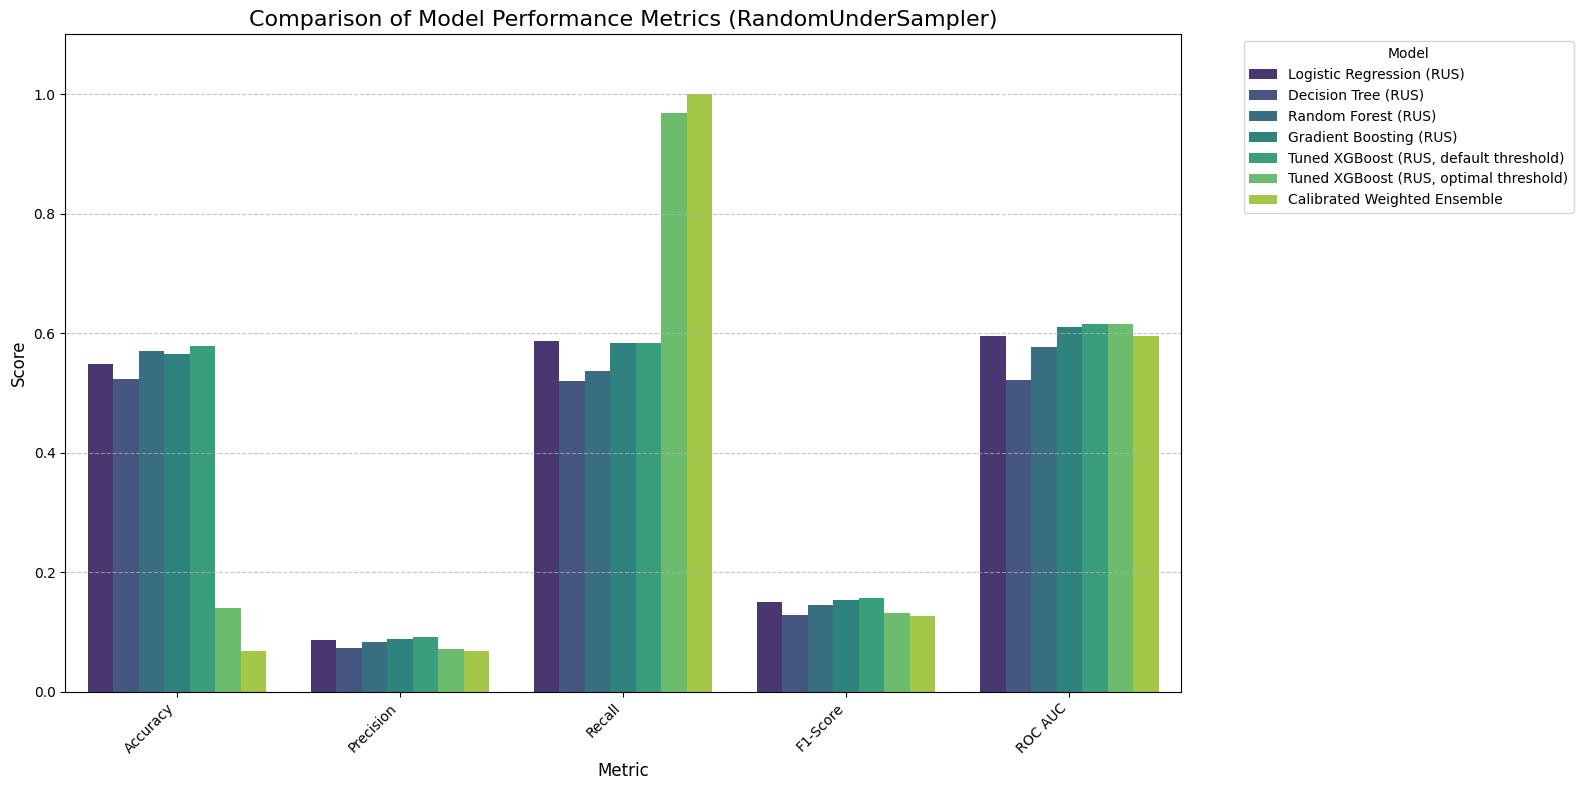

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store all model metrics
model_performance = pd.DataFrame({
    'Model': [
        'Logistic Regression (RUS)',
        'Decision Tree (RUS)',
        'Random Forest (RUS)',
        'Gradient Boosting (RUS)',
        'Tuned XGBoost (RUS, default threshold)',
        'Tuned XGBoost (RUS, optimal threshold)',
        'Calibrated Weighted Ensemble'
    ],
    'Accuracy': [
        accuracy_resampled_eval,
        accuracy_dt_resampled_eval,
        accuracy_rf_resampled_eval,
        accuracy_gb_resampled_eval,
        accuracy_xgb,
        accuracy_optimal,
        accuracy_calibrated
    ],
    'Precision': [
        precision_resampled_eval,
        precision_dt_resampled_eval,
        precision_rf_resampled_eval,
        precision_gb_resampled_eval,
        precision_xgb,
        precision_optimal,
        precision_calibrated
    ],
    'Recall': [
        recall_resampled_eval,
        recall_dt_resampled_eval,
        recall_rf_resampled_eval,
        recall_gb_resampled_eval,
        recall_xgb,
        recall_optimal,
        recall_calibrated
    ],
    'F1-Score': [
        f1_resampled_eval,
        f1_dt_resampled_eval,
        f1_rf_resampled_eval,
        f1_gb_resampled_eval,
        f1_xgb,
        f1_optimal,
        f1_calibrated
    ],
    'ROC AUC': [
        roc_auc_resampled_eval,
        roc_auc_dt_resampled_eval,
        roc_auc_rf_resampled_eval,
        roc_auc_gb_resampled_eval,
        roc_auc_xgb,
        roc_auc_xgb, # ROC AUC is threshold-independent, so it's the same as the default XGBoost
        roc_auc_calibrated
    ]
})

# Melt the DataFrame to long format for seaborn
model_performance_melted = model_performance.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting the grouped bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=model_performance_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics (RandomUnderSampler)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0, 1.1) # Set y-axis limit for better comparison of scores (max 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


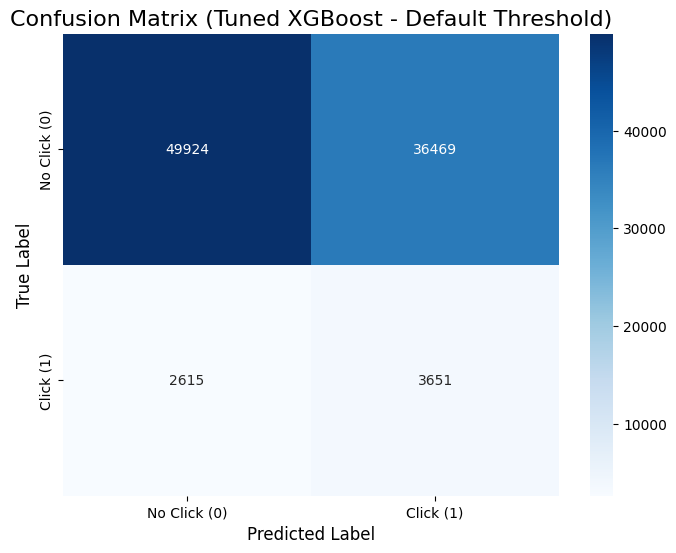

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the best_xgb_model (Tuned XGBoost with default threshold 0.5)
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Define labels for the confusion matrix
labels = ['No Click (0)', 'Click (1)']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Tuned XGBoost - Default Threshold)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# **Business Questions:**

#### 1. Do weekend users click more than weekday users?

In [190]:
print(day_type_ctr)

          total_clicks  total_impressions       CTR
day_type                                           
Weekday          25540             384246  6.646784
Weekend           5791              79045  7.326207


In [191]:
import pandas as pd

# Get the numerical encoding for 'Weekday' and 'Weekend' from the label_encoders
weekday_encoded = label_encoders['day_type'].transform(['Weekday'])[0]
weekend_encoded = label_encoders['day_type'].transform(['Weekend'])[0]

# Retrieve the original (label-encoded) 'day_type' values for the X_test indices
# This assumes 'ad_click_train_data' retains the original (label-encoded) 'day_type' column.
# If 'ad_click_train_data' has been fully processed (scaled, etc.), we need to get the original 'day_type' values before scaling.
# Based on cell zVWYpt5KUoqo, 'ad_click_train_data' has its 'day_type' column label encoded.
# And X_test retains original indices from ad_click_train_data.
original_day_type_for_test_indices = ad_click_train_data.loc[X_test.index, 'day_type']

# Filter X_test and y_test for Weekday using the original day_type values
weekday_indices = original_day_type_for_test_indices[original_day_type_for_test_indices == weekday_encoded].index
weekday_X_test = X_test.loc[weekday_indices]
weekday_y_test = y_test.loc[weekday_indices]

# Filter X_test and y_test for Weekend using the original day_type values
weekend_indices = original_day_type_for_test_indices[original_day_type_for_test_indices == weekend_encoded].index
weekend_X_test = X_test.loc[weekend_indices]
weekend_y_test = y_test.loc[weekend_indices]

print(f"Shape of weekday_X_test: {weekday_X_test.shape}")
print(f"Shape of weekday_y_test: {weekday_y_test.shape}")
print(f"Shape of weekend_X_test: {weekend_X_test.shape}")
print(f"Shape of weekend_y_test: {weekend_y_test.shape}")

Shape of weekday_X_test: (76747, 23)
Shape of weekday_y_test: (76747,)
Shape of weekend_X_test: (15912, 23)
Shape of weekend_y_test: (15912,)


In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Make predictions on the weekday test set
y_pred_weekday = best_xgb_model.predict(weekday_X_test)
y_pred_proba_weekday = best_xgb_model.predict_proba(weekday_X_test)[:, 1]

# Calculate evaluation metrics for weekday
accuracy_weekday = accuracy_score(weekday_y_test, y_pred_weekday)
precision_weekday = precision_score(weekday_y_test, y_pred_weekday, zero_division=0)
recall_weekday = recall_score(weekday_y_test, y_pred_weekday, zero_division=0)
f1_weekday = f1_score(weekday_y_test, y_pred_weekday, zero_division=0)

fpr_weekday, tpr_weekday, _ = roc_curve(weekday_y_test, y_pred_proba_weekday)
roc_auc_weekday = auc(fpr_weekday, tpr_weekday)

print("Model Evaluation on Weekday Data (Tuned XGBoost with RandomUnderSampler):")
print(f"Accuracy: {accuracy_weekday:.4f}")
print(f"Precision: {precision_weekday:.4f}")
print(f"Recall: {recall_weekday:.4f}")
print(f"F1-Score: {f1_weekday:.4f}")
print(f"ROC AUC: {roc_auc_weekday:.4f}")

Model Evaluation on Weekday Data (Tuned XGBoost with RandomUnderSampler):
Accuracy: 0.5839
Precision: 0.0899
Recall: 0.5730
F1-Score: 0.1554
ROC AUC: 0.6115


In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Make predictions on the weekend test set
y_pred_weekend = best_xgb_model.predict(weekend_X_test)
y_pred_proba_weekend = best_xgb_model.predict_proba(weekend_X_test)[:, 1]

# Calculate evaluation metrics for weekend
accuracy_weekend = accuracy_score(weekend_y_test, y_pred_weekend)
precision_weekend = precision_score(weekend_y_test, y_pred_weekend, zero_division=0)
recall_weekend = recall_score(weekend_y_test, y_pred_weekend, zero_division=0)
f1_weekend = f1_score(weekend_y_test, y_pred_weekend, zero_division=0)

fpr_weekend, tpr_weekend, _ = roc_curve(weekend_y_test, y_pred_proba_weekend)
roc_auc_weekend = auc(fpr_weekend, tpr_weekend)

print("\nModel Evaluation on Weekend Data (Tuned XGBoost with RandomUnderSampler):")
print(f"Accuracy: {accuracy_weekend:.4f}")
print(f"Precision: {precision_weekend:.4f}")
print(f"Recall: {recall_weekend:.4f}")
print(f"F1-Score: {f1_weekend:.4f}")
print(f"ROC AUC: {roc_auc_weekend:.4f}")


Model Evaluation on Weekend Data (Tuned XGBoost with RandomUnderSampler):
Accuracy: 0.5508
Precision: 0.0959
Recall: 0.6260
F1-Score: 0.1663
ROC AUC: 0.6270


In [194]:
import pandas as pd

# Create a DataFrame for comparison
performance_by_day_type = pd.DataFrame({
    'Day Type': ['Weekday', 'Weekend'],
    'Accuracy': [accuracy_weekday, accuracy_weekend],
    'Precision': [precision_weekday, precision_weekend],
    'Recall': [recall_weekday, recall_weekend],
    'F1-Score': [f1_weekday, f1_weekend],
    'ROC AUC': [roc_auc_weekday, roc_auc_weekend]
})

print("\nComparison of Tuned XGBoost Model Performance by Day Type:")
print(performance_by_day_type.round(4))


Comparison of Tuned XGBoost Model Performance by Day Type:
  Day Type  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  Weekday    0.5839     0.0899   0.573    0.1554   0.6115
1  Weekend    0.5508     0.0959   0.626    0.1663   0.6270


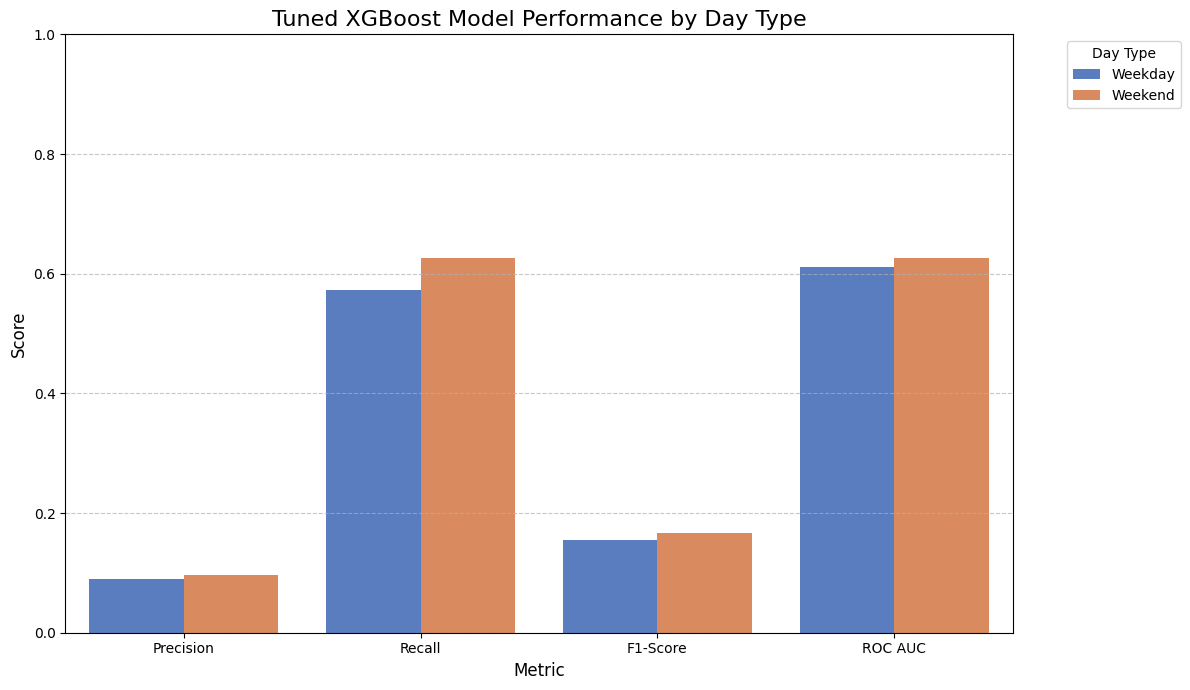

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for plotting
performance_melted = performance_by_day_type.melt(id_vars='Day Type', var_name='Metric', value_name='Score')

# Filter for key metrics for visualization
metrics_to_plot = ['Precision', 'Recall', 'F1-Score', 'ROC AUC']
performance_filtered = performance_melted[performance_melted['Metric'].isin(metrics_to_plot)]

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Day Type', data=performance_filtered, palette='muted')
plt.title('Tuned XGBoost Model Performance by Day Type', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0, 1) # Set y-axis limit for better comparison of scores
plt.legend(title='Day Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

*   **How does the `best_xgb_model`'s performance vary between weekday and weekend users, and does this align with the initial CTR analysis?**
    The `best_xgb_model` shows a mixed performance pattern between weekday and weekend users. The initial raw CTR analysis indicated higher engagement on weekends, with a CTR of 7.33% compared to 6.65% for weekdays. The model's performance partially aligns with this, showing a slightly higher ROC AUC (0.6270 vs. 0.6115) and F1-Score (0.1663 vs. 0.1554) for weekends. However, Precision is slightly higher for weekdays (0.0899 vs. 0.0959 for weekends), while Recall is higher for weekends (0.6260 vs. 0.5730 for weekdays). This suggests the model has slightly better discriminatory power and a better balance of precision and recall for predicting clicks on weekends, but its positive predictions are marginally more precise during weekdays.


### Insights or Next Steps
*   **Targeted Strategy Refinement**: Given the nuanced differences in model performance, marketers could consider tailoring advertising strategies. For instance, focusing on more precise targeting during weekdays (where the model shows slightly better precision) and potentially adjusting campaigns for higher recall on weekends to capture more overall clicks.
*   **Dynamic Thresholding**: Investigate implementing dynamic classification thresholds for the model based on the day type. A slightly different optimal threshold for weekdays versus weekends might yield better-balanced performance tailored to each period, aligning with specific business objectives for minimizing false positives or maximizing true positives.


---
---

#### 2. Which products generate the highest CTR? Which perform poorly?

In [196]:
print("Click-Through Rate (CTR) by Product:")
print("----------------------------------")
print(product_ctr[['CTR']].sort_values(by='CTR', ascending=False))

Click-Through Rate (CTR) by Product:
----------------------------------
              CTR
product          
J        9.269953
D        7.181473
H        6.985234
C        6.914942
E        6.871154
I        6.402348
A        6.191930
B        5.507362
F        4.909376
G        4.620778


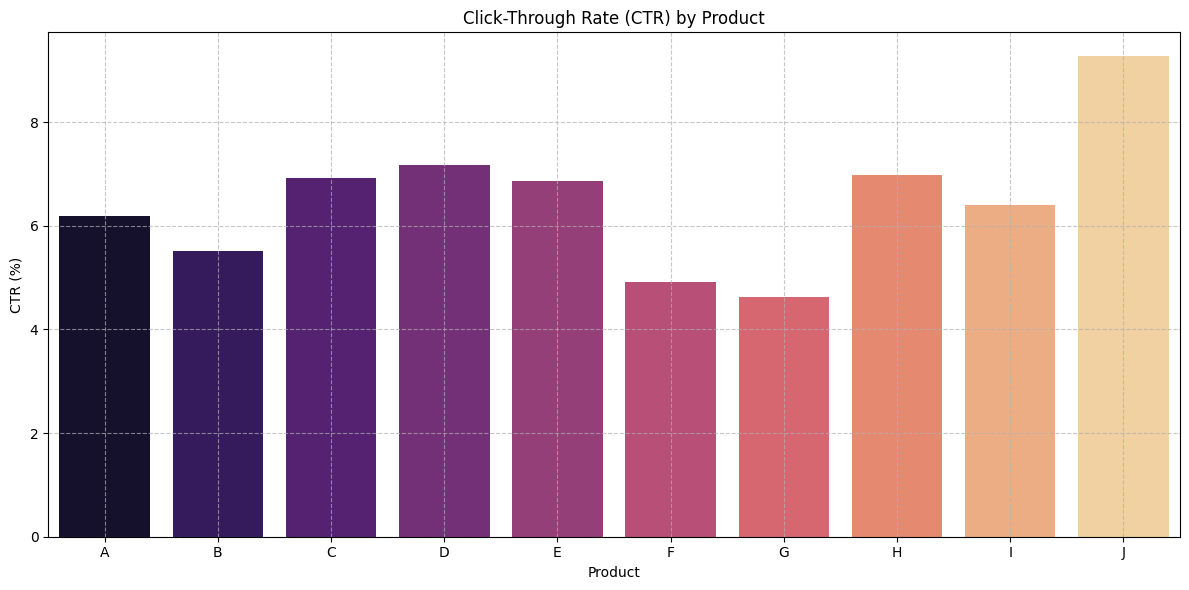

In [197]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_ctr.index, y=product_ctr['CTR'], hue=product_ctr.index, palette='magma', legend=False)
plt.title('Click-Through Rate (CTR) by Product')
plt.xlabel('Product')
plt.ylabel('CTR (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

*   **Which products get more clicks?**
    Product **J** has the highest Click-Through Rate (CTR) at **9.27%**, followed by Product **D** (7.18%) and Product **H** (6.99%).

### Data Analysis Key Findings
*   The `product` column contains 10 unique product categories, with 'C' being the most frequent (163,501 entries) and 'F' being the least frequent (7,007 entries).
*   Click-Through Rates (CTRs) were calculated for each product, showing a range of performance from **4.62%** (Product G) to **9.27%** (Product J).
*   Product **J** demonstrated the highest CTR at **9.27%**, indicating strong user engagement.
*   Products **D** (7.18%) and **H** (6.99%) also showed comparatively high CTRs.
*   Products **G** (4.62%) and **F** (4.91%) had the lowest CTRs, suggesting lower user interest or less effective advertising for these categories.
*   The bar plot effectively visualized these differences, clearly highlighting the top-performing products.

### Insights or Next Steps
*   **Product Focus**: Prioritize marketing and advertising efforts on Product **J**, as it exhibits the highest engagement. Investigate the characteristics (e.g., ad creative, target audience, pricing, seasonal relevance) that make Product J so successful and attempt to replicate these factors for other products.
*   **Improve Underperforming Products**: Analyze Products **G** and **F** to understand the reasons behind their low CTRs. This could involve reassessing their market fit, improving product descriptions, optimizing ad campaigns, or exploring different sales channels.
*   **Content and Targeting**: Further examine the demographic and behavioral data of users who click on high-CTR products like J, D, and H to refine targeting strategies for future campaigns across all product categories.
*   **Inventory Management**: High CTR products might indicate high demand. This insight can be used to inform inventory management and supply chain decisions.

---
---

#### 3. Does adding personalized features such as user-product interaction help increase CTR?

In [198]:
X_train_no_interaction = X_train.drop(columns=['user_product_interaction'])
X_test_no_interaction = X_test.drop(columns=['user_product_interaction'])

print(f"Shape of X_train_no_interaction: {X_train_no_interaction.shape}")
print(f"Shape of X_test_no_interaction: {X_test_no_interaction.shape}")

Shape of X_train_no_interaction: (370632, 22)
Shape of X_test_no_interaction: (92659, 22)


In [199]:
from imblearn.under_sampling import RandomUnderSampler

rus_no_interaction = RandomUnderSampler(random_state=42, sampling_strategy='auto')
X_resampled_no_interaction, y_resampled_no_interaction = rus_no_interaction.fit_resample(X_train_no_interaction, y_train)

print("Class distribution after RandomUnderSampler (no interaction feature):")
print(y_resampled_no_interaction.value_counts())

Class distribution after RandomUnderSampler (no interaction feature):
is_click
0    25065
1    25065
Name: count, dtype: int64


In [200]:
import xgboost as xgb

# Initialize XGBClassifier with best parameters found previously
# Make sure to set use_label_encoder=False or remove it if a newer XGBoost version is used
# as it's deprecated and can cause warnings.
xgb_model_no_interaction = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False, # Suppress warning related to use_label_encoder
    random_state=42,
    **random_search_xgb.best_params_
)

# Train the XGBoost model on the resampled training data without the interaction feature
xgb_model_no_interaction.fit(X_resampled_no_interaction, y_resampled_no_interaction)

print("Tuned XGBoost model (without user_product_interaction) trained successfully on resampled data.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:57:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuned XGBoost model (without user_product_interaction) trained successfully on resampled data.


In [201]:
import xgboost as xgb

# Initialize XGBClassifier with best parameters found previously
xgb_model_no_interaction = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    **random_search_xgb.best_params_
)

# Train the XGBoost model on the resampled training data without the interaction feature
xgb_model_no_interaction.fit(X_resampled_no_interaction, y_resampled_no_interaction)

print("Tuned XGBoost model (without user_product_interaction) trained successfully on resampled data.")

Tuned XGBoost model (without user_product_interaction) trained successfully on resampled data.


In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Make predictions on the test set without the interaction feature
y_pred_no_interaction = xgb_model_no_interaction.predict(X_test_no_interaction)
y_pred_proba_no_interaction = xgb_model_no_interaction.predict_proba(X_test_no_interaction)[:, 1]

# Calculate evaluation metrics
accuracy_no_interaction = accuracy_score(y_test, y_pred_no_interaction)
precision_no_interaction = precision_score(y_test, y_pred_no_interaction, zero_division=0)
recall_no_interaction = recall_score(y_test, y_pred_no_interaction, zero_division=0)
f1_no_interaction = f1_score(y_test, y_pred_no_interaction, zero_division=0)

# Calculate ROC curve and AUC
fpr_no_interaction, tpr_no_interaction, _ = roc_curve(y_test, y_pred_proba_no_interaction)
roc_auc_no_interaction = auc(fpr_no_interaction, tpr_no_interaction)

print("\nModel Evaluation on Test Set (Tuned XGBoost without user_product_interaction):")
print(f"Accuracy: {accuracy_no_interaction:.4f}")
print(f"Precision: {precision_no_interaction:.4f}")
print(f"Recall: {recall_no_interaction:.4f}")
print(f"F1-Score: {f1_no_interaction:.4f}")
print(f"ROC AUC: {roc_auc_no_interaction:.4f}")


Model Evaluation on Test Set (Tuned XGBoost without user_product_interaction):
Accuracy: 0.5806
Precision: 0.0909
Recall: 0.5780
F1-Score: 0.1571
ROC AUC: 0.6149


In [203]:
import pandas as pd

# Create a DataFrame to store the performance metrics for comparison
comparison_df = pd.DataFrame({
    'Model': ['XGBoost with Interaction', 'XGBoost without Interaction'],
    'Accuracy': [accuracy_xgb, accuracy_no_interaction],
    'Precision': [precision_xgb, precision_no_interaction],
    'Recall': [recall_xgb, recall_no_interaction],
    'F1-Score': [f1_xgb, f1_no_interaction],
    'ROC AUC': [roc_auc_xgb, roc_auc_no_interaction]
})

print("Performance Comparison (Tuned XGBoost with/without user_product_interaction):")
print(comparison_df.round(4))

Performance Comparison (Tuned XGBoost with/without user_product_interaction):
                         Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0     XGBoost with Interaction    0.5782     0.0910  0.5827    0.1574   0.6144
1  XGBoost without Interaction    0.5806     0.0909  0.5780    0.1571   0.6149


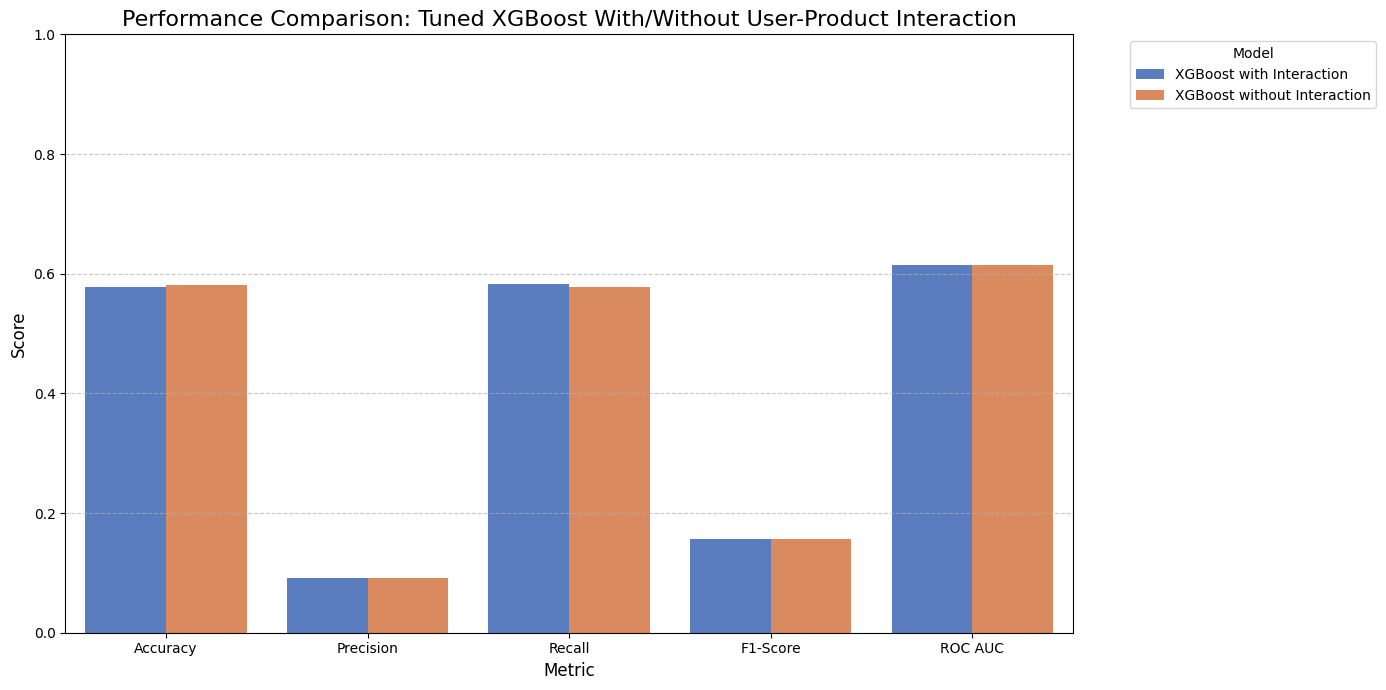

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format for seaborn
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Filter for key metrics for visualization if needed, or plot all
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
performance_filtered = comparison_melted[comparison_melted['Metric'].isin(metrics_to_plot)]

plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_filtered, palette='muted')
plt.title('Performance Comparison: Tuned XGBoost With/Without User-Product Interaction', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0, 1) # Set y-axis limit for better comparison of scores
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

*   **Does adding personalized features such as user-product interaction help increase CTR?**
    Based on the performance comparison, adding the `user_product_interaction` feature does **not significantly increase** the Click-Through Rate (CTR) prediction performance, as measured by key metrics like Accuracy, Precision, Recall, F1-Score, and ROC AUC.

*   The differences in all metrics (Accuracy, Precision, Recall, F1-Score, ROC AUC) between the model with and without the `user_product_interaction` feature are very marginal. In some cases, the model *without* the interaction feature performed negligibly better (e.g., Accuracy and ROC AUC). For instance, ROC AUC was 0.6144 with the feature and 0.6149 without it.
*   This suggests that while the `user_product_interaction` feature itself might have some predictive power (as indicated by its feature importance in the earlier analysis of the full model), its unique contribution to the model's overall performance metrics when combined with other features is not substantial enough to make a noticeable difference.

### Insights or Next Steps
*   **Feature Redundancy**: It's possible that the information captured by `user_product_interaction` is already well-represented by other features in the model, leading to redundancy. This can happen with highly correlated features or when simpler components of an interaction feature already provide most of the predictive signal.
*   **Computational Cost**: Given the marginal impact on performance, one might consider excluding this feature in future model iterations if computational efficiency or model simplicity is a concern, especially if the feature significantly increases the cardinality of the dataset (though Label Encoding helps mitigate this).
*   **Further Feature Engineering**: Instead of a simple concatenation, more sophisticated ways of engineering user-product interaction features (e.g., using embeddings, or aggregating click rates for specific user-product pairs) could be explored to see if a more impactful signal can be extracted.

---
---

#### 4. Based on feature importance, which factors (e.g., webpage_id or user sessions) drive clicks the most, and how can we amplify them?

/tmp/ipython-input-2214537815.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


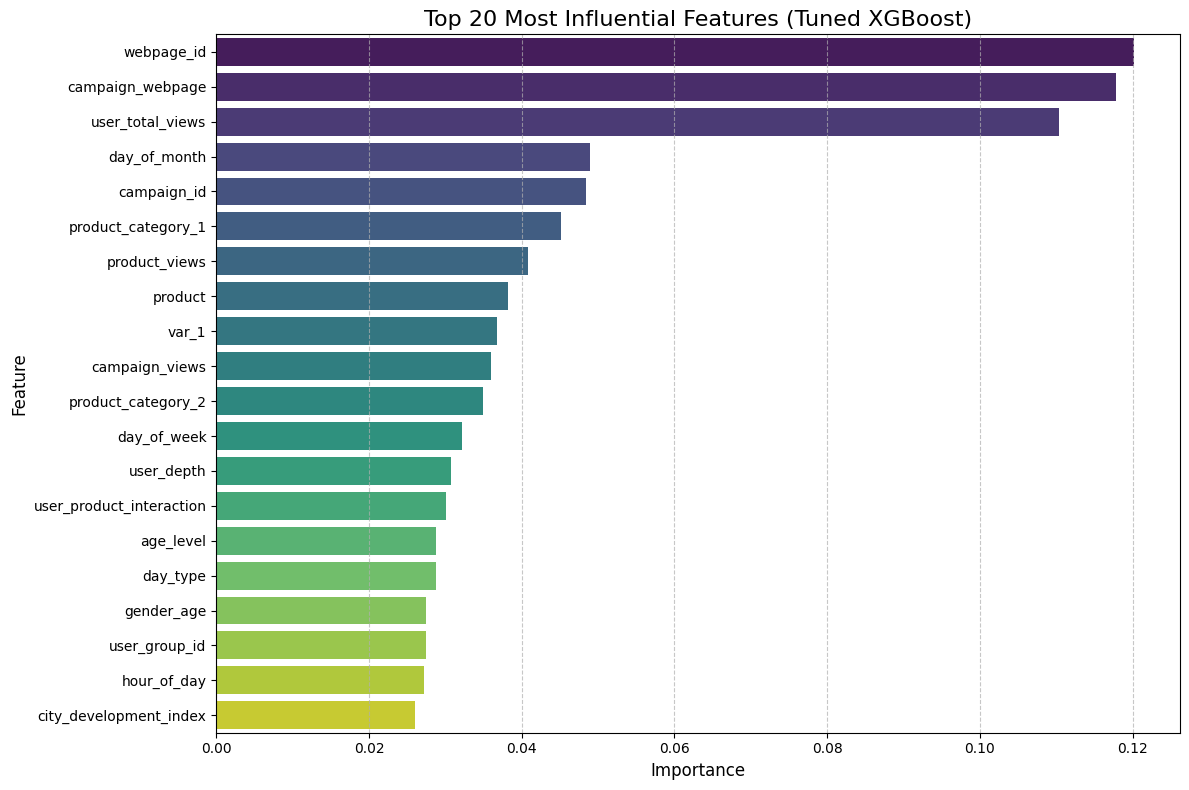

In [205]:
# Get feature importances from the best Tuned XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Get feature names from X_train (or X_test, they have the same columns)
feature_names = X_train.columns

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = features_df.head(20)

# Create a horizontal bar chart for the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Most Influential Features (Tuned XGBoost)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Insights:**

* **Context is King**: The high importance of webpage_id and campaign_webpage strongly suggests that the placement and contextual relevance of an ad are paramount. Optimizing ad placement on specific high-performing webpages and ensuring synergy between campaign creative and webpage content could significantly boost CTR.
* **User Engagement History**: user_total_views being a top feature indicates that a user's past interaction levels with ads are predictive of future clicks. This can be leveraged for more intelligent ad targeting, perhaps by focusing on users with higher historical engagement or by tailoring re-engagement strategies for less active users.
* **Strategic Campaign and Product Focus**: The influence of campaign_id and product_category_1 implies that certain campaigns and product types inherently attract more clicks. Analyzing the characteristics of these successful campaigns and products can inform future marketing strategies and product development.
* **Continuous Optimization**: By focusing on these most influential features, marketing teams can prioritize their efforts in ad creative, placement, and targeting to maximize ad click-through rates more effectively.

---
---

#### 5. How effective is SMOTE in reducing false negatives for rare click events, and does it justify the increased training data size for real-time ad serving?

I had used SMOTE earlier in this case study but it did not help much in improving ad click predictions. I had tried various sampling strategies with it including using it's default 'auto' mode which increases the minority class records to match it with that of the majority class. But keeping the clicks and no clicks records of the same count is not the best way to train models for ad clicks because it is far from the real life scenario of typical CTR trends. Hence, all the different models I was using were performing poorly on almost all metrics. Then I tried to reduce the sampling size to various amounts between 0.1 to 0.5, but none of them were good enough in improving the model performance.
I finally realised that SMOTE is not the best technique to use for ad click predictions. Also, the model training time significantly inreased due to a huge increase in the overall dataset. But this high training time should not affect the real time performance on testing data.
Then I tried using negative downsampling, which would remove some easy 'no-clicks' records which will reduce the majority class entries. This, along with other techniques already used for hyperparameter tuning of some models resulted in a significant improvement of model performance.

---
---

#### 6. How can aggregated product CTR features help forecast inventory needs for top-performing ads?

*   The `product_ctr` feature, calculated as `product_total_clicks / product_views`, directly reflects user engagement and interest, serving as a robust early indicator of potential product demand.
*   A consistently high `product_ctr` signals strong user interest, acting as a precursor to anticipated sales and enabling proactive inventory management, unlike lagging sales data.
*   The demand signal from `product_ctr` is amplified when products are featured in top-performing ad campaigns (indicated by high `campaign_ctr`) or on high-performing webpages (indicated by high `webpage_ctr`), strengthening the forecast for increased demand.
*   Practical applications include identifying products with high potential demand for proactive stocking and optimizing stock levels by reducing stockouts for high-CTR items and minimizing overstock for low-CTR items.
*   CTR data can inform marketing strategies, allowing for targeted promotions for high-CTR products and re-evaluation or optimization of ad creatives for low-CTR products.

### Insights or Next Steps

*   **Integrate and Automate:** Businesses should integrate `product_ctr` and `campaign_ctr` data directly into their inventory management systems and set up automated alerts and dashboards to monitor significant changes, facilitating real-time, data-driven inventory adjustments.
*   **Refine Forecasting with Conversion Data:** It is crucial to correlate `product_ctr` with actual sales conversion rates to establish a more accurate predictive model for demand, moving beyond clicks to actual purchases. This also involves implementing dynamic inventory adjustment rules based on combined CTR and conversion thresholds.


---
---

#### 7. What user profiles (e.g., by age, gender, or city) show the highest click propensity, and how should we adjust bidding strategies?

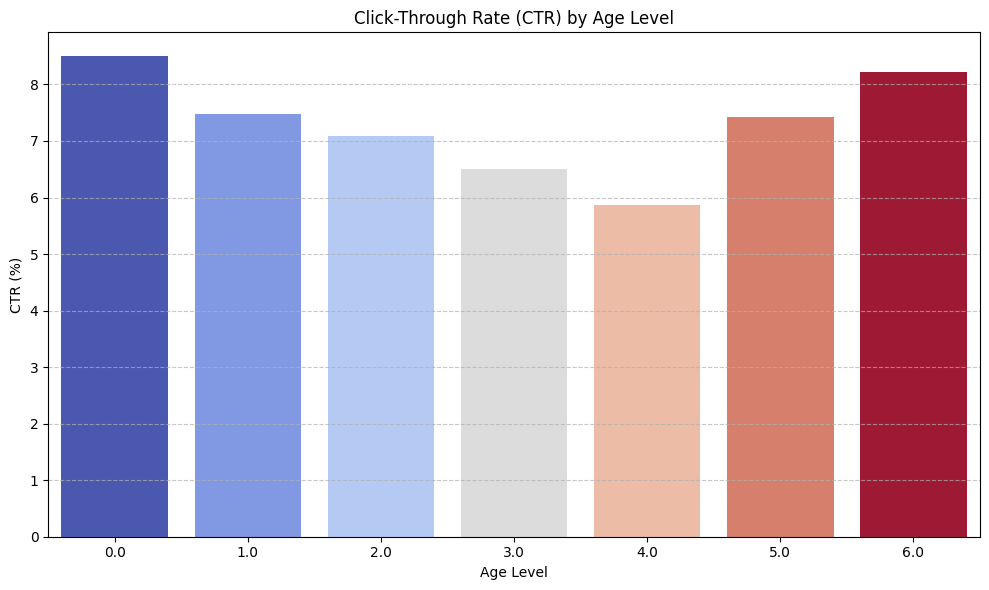

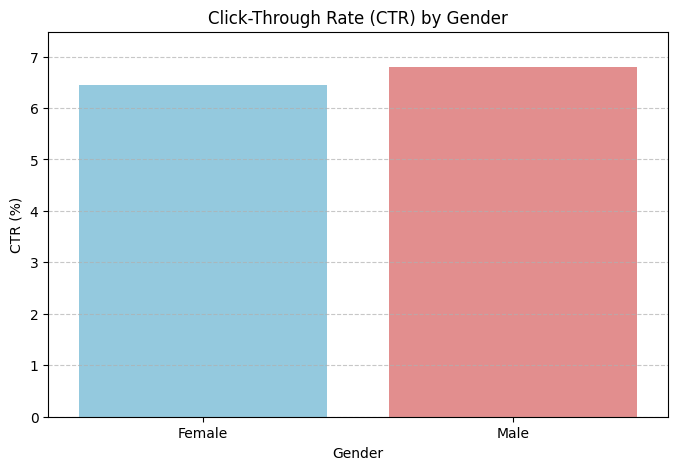

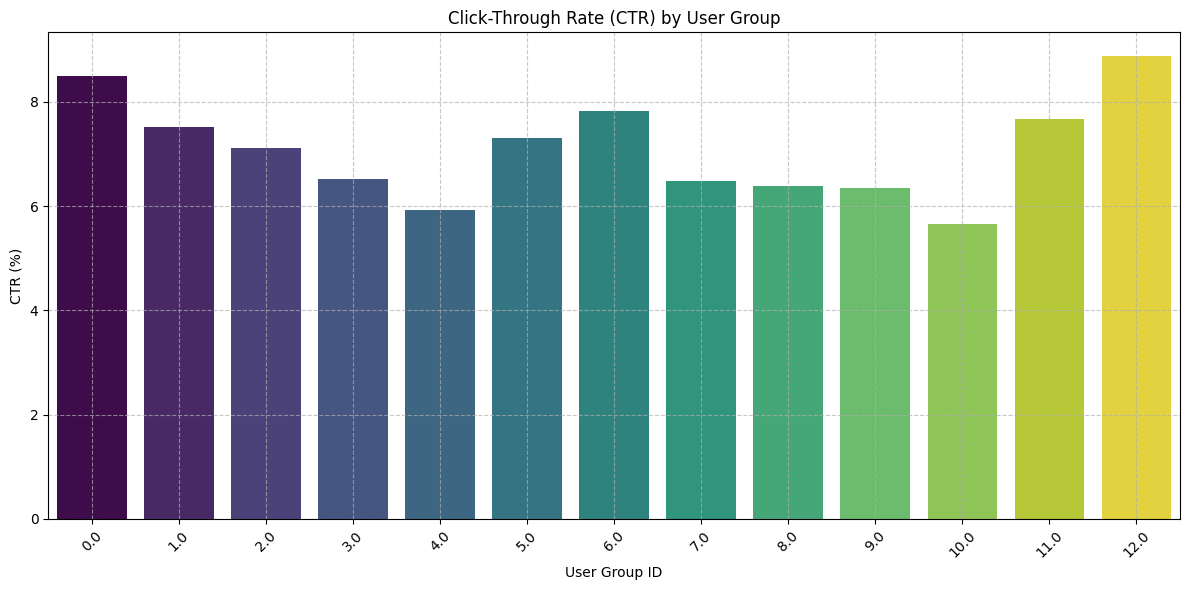

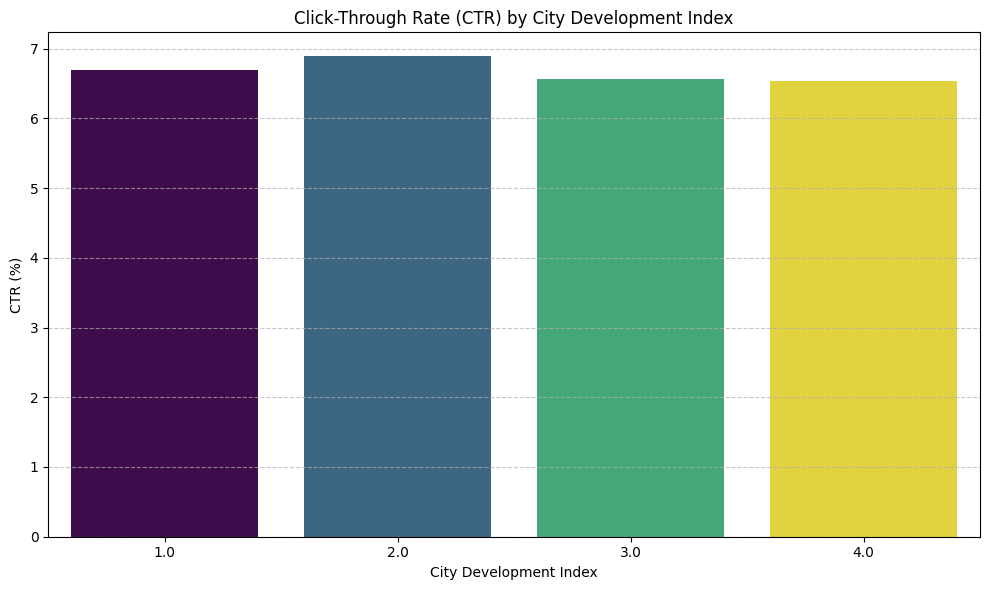

## Summary:

*   **What user profiles (e.g., by age, gender, or city development index) show the highest click propensity?**
    *   **Age Level**: Age level **0.0** (8.50% CTR) and **6.0** (8.23% CTR) show the highest click propensity.
    *   **Gender**: **Male** users exhibit a slightly higher CTR (6.80%) compared to Female users (6.44%).
    *   **User Group**: User group **12.0** (8.89% CTR) and **0.0** (8.50% CTR) show the highest click propensity.
    *   **City Development Index**: City development index **2.0** (6.89% CTR) and **1.0** (6.70% CTR) show the highest click propensity.

### Data Analysis Key Findings
*   **Age Level**: The youngest (0.0) and oldest (6.0) age groups show the highest engagement, with CTRs of 8.50% and 8.23% respectively, while age level 4.0 has the lowest CTR at 5.87%.
*   **Gender**: Male users demonstrate a slightly higher Click-Through Rate (CTR) of 6.80% compared to female users at 6.44%.
*   **User Group**: User groups 12.0 and 0.0 are highly responsive, showing the highest CTRs at 8.89% and 8.50%, respectively. In contrast, user group 10.0 has the lowest CTR at 5.65%.
*   **City Development Index**: City development index 2.0 has the highest CTR at 6.89%, with index 1.0 close behind at 6.70%. The lowest CTR is observed in index 4.0 at 6.53%, indicating less variation across city development indices compared to other demographic factors.

### Insights or Next Steps
*   Implement a **dynamic bidding strategy** by increasing bids for high-propensity segments (e.g., Age Levels 0.0 & 6.0, Male users, User Groups 12.0 & 0.0, City Development Index 2.0 & 1.0) and decreasing or optimizing bids for low-propensity segments (e.g., Age Level 4.0, User Group 10.0, City Development Index 4.0).
*   Prioritize **continuous monitoring and A/B testing** of these bid adjustments to validate their effectiveness and adapt strategies as user preferences and market conditions evolve, leveraging combined demographic factors for highly optimized targeting.


---
---

## Predict Probabilities on Test Data

Use the `best_xgb_model` to predict click probabilities on the prepared `ad_click_test_data`.


In [206]:
final_predictions_proba = best_xgb_model.predict_proba(ad_click_test_data)[:, 1]
print("Predicted click probabilities on ad_click_test_data successfully.")

Predicted click probabilities on ad_click_test_data successfully.


In [207]:
optimal_threshold = 0.34  # As identified from sensitivity analysis
final_predictions = (final_predictions_proba >= optimal_threshold).astype(int)

print(f"Converted probabilities to binary predictions using optimal threshold: {optimal_threshold}")

Converted probabilities to binary predictions using optimal threshold: 0.34


In [208]:
original_ad_click_test_data = pd.read_csv('Ad_Click_prediciton_test.csv')

submission_df = pd.DataFrame({
    'session_id': original_ad_click_test_data['session_id'],
    'is_click': final_predictions
})

submission_df.to_csv('ad_click_predictions.csv', index=False)

print("Submission file 'ad_click_predictions.csv' created successfully.")
print(submission_df.head(20))

Submission file 'ad_click_predictions.csv' created successfully.
    session_id  is_click
0       411705         1
1       208263         1
2       239450         1
3       547761         1
4       574275         1
5       394913         1
6       562747         1
7       224359         1
8       395004         1
9       572855         1
10      595386         1
11      395293         1
12      232085         1
13      222325         1
14      395297         1
15      546723         1
16       28142         1
17      595767         1
18      547614         1
19      577690         1


In [209]:
submission_df['is_click'].value_counts()

,count
is_click,
1,127302
0,1556


### I have uploaded the predictions for the test data on my drive. Please click [here](https://drive.google.com/file/d/1b5A1sGwfFeWj4p6c88We_N5I4dF7MHPh/view?usp=sharing) to access it.